# Introduction to Machine Learning

## Final Project - Spring 2022

## Classification of Art Work Dataset

### Aakarsha V. Rao

### April 18th, 2022

# Problem Statement

* To classify pieces of artwork into 1 of 9 categories: `0:'Pierre-Auguste_Renoir'`, `1:'Raphael'`, `2:'Leonardo_da_Vinci'`, `3:'Sandro_Botticelli'`, `4:'Francisco_Goya'`, `5:'Vincent_van_Gogh'`, `6:'Pablo_Picasso'`, `7:'Albrecht_Durer'`, `8:'Others'`

# `Minimum` Requirements

* 2 options for data normalization
* PCA with 2 options for number of components (dimensions)
* Data mapping using clustering (2 options) - cluster data based on provided features. In the clustered data, calculate the distance of each sample to each cluster - this will form your new set of features. Train and test the classifier on this new set of features. 
* `Four different types` of classifiers
* Ensemble methods: `Bagging` and `Adaboost`
* Use k-fold cross-validation with `k=4` for all validations (nested 4-fold if needed)
* Use `Pipelines` and `GridSearch`
* Base your algorithm or parameter selection on `accuracy`, `AUC of ROC`, and `F1-measure`

# Do NOT

* Combine all options and parameters in one giant GridSearch
* Use any algorithm/technique that has not been covered in this class

# Do

* Consider few options at a time
* Analyze the results
* Justify your next set of options

## Potential choice of Classifiers for this Project:

* Logistic Regression
* Random Forest (Decision Tree)
* Linear SVM
* Multilayer Perceptron (Neural Networks)

Options for different steps:
* cross-validation - stratified, shuffled, etc. 
* data normalization/preprocessing - standard, robust and minMax

# Table Of Contents <a class="anchor" id="zeroth-bullet"></a>
* [Import Modules](#first-bullet)
* [Read Input Files](#second-bullet)
* [Train-Test Split](#third-bullet)
* [Data Normalization](#fourth-bullet)
    * [Standard Scaler](#fourth1-bullet)
    * [Robust Scaler](#fourth2-bullet)
    * [MinMax Scaler](#fourth3-bullet)
    * [Comparison of Data Normalization results](#fourth4-bullet)
* [Data Mapping Using K-Means Clustering](#fifth-bullet)
    * [Data Mapping using Original Data](#fifth1-bullet)
        * [Data Mapping using 100 clusters](#fifth1.1-bullet)
        * [Data Mapping using 200 clusters](#fifth1.2-bullet)
    * [Data Mapping using Standard Scaled Data](#fifth2-bullet)
        * [Data Mapping using 100 clusters](#fifth2.1-bullet)
        * [Data Mapping using 200 clusters](#fifth2.2-bullet)
    * [Data Mapping using MinMax Scaled Data](#fifth3-bullet)
        * [Data Mapping using 100 clusters](#fifth3.1-bullet)
        * [Data Mapping using 200 clusters](#fifth3.2-bullet)
* [Kernel Support Vector Machine (K-SVM)](#sixth-bullet)
    * [Original Data](#sixth1-bullet)
        * [Principal Component Analysis](#sixth1.1-bullet)
        * [Classifier on Mapped Data by Clustering](#sixth1.2-bullet)
    * [Standard Scaler Data](#sixth2-bullet)
        * [Principal Component Analysis](#sixth2.1-bullet)
        * [Classifier on Mapped Data by Clustering](#sixth2.2-bullet)
    * [MinMax Scaler Data](#sixth3-bullet)
        * [Principal Component Analysis](#sixth3.1-bullet)
        * [Classifier on Mapped Data by Clustering](#sixth3.2-bullet)
* [Logistic Regression Classifier](#seventh-bullet)
    * [Original Data](#seventh1-bullet)
        * [Principal Component Analysis](#seventh1.1-bullet)
        * [Classifier on Mapped Data by Clustering](#seventh1.2-bullet)
    * [Standard Scaler Data](#seventh2-bullet)
        * [Principal Component Analysis](#seventh2.1-bullet)
        * [Classifier on Mapped Data by Clustering](#seventh2.2-bullet)
    * [MinMax Scaler Data](#seventh3-bullet)
        * [Principal Component Analysis](#seventh3.1-bullet)
        * [Classifier on Mapped Data by Clustering](#seventh3.2-bullet)
* [Random Forest Classifier](#eighth-bullet)
    * [Original Data](#eighth1-bullet)
    * [Pipeline and GridSearch with Original Data](#eighth2-bullet)
        * [Principal Component Analysis](#eighth2.1-bullet)
        * [Classifier on Mapped Data by Clustering](#eighth2.2-bullet)
* [Multi-layered Perceptron (Neural Network) classifier](#ninth-bullet)
    * [Original Data](#ninth1-bullet)
        * [Principal Component Analysis](#ninth1.1-bullet)
        * [Classifier on Mapped Data by Clustering](#ninth1.2-bullet)
    * [Standard Scaler Data](#ninth2-bullet)
        * [Principal Component Analysis](#ninth2.1-bullet)
        * [Classifier on Mapped Data by Clustering](#ninth2.2-bullet)
    * [MinMax Scaler Data](#ninth3-bullet)
        * [Principal Component Analysis](#ninth3.1-bullet)
        * [Classifier on Mapped Data by Clustering](#ninth3.2-bullet)
* [Correlations between classifiers](#tenth-bullet)
* [Ensemble Classifiers](#eleventh-bullet)
    * [Majority Voting Classifier](#eleventh1-bullet)
    * [Bagging Classifier](#eleventh2-bullet)
    * [Adaboost Classifier](#eleventh3-bullet)

## [Import Modules](#zeroth-bullet) <a class="anchor" id="first-bullet"></a>

In [21]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import seaborn as sns; sns.set_theme()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

## [Read Input Files](#zeroth-bullet) <a class="anchor" id="second-bullet"></a>

In [2]:
X_train = np.array(pd.read_csv("./extracted_features.csv", header=None))
y_train = np.array(pd.read_csv("./labels.csv", header=None).iloc[:,-1])
#y_train = label_binarize(y_train, classes=[0,1,2,3,4,5,6,7,8])
#n_classes = y_train.shape[1]
#raw_images = np.array(pd.read_csv("./raw_images.csv"))

X-test was not given for this project until the last day before submission, to perform the blind fold test

## [Train-Test Split](#zeroth-bullet) <a class="anchor" id="third-bullet"></a>

In [3]:
X_tr, X_test, y_tr, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=61)

The `random_state` number for the train-test split was changed to `61` in this rev2 of the code to see if that changes the performance measures of the models evaluated for this project

## [Data Normalization](#zeroth-bullet)  <a class="anchor" id="fourth-bullet"></a>
* To figure out the Optimal normalization method
* Using default parameters for classifier

### [Standard Scaler](#zeroth-bullet) <a class="anchor" id="fourth1-bullet"></a>
Preprocessing the training data using Standard Scaler

Firstly, evaluation of the different normalization methods/preprocessing methods were considered for this dataset. Each scaler was applied to X_train, while keeping parameters of the model in their default values. A 4-fold cross-validation was performed on each of the scaled datasets to examine the optimal validation score. The validation scores for each fold were also printed in a Pandas DataFrame to assess any overfitting/underfitting occurrences

Default parameters were used for optimizing the normalizing method - since including another set of variables would affect the cross-validation results on normalized data

In [70]:
start = time.time()
std_scaler = StandardScaler()
std_scaler.fit(X_tr) # Fit training data
X_tr_scaled = std_scaler.transform(X_tr)  # Transform training data
std_scaler.fit(X_train) # Fit entire data
X_train_scaled = std_scaler.transform(X_train)   # Transform entire data
end = time.time()
time_elapsed = end - start
print("Time elapsed = ", time_elapsed, "seconds")
print()

Time elapsed =  0.004606962203979492 seconds



### Cross-validation 
* Using default parameters
* Data preprocessed with Standard Scaler method

In [71]:
start = time.time()
k_svm = SVC()
parameters = {"C": [1.0], "kernel":['rbf'], "gamma":['scale']}    
clf_ksvm = GridSearchCV(k_svm, parameters, cv=4, return_train_score=True, verbose=4)
clf_ksvm.fit(X_tr_scaled, y_tr)
print("Optimal parameter values: {}".format(clf_ksvm.best_params_))
print("Optimal validation score: {:.4f}%".format(100*clf_ksvm.best_score_))
end = time.time()
time_elapsed = end - start
print()
print("Time elapsed for cross-validation using Standard scaler preprocessed data = ", time_elapsed, "s")

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.968, test=0.902) total time=   0.2s
[CV 2/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.971, test=0.885) total time=   0.2s
[CV 3/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.974, test=0.899) total time=   0.2s
[CV 4/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.970, test=0.899) total time=   0.2s
Optimal parameter values: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
Optimal validation score: 89.6093%

Time elapsed for cross-validation using Standard scaler preprocessed data =  1.8721959590911865 s


### Preprocessing the Test Dataset with Standard Scaler

In [72]:
start = time.time()
std_scaler = StandardScaler()
std_scaler.fit(X_test)  # Fit testing data
X_test_scaled = std_scaler.transform(X_test)   # Transform testing data
end = time.time()
time_elapsed = end - start
print("Time elapsed = ", time_elapsed, "s")

Time elapsed =  0.002429962158203125 s


### [Robust Scaler](#zeroth-bullet) <a class="anchor" id="fourth2-bullet"></a>
Preprocessing the training data using Robust Scaler

In [7]:
start = time.time()
rob_scaler = RobustScaler()
rob_scaler.fit(X_tr)  # Fit training data
X_tr_robscaled = rob_scaler.transform(X_tr)  # Transform training data
end = time.time()
time_elapsed = end - start
print("Time elapsed to normalize data using robust scaler = ", time_elapsed, "s")
print()

Time elapsed to normalize data using robust scaler =  0.023435115814208984 s



### Cross-validation 
* Using default parameters
* Data preprocessed with Robust Scaler method

In [8]:
start = time.time()
k_svm = SVC()
parameters = {"C": [1.0], "kernel":['rbf'], "gamma":['scale']}    
clf_ksvm = GridSearchCV(k_svm, parameters, cv=4, return_train_score=True, verbose=4)
clf_ksvm.fit(X_tr_robscaled, y_tr)
print("Optimal parameter values: {}".format(clf_ksvm.best_params_))
print("Optimal validation score: {:.4f}%".format(100*clf_ksvm.best_score_))
end = time.time()
time_elapsed = end - start
print()
print("Time elapsed for cross-validation using Robust scaler preprocessed data = ", time_elapsed, "s")

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.756, test=0.650) total time=   0.2s
[CV 2/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.742, test=0.678) total time=   0.2s
[CV 3/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.765, test=0.685) total time=   0.2s
[CV 4/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.740, test=0.644) total time=   0.2s
Optimal parameter values: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
Optimal validation score: 66.4273%

Time elapsed for cross-validation using Robust scaler preprocessed data =  2.0096521377563477 s


Since the Robust Scaler produced poor validation scores on the train dataset, this will not be considered for model comparison henceforth throught the course of this project. Therefore, the test dataset was NOT scaled using the Robust scaler

### [MinMax Scaler](#zeroth-bullet) <a class="anchor" id="fourth3-bullet"></a>
Preprocessing the training data using MinMax Scaler

In [73]:
start = time.time()
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_tr)   # Fit training data
X_tr_mmscaled = mm_scaler.transform(X_tr)  # Transform training data
mm_scaler.fit(X_train) # Fit entire data
X_train_mmscaled = mm_scaler.transform(X_train)   # Transform entire data
end = time.time()
time_elapsed = end - start
print("Time elapsed = ", time_elapsed, "s")
print()

Time elapsed =  0.006012916564941406 s



### Cross-validation 
* Using default parameters
* Data preprocessed with MinMax Scaler method

In [74]:
start = time.time()
k_svm = SVC()
parameters = {"C": [1.0], "kernel":['rbf'], "gamma":['scale']}    
clf_ksvm = GridSearchCV(k_svm, parameters, cv=4, return_train_score=True, verbose=4)
clf_ksvm.fit(X_tr_mmscaled, y_tr)
print("Optimal parameter values: {}".format(clf_ksvm.best_params_))
print("Optimal validation score: {:.4f}%".format(100*clf_ksvm.best_score_))
end = time.time()
time_elapsed = end - start
print()
print("Time elapsed for cross-validation using minMax scaler preprocessed data = ", time_elapsed, "s")

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.970, test=0.918) total time=   0.2s
[CV 2/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.972, test=0.899) total time=   0.1s
[CV 3/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.971, test=0.901) total time=   0.1s
[CV 4/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.974, test=0.925) total time=   0.2s
Optimal parameter values: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
Optimal validation score: 91.1107%

Time elapsed for cross-validation using minMax scaler preprocessed data =  1.802917242050171 s


### Preprocessing the Test Dataset with MinMax Scaler

In [75]:
start = time.time()
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_test)  # Fit testing data
X_test_mmscaled = mm_scaler.transform(X_test)   # Transform testing data
end = time.time()
time_elapsed = end - start
print("Time elapsed = ", time_elapsed, "s")

Time elapsed =  0.001348257064819336 s


### [Comparison of Normalization methods (cross-validation results)](#zeroth-bullet) <a class="anchor" id="fourth4-bullet"></a>

In [12]:
data = {'Normalizer':['Standard Scaler', 'Robust Scaler', 'MinMax Scaler'],
        'Fold 1 validation score (%)':[90.2, 65.0, 91.8],
        'Fold 2 validation score (%)':[88.5, 67.8, 89.9],
        'Fold 3 validation score (%)':[89.9, 68.5, 90.1],
        'Fold 4 validation score (%)':[89.9, 64.4, 92.5],
        'Average/Optimal Validation Score (%)': [89.61, 66.43, 91.11]}
df = pd.DataFrame(data)
df

,Normalizer,Fold 1 validation score (%),Fold 2 validation score (%),Fold 3 validation score (%),Fold 4 validation score (%),Average/Optimal Validation Score (%)
0,Standard Scaler,90.2,88.5,89.9,89.9,89.61
1,Robust Scaler,65.0,67.8,68.5,64.4,66.43
2,MinMax Scaler,91.8,89.9,90.1,92.5,91.11


From the above tabulated results, it can be inferred that the MinMax Scaler is the most optimal normalizer or preprocessing method, since it produced optimal validation score of 91.11%. Additionally, the individual fold validation scores also demonstrate high performance consistently across all 4 folds. This is indicative of NO over/underfitting

## [Data Mapping using K-Means Clustering](#zeroth-bullet) <a class="anchor" id="fifth-bullet"></a>

## [Data Mapping using Original Data](#zeroth-bullet) <a class="anchor" id="fifth1-bullet"></a>

### [Data Mapping using 100 clusters](#zeroth-bullet) <a class="anchor" id="fifth1.1-bullet">

In [65]:
# Cluster and map the data
# First trial with n_clusters = 100

kmeans100 = KMeans(n_clusters=100, random_state=0)
kmeans100.fit(X_train)
y_pred = kmeans100.predict(X_train)
print("Cluster memberships:\n{}".format(y_pred))
distance_features100 = kmeans100.transform(X_train)
print("Distance feature shape: {}".format(distance_features100.shape)) 
print("Distance features:\n{}".format(distance_features100))

Cluster memberships:
[53 21 43 ... 80 23 80]
Distance feature shape: (2220, 100)
Distance features:
[[ 50.7563062   49.59782167  48.60386108 ...  48.20015612  47.82768143
   77.48556551]
 [ 33.47627977  51.09427842  51.3949234  ...  45.74297644  46.74801182
   62.61900254]
 [ 43.45452207  98.85696589  90.59723702 ...  76.72592872  91.33175861
   73.00736067]
 ...
 [ 80.54454131  43.69294596  48.08864866 ...  47.06315044  43.81052161
   80.2929261 ]
 [102.32223211  75.95254766  76.03193131 ...  76.08849965  75.88458675
   91.30409902]
 [ 80.56890968  41.05874076  46.66555572 ...  49.00099022  46.82418888
   79.88569396]]


In [66]:
# Creating new feature space into csv file
# Read new csv file and train-test split

# First write new distance feature space into a .csv file
a = distance_features100
np.savetxt("X_train_KM100clustSpace.csv", a, delimiter=",")

# Read new .csv file back into Python
X_train_clust100 = np.array(pd.read_csv("./X_train_KM100clustSpace.csv", header=None))

# Train-test split of the train data based on the new feature space
X_tr_clust100, X_test_clust100, y_tr_clust100, y_test_clust100 = train_test_split(X_train_clust100, y_train, test_size=0.25, random_state=61)

### [Data Mapping using 200 clusters](#zeroth-bullet) <a class="anchor" id="fifth1.2-bullet">

In [67]:
# Second trial with n_clusters = 200

kmeans200 = KMeans(n_clusters=200, random_state=0)
kmeans200.fit(X_train)
y_pred = kmeans200.predict(X_train)
print("Cluster memberships:\n{}".format(y_pred))
distance_features200 = kmeans200.transform(X_train)
print("Distance feature shape: {}".format(distance_features200.shape)) 
print("Distance features:\n{}".format(distance_features200))

Cluster memberships:
[166  37  99 ... 107 134  11]
Distance feature shape: (2220, 200)
Distance features:
[[ 51.51920551  45.26006501  69.50188498 ...  66.3124392   54.6232584
  107.76379235]
 [ 48.30710886  44.57470893  51.8275814  ...  67.94036241  47.34153042
  101.78007325]
 [ 76.08352437  98.50188437  75.07803    ... 105.95891493  73.8481047
  110.45039852]
 ...
 [ 50.64432242  41.64048545  79.90555819 ...  59.14551127  59.12604916
  112.94064403]
 [ 77.3698821   76.94719548  99.08587682 ...  78.01449833  85.29955616
  123.91674452]
 [ 52.98846559  43.96458969  69.52175167 ...  53.82053471  61.54946319
  108.0141801 ]]


In [68]:
# Creating new feature space into csv file
# Read new csv file and train-test split

# First write new distance feature space into a .csv file
a = distance_features200
np.savetxt("X_train_KM200clustSpace.csv", a, delimiter=",")

# Read new .csv file back into Python
X_train_clust200 = np.array(pd.read_csv("./X_train_KM200clustSpace.csv", header=None))

# Train-test split of the train data based on the new feature space
X_tr_clust200, X_test_clust200, y_tr_clust200, y_test_clust200 = train_test_split(X_train_clust200, y_train, test_size=0.25, random_state=61)

## [Data Mapping using Standard Scaled Data](#zeroth-bullet) <a class="anchor" id="fifth2-bullet"></a>

### [Data Mapping using 100 clusters](#zeroth-bullet) <a class="anchor" id="fifth2.1-bullet">

In [69]:
# Cluster and map the data
# First trial with n_clusters = 100

kmeans100_std = KMeans(n_clusters=100, random_state=0)
kmeans100_std.fit(X_train_scaled)
y_pred_std = kmeans100_std.predict(X_train_scaled)
print("Cluster memberships:\n{}".format(y_pred_std))
distance_features100_std = kmeans100_std.transform(X_train_scaled)
print("Distance feature shape: {}".format(distance_features100_std.shape)) 
print("Distance features:\n{}".format(distance_features100_std))

NameError: name 'X_train_scaled' is not defined

In [18]:
# Creating new feature space into csv file
# Read new csv file and train-test split

# First write new distance feature space into a .csv file
a = distance_features100_std
np.savetxt("X_train_KM100clustSpace_std.csv", a, delimiter=",")

# Read new .csv file back into Python
X_train_clust100_std = np.array(pd.read_csv("./X_train_KM100clustSpace_std.csv", header=None))

# Train-test split of the train data based on the new feature space
X_tr_clust100_std, X_test_clust100_std, y_tr_clust100_std, y_test_clust100_std = train_test_split(X_train_clust100_std, y_train, test_size=0.25, random_state=61)

### [Data Mapping using 200 clusters](#zeroth-bullet) <a class="anchor" id="fifth2.2-bullet">

In [19]:
# Second trial with n_clusters = 200

kmeans200_std = KMeans(n_clusters=200, random_state=0)
kmeans200_std.fit(X_train_scaled)
y_pred_std = kmeans200_std.predict(X_train_scaled)
print("Cluster memberships:\n{}".format(y_pred_std))
distance_features200_std = kmeans200_std.transform(X_train_scaled)
print("Distance feature shape: {}".format(distance_features200_std.shape)) 
print("Distance features:\n{}".format(distance_features200_std))

Cluster memberships:
[174  85  64 ...  18  72 129]
Distance feature shape: (2220, 200)
Distance features:
[[ 7.28673861  5.85029486  6.40627822 ...  8.56658024  6.1263116
   6.09623407]
 [ 6.8439013   5.24817103  5.17977527 ...  8.2525549   5.26350955
   5.34714271]
 [11.39924646 10.45031032 10.58214661 ... 12.90147216 10.1466775
  10.08370247]
 ...
 [ 6.05740655  5.07657868  6.6593877  ...  8.16721961  5.37452416
   7.38731362]
 [ 8.97599756  9.15897707 10.14448228 ... 11.46426328  8.86843399
   8.98755102]
 [ 6.55106548  5.24191492  6.6211118  ...  8.61218967  5.60415302
   7.32364085]]


In [20]:
# Creating new feature space into csv file
# Read new csv file and train-test split

# First write new distance feature space into a .csv file
a = distance_features200_std
np.savetxt("X_train_KM200clustSpace_std.csv", a, delimiter=",")

# Read new .csv file back into Python
X_train_clust200_std = np.array(pd.read_csv("./X_train_KM200clustSpace_std.csv", header=None))

# Train-test split of the train data based on the new feature space
X_tr_clust200_std, X_test_clust200_std, y_tr_clust200_std, y_test_clust200_std = train_test_split(X_train_clust200_std, y_train, test_size=0.25, random_state=61)

## [Data Mapping using MinMax Scaled Data](#zeroth-bullet) <a class="anchor" id="fifth3-bullet"></a>

### [Data Mapping using 100 clusters](#zeroth-bullet) <a class="anchor" id="fifth3.1-bullet">

In [29]:
# Cluster and map the data
# First trial with n_clusters = 100

kmeans100_mm = KMeans(n_clusters=100, random_state=0)
kmeans100_mm.fit(X_train_mmscaled)
y_pred_mm = kmeans100_mm.predict(X_train_mmscaled)
print("Cluster memberships:\n{}".format(y_pred_mm))
distance_features100_mm = kmeans100_mm.transform(X_train_mmscaled)
print("Distance feature shape: {}".format(distance_features100_mm.shape)) 
print("Distance features:\n{}".format(distance_features100_mm))

Cluster memberships:
[26 81 58 ... 23 57 49]
Distance feature shape: (2220, 100)
Distance features:
[[1.22266007 0.91029316 0.6813763  ... 0.89210605 0.56433954 0.70541861]
 [1.16223609 0.84901932 0.54640659 ... 0.8518289  0.46877382 0.71019879]
 [1.46840214 0.95279821 0.8359878  ... 1.26859949 0.96802372 1.10761743]
 ...
 [1.23757474 0.86750882 0.85891616 ... 0.96741395 0.60590592 0.75173729]
 [1.61321168 1.29681779 1.12896077 ... 1.37477245 1.13197132 1.2218318 ]
 [1.29153983 0.903241   0.86282377 ... 1.01262169 0.65245264 0.82242549]]


In [30]:
# Creating new feature space into csv file
# Read new csv file and train-test split

# First write new distance feature space into a .csv file
a = distance_features100_mm
np.savetxt("X_train_KM100clustSpace_mm.csv", a, delimiter=",")

# Read new .csv file back into Python
X_train_clust100_mm = np.array(pd.read_csv("./X_train_KM100clustSpace_mm.csv", header=None))

# Train-test split of the train data based on the new feature space
X_tr_clust100_mm, X_test_clust100_mm, y_tr_clust100_mm, y_test_clust100_mm = train_test_split(X_train_clust100_mm, y_train, test_size=0.25, random_state=61)

### [Data Mapping using 200 clusters](#zeroth-bullet) <a class="anchor" id="fifth3.2-bullet">

In [23]:
# Second trial with n_clusters = 200

kmeans200_mm = KMeans(n_clusters=200, random_state=0)
kmeans200_mm.fit(X_train_mmscaled)
y_pred_mm = kmeans200_mm.predict(X_train_mmscaled)
print("Cluster memberships:\n{}".format(y_pred_mm))
distance_features200_mm = kmeans200_mm.transform(X_train_mmscaled)
print("Distance feature shape: {}".format(distance_features200_mm.shape)) 
print("Distance features:\n{}".format(distance_features200_mm))

Cluster memberships:
[183   2  48 ...  28  70 180]
Distance feature shape: (2220, 200)
Distance features:
[[0.79386665 0.88452343 0.50181174 ... 1.65501656 1.0145241  1.34214662]
 [0.92157049 0.80918719 0.32631023 ... 1.6591854  1.01225716 1.16903538]
 [1.07098246 0.91793351 0.75824583 ... 1.7998339  1.28247173 1.35235639]
 ...
 [0.78684104 0.84417144 0.74796166 ... 1.66423251 0.99753686 1.28341037]
 [1.03471175 1.27791785 1.19049769 ... 1.89640221 1.38415696 1.57480556]
 [0.80700555 0.88845063 0.79575834 ... 1.71148488 1.07172373 1.3124359 ]]


In [24]:
# Creating new feature space into csv file
# Read new csv file and train-test split

# First write new distance feature space into a .csv file
a = distance_features200_mm
np.savetxt("X_train_KM200clustSpace_mm.csv", a, delimiter=",")

# Read new .csv file back into Python
X_train_clust200_mm = np.array(pd.read_csv("./X_train_KM200clustSpace_mm.csv", header=None))

# Train-test split of the train data based on the new feature space
X_tr_clust200_mm, X_test_clust200_mm, y_tr_clust200_mm, y_test_clust200_mm = train_test_split(X_train_clust200_mm, y_train, test_size=0.25, random_state=61)

# [Kernel Support Vector Machine](#zeroth-bullet) <a class="anchor" id="sixth-bullet"></a>

## [Evaluating the classifier on original data](#zeroth-bullet)  <a class="anchor" id="sixth1-bullet"></a>
1. without preprocessing
2. using default parameters for the classifier
3. no GridSearch and 4-fold cross-validation

In [25]:
start = time.time()
k_svm = SVC(probability=True, decision_function_shape='ovr')
k_svm.fit(X_tr, y_tr)
y_pred = k_svm.predict(X_test)
end = time.time()
print("Time taken to run Kernel SVM classifier on original data is ", end-start, "seconds")

Time taken to run Kernel SVM classifier on original data is  0.8879191875457764 seconds


### Accuracy

In [26]:
print("The average test accuracy is ", k_svm.score(X_test, y_test))

The average test accuracy is  0.9207207207207208


### F1-score and classification report

In [27]:
print("The F1-score is ", f1_score(y_test, y_pred, average='weighted'))
#print(classification_report(y_test, y_pred, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score is  0.921500585164765


### Plot ROC Curve

(555, 9)


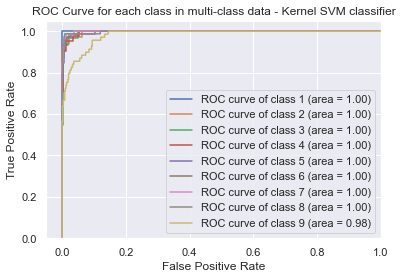

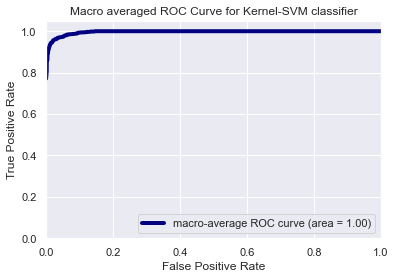

In [28]:
clf = SVC(probability=True, decision_function_shape='ovr')
clf.fit(X_tr, y_tr)
y_score = clf.predict_proba(X_test)

n_classes = y_score.shape[1]

print(y_score.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class in multi-class data - Kernel SVM classifier')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr1 = fpr["macro"]
tpr1 = tpr["macro"]
roc_auc1 = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro averaged ROC Curve for Kernel-SVM classifier")
plt.legend(loc="lower right")
plt.show()

### Area under ROC (AUROC)

In [29]:
# Area under ROC curve 
# for Kernel-SVM trained on
# Original data

k_svm_auc = roc_auc_score(y_test, k_svm.predict_proba(X_test), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_svm_auc))

AUC for Kernel SVM: 0.996


Next, application of PCA is explored on the above model - without preprocessing, using default parameters and no GridSearchCV

## [Principle Component Analysis (PCA) on Original Data](#zeroth-bullet) <a class="anchor" id="sixth1.1-bullet"></a>

PCA component shape: (64, 64)
Cumulative explained variance ratio  [0.16145397 0.30506004 0.38055826 0.44456773 0.49526939 0.54154848
 0.58483048 0.62313724 0.65749001 0.69071953 0.71592688 0.73955722
 0.76258984 0.78543201 0.8069315  0.82699799 0.84452346 0.86004871
 0.87309588 0.88549563 0.89700082 0.90703917 0.91651096 0.92509267
 0.93272162 0.93983388 0.94626972 0.9524665  0.95756323 0.96253662
 0.96675975 0.97056984 0.97422849 0.97761555 0.98076611 0.98381562
 0.98667961 0.98890457 0.99083324 0.99249571 0.99397774 0.99528858
 0.99655911 0.99771496 0.99850563 0.99902752 0.99932562 0.99956433
 0.99971467 0.9998426  0.99993505 0.99997251 0.99998454 0.99999297
 0.99999855 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


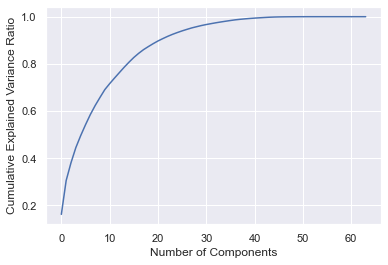

In [51]:
# Initializing the PCA transformer
pca_ksvm = PCA()

# Dimensionality Reduction
X_tr_pca_ksvm = pca_ksvm.fit_transform(X_tr)
X_test_pca_ksvm = pca_ksvm.transform(X_test)

# Assessing the Principal components
print("PCA component shape: {}".format(pca_ksvm.components_.shape))

# Plotting Explained Variance Ratio graph
print("Cumulative explained variance ratio ", np.cumsum(pca_ksvm.explained_variance_ratio_))
plt.plot(np.cumsum(pca_ksvm.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

From the `Cumulative Explained Variance Ratio graph`, we see that 80% of the variance is explained using 14 features. Therefore, we can try applying PCA to the dataset to reduce the dimensions to 14 features and then assessing the performance of the classifier

In [52]:
# Reducing the number of dimensions to 14 to correspond to 80% of variance explained
pca_ksvm_reduced1 = PCA(n_components = 14)

# Dimensionality Reduction
Xtr_pca_ksvm_reduced1 = pca_ksvm_reduced1.fit_transform(X_tr)
Xtest_pca_ksvm_reduced1 = pca_ksvm_reduced1.transform(X_test)

# Fitting the Kernel-SVM model to the reduced dataset
k_svm_reduced1 = k_svm.fit(Xtr_pca_ksvm_reduced1, y_tr)

# Predicting results on reduced test dataset
y_pred_ksvm_reduced1 = k_svm.predict(Xtest_pca_ksvm_reduced1)

In [53]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset is ", k_svm_reduced1.score(Xtest_pca_ksvm_reduced1, y_test))

The average test accuracy on reduced dataset is  0.8324324324324325


In [54]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_ksvm_reduced1, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced1, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8381194152320531


(555, 9)


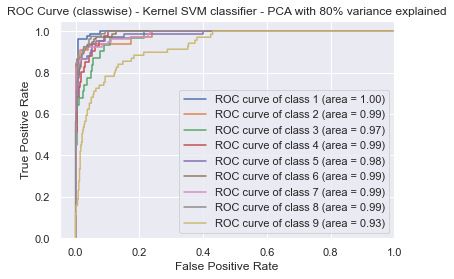

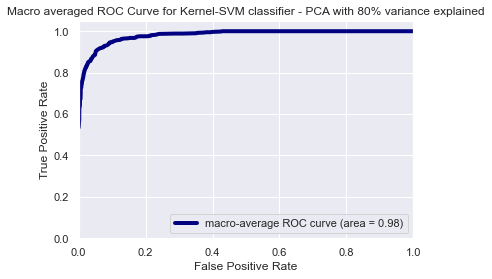

In [62]:
clf = SVC(probability=True, decision_function_shape='ovr')
clf.fit(Xtr_pca_ksvm_reduced1, y_tr)
y_score = clf.predict_proba(Xtest_pca_ksvm_reduced1)

n_classes = y_score.shape[1]

print(y_score.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (classwise) - Kernel SVM classifier - PCA with 80% variance explained')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr1_pca1 = fpr["macro"]
tpr1_pca1 = tpr["macro"]
roc_auc1_pca1 = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro averaged ROC Curve for Kernel-SVM classifier - PCA with 80% variance explained")
plt.legend(loc="lower right")
plt.show()

In [38]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 34 dimensions using PCA

k_svm_auc = roc_auc_score(y_test, k_svm.predict_proba(Xtest_pca_ksvm_reduced1), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_svm_auc))

AUC for Kernel SVM: 0.980


In [57]:
# Reducing the number of dimensions to 20 to correspond to 90% of variance explained
pca_ksvm_reduced2 = PCA(n_components = 20)

# Dimensionality Reduction
Xtr_pca_ksvm_reduced2 = pca_ksvm_reduced2.fit_transform(X_tr)
Xtest_pca_ksvm_reduced2 = pca_ksvm_reduced2.transform(X_test)

# Fitting the Kernel-SVM model to the reduced dataset
k_svm_reduced2 = k_svm.fit(Xtr_pca_ksvm_reduced2, y_tr)

# Predicting results on reduced test dataset
y_pred_ksvm_reduced2 = k_svm.predict(Xtest_pca_ksvm_reduced2)

In [59]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset 2 is ", k_svm_reduced2.score(Xtest_pca_ksvm_reduced2, y_test))

The average test accuracy on reduced dataset 2 is  0.8612612612612612


In [60]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_ksvm_reduced2, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced2, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.865998830775753


(555, 9)


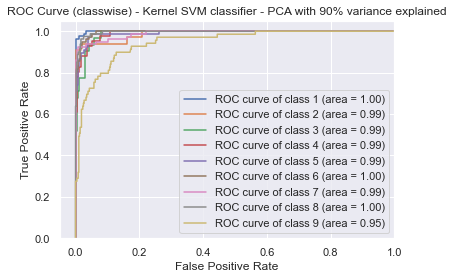

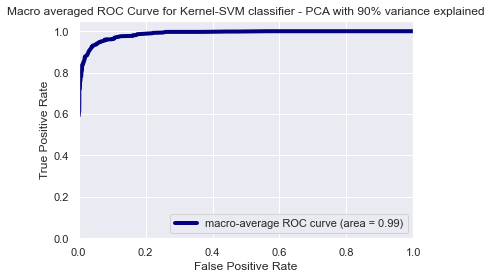

In [63]:
clf = SVC(probability=True, decision_function_shape='ovr')
clf.fit(Xtr_pca_ksvm_reduced2, y_tr)
y_score = clf.predict_proba(Xtest_pca_ksvm_reduced2)

n_classes = y_score.shape[1]

print(y_score.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (classwise) - Kernel SVM classifier - PCA with 90% variance explained')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr1_pca2 = fpr["macro"]
tpr1_pca2 = tpr["macro"]
roc_auc1_pca2 = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro averaged ROC Curve for Kernel-SVM classifier - PCA with 90% variance explained")
plt.legend(loc="lower right")
plt.show()

In [42]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 45 dimensions using PCA

k_svm_auc = roc_auc_score(y_test, k_svm.predict_proba(Xtest_pca_ksvm_reduced2), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_svm_auc))

AUC for Kernel SVM: 0.987


## [Kernel-SVM classifier on mapped Original Data using K-Means clustering](#zeroth-bullet) <a class="anchor" id="sixth1.2-bullet"></a>

In [43]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 100

k_svm.fit(X_tr_clust100, y_tr_clust100)
y_pred_clust100 = k_svm.predict(X_test_clust100)
print("The average test accuracy is ", k_svm.score(X_test_clust100, y_test_clust100))

The average test accuracy is  0.8018018018018018


In [44]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust100, average='weighted'))
#print(classification_report(y_test, y_pred_clust100, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8065077677059309


(555, 9)


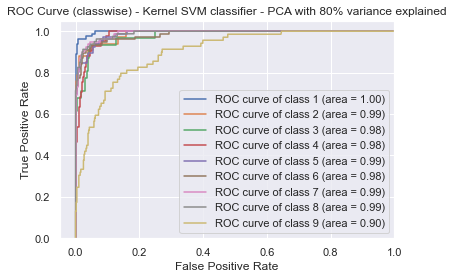

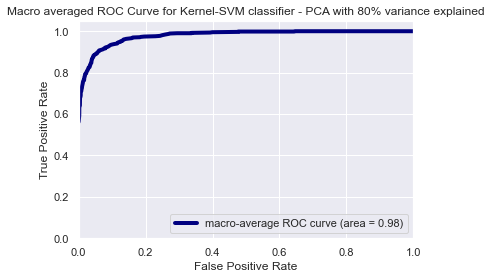

In [76]:
clf = SVC(probability=True, decision_function_shape='ovr')
clf.fit(X_tr_clust100, y_tr)
y_score = clf.predict_proba(X_test_clust100)

n_classes = y_score.shape[1]

print(y_score.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (classwise) - Kernel SVM classifier - PCA with 80% variance explained')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr1_clust100 = fpr["macro"]
tpr1_clust100 = tpr["macro"]
roc_auc1_clust100 = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro averaged ROC Curve for Kernel-SVM classifier - PCA with 80% variance explained")
plt.legend(loc="lower right")
plt.show()

In [45]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 100 cluster distance dimension space

k_svm_auc = roc_auc_score(y_test, k_svm.predict_proba(X_test_clust100), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_svm_auc))

AUC for Kernel SVM: 0.977


In [46]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 200

k_svm.fit(X_tr_clust200, y_tr_clust200)
y_pred_clust200 = k_svm.predict(X_test_clust200)
print("The average test accuracy is ", k_svm.score(X_test_clust200, y_test_clust200))

The average test accuracy is  0.7963963963963964


In [47]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust200, average='weighted'))
#print(classification_report(y_test, y_pred_clust200, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8016787628798998


(555, 9)


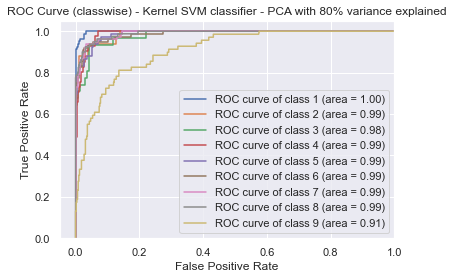

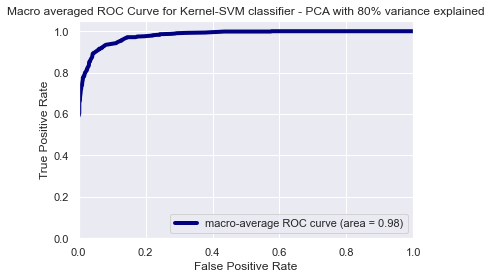

In [77]:
clf = SVC(probability=True, decision_function_shape='ovr')
clf.fit(X_tr_clust200, y_tr)
y_score = clf.predict_proba(X_test_clust200)

n_classes = y_score.shape[1]

print(y_score.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (classwise) - Kernel SVM classifier - PCA with 80% variance explained')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr1_clust200 = fpr["macro"]
tpr1_clust200 = tpr["macro"]
roc_auc1_clust200 = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro averaged ROC Curve for Kernel-SVM classifier - PCA with 80% variance explained")
plt.legend(loc="lower right")
plt.show()

In [48]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 200 cluster distance dimension space

k_svm_auc = roc_auc_score(y_test, k_svm.predict_proba(X_test_clust200), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_svm_auc))

AUC for Kernel SVM: 0.980


Data mapping using K-Means clustering exacerbated the performance accuracy of Kernel-SVM classifier by reducing the accuracy by to 80.18% with 100 clusters and 79.63% with 200 clusters. 

## [Pipelines and GridSearch - Kernel SVM with Standard Scaled data](#zeroth-bullet) <a class="anchor" id="sixth2-bullet"></a>

In [49]:
svc_fitter = SVC(random_state=1, probability=True, decision_function_shape='ovr')
pipe_svc = make_pipeline(StandardScaler(), svc_fitter) 
param_range = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0] 
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]
gs_std = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=4, refit=True, verbose=4)
gs = gs_std.fit(X_tr, y_tr)  # Fit the entire train dataset after cross-validation
print()
print("Best cross-validation accuracy: ", gs_std.best_score_)
print("Best estimator is: ", gs_std.best_estimator_)
print("Best parameters: ", gs_std.best_params_)
print(classification_report(y_test, y_pred, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

Fitting 4 folds for each of 156 candidates, totalling 624 fits
[CV 1/4] END ..svc__C=1e-06, svc__kernel=linear;, score=0.149 total time=   0.5s
[CV 2/4] END ..svc__C=1e-06, svc__kernel=linear;, score=0.149 total time=   0.4s
[CV 3/4] END ..svc__C=1e-06, svc__kernel=linear;, score=0.147 total time=   0.4s
[CV 4/4] END ..svc__C=1e-06, svc__kernel=linear;, score=0.149 total time=   0.6s
[CV 1/4] END ..svc__C=1e-05, svc__kernel=linear;, score=0.149 total time=   0.5s
[CV 2/4] END ..svc__C=1e-05, svc__kernel=linear;, score=0.149 total time=   0.4s
[CV 3/4] END ..svc__C=1e-05, svc__kernel=linear;, score=0.147 total time=   0.5s
[CV 4/4] END ..svc__C=1e-05, svc__kernel=linear;, score=0.149 total time=   0.5s
[CV 1/4] END .svc__C=0.0001, svc__kernel=linear;, score=0.149 total time=   0.4s
[CV 2/4] END .svc__C=0.0001, svc__kernel=linear;, score=0.149 total time=   0.5s
[CV 3/4] END .svc__C=0.0001, svc__kernel=linear;, score=0.147 total time=   0.7s
[CV 4/4] END .svc__C=0.0001, svc__kernel=linea

[CV 3/4] END svc__C=1e-06, svc__gamma=100000.0, svc__kernel=rbf;, score=0.147 total time=   0.8s
[CV 4/4] END svc__C=1e-06, svc__gamma=100000.0, svc__kernel=rbf;, score=0.149 total time=   0.8s
[CV 1/4] END svc__C=1e-05, svc__gamma=1e-06, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 2/4] END svc__C=1e-05, svc__gamma=1e-06, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 3/4] END svc__C=1e-05, svc__gamma=1e-06, svc__kernel=rbf;, score=0.147 total time=   1.0s
[CV 4/4] END svc__C=1e-05, svc__gamma=1e-06, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 1/4] END svc__C=1e-05, svc__gamma=1e-05, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 2/4] END svc__C=1e-05, svc__gamma=1e-05, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 3/4] END svc__C=1e-05, svc__gamma=1e-05, svc__kernel=rbf;, score=0.147 total time=   1.0s
[CV 4/4] END svc__C=1e-05, svc__gamma=1e-05, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 1/4] END svc__C=1e-05, svc__gamma=0.0001, svc__ker

[CV 2/4] END svc__C=0.0001, svc__gamma=1000.0, svc__kernel=rbf;, score=0.149 total time=   0.8s
[CV 3/4] END svc__C=0.0001, svc__gamma=1000.0, svc__kernel=rbf;, score=0.147 total time=   0.8s
[CV 4/4] END svc__C=0.0001, svc__gamma=1000.0, svc__kernel=rbf;, score=0.149 total time=   0.9s
[CV 1/4] END svc__C=0.0001, svc__gamma=10000.0, svc__kernel=rbf;, score=0.149 total time=   0.8s
[CV 2/4] END svc__C=0.0001, svc__gamma=10000.0, svc__kernel=rbf;, score=0.149 total time=   0.8s
[CV 3/4] END svc__C=0.0001, svc__gamma=10000.0, svc__kernel=rbf;, score=0.147 total time=   0.8s
[CV 4/4] END svc__C=0.0001, svc__gamma=10000.0, svc__kernel=rbf;, score=0.149 total time=   1.1s
[CV 1/4] END svc__C=0.0001, svc__gamma=100000.0, svc__kernel=rbf;, score=0.149 total time=   0.8s
[CV 2/4] END svc__C=0.0001, svc__gamma=100000.0, svc__kernel=rbf;, score=0.149 total time=   0.8s
[CV 3/4] END svc__C=0.0001, svc__gamma=100000.0, svc__kernel=rbf;, score=0.147 total time=   0.8s
[CV 4/4] END svc__C=0.0001, sv

[CV 2/4] END svc__C=0.01, svc__gamma=10.0, svc__kernel=rbf;, score=0.149 total time=   1.2s
[CV 3/4] END svc__C=0.01, svc__gamma=10.0, svc__kernel=rbf;, score=0.147 total time=   1.3s
[CV 4/4] END svc__C=0.01, svc__gamma=10.0, svc__kernel=rbf;, score=0.149 total time=   1.3s
[CV 1/4] END svc__C=0.01, svc__gamma=100.0, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 2/4] END svc__C=0.01, svc__gamma=100.0, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 3/4] END svc__C=0.01, svc__gamma=100.0, svc__kernel=rbf;, score=0.147 total time=   1.0s
[CV 4/4] END svc__C=0.01, svc__gamma=100.0, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 1/4] END svc__C=0.01, svc__gamma=1000.0, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 2/4] END svc__C=0.01, svc__gamma=1000.0, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 3/4] END svc__C=0.01, svc__gamma=1000.0, svc__kernel=rbf;, score=0.147 total time=   1.1s
[CV 4/4] END svc__C=0.01, svc__gamma=1000.0, svc__kernel=rbf;, score=0

[CV 3/4] END svc__C=1.0, svc__gamma=0.1, svc__kernel=rbf;, score=0.649 total time=   1.2s
[CV 4/4] END svc__C=1.0, svc__gamma=0.1, svc__kernel=rbf;, score=0.688 total time=   1.3s
[CV 1/4] END svc__C=1.0, svc__gamma=1.0, svc__kernel=rbf;, score=0.168 total time=   1.3s
[CV 2/4] END svc__C=1.0, svc__gamma=1.0, svc__kernel=rbf;, score=0.161 total time=   1.4s
[CV 3/4] END svc__C=1.0, svc__gamma=1.0, svc__kernel=rbf;, score=0.159 total time=   1.3s
[CV 4/4] END svc__C=1.0, svc__gamma=1.0, svc__kernel=rbf;, score=0.156 total time=   1.3s
[CV 1/4] END svc__C=1.0, svc__gamma=10.0, svc__kernel=rbf;, score=0.151 total time=   1.3s
[CV 2/4] END svc__C=1.0, svc__gamma=10.0, svc__kernel=rbf;, score=0.154 total time=   1.3s
[CV 3/4] END svc__C=1.0, svc__gamma=10.0, svc__kernel=rbf;, score=0.151 total time=   1.3s
[CV 4/4] END svc__C=1.0, svc__gamma=10.0, svc__kernel=rbf;, score=0.149 total time=   1.3s
[CV 1/4] END svc__C=1.0, svc__gamma=100.0, svc__kernel=rbf;, score=0.151 total time=   1.1s
[CV 

[CV 4/4] END svc__C=100.0, svc__gamma=0.001, svc__kernel=rbf;, score=0.909 total time=   0.3s
[CV 1/4] END svc__C=100.0, svc__gamma=0.01, svc__kernel=rbf;, score=0.882 total time=   0.4s
[CV 2/4] END svc__C=100.0, svc__gamma=0.01, svc__kernel=rbf;, score=0.849 total time=   0.4s
[CV 3/4] END svc__C=100.0, svc__gamma=0.01, svc__kernel=rbf;, score=0.882 total time=   0.4s
[CV 4/4] END svc__C=100.0, svc__gamma=0.01, svc__kernel=rbf;, score=0.870 total time=   0.3s
[CV 1/4] END svc__C=100.0, svc__gamma=0.1, svc__kernel=rbf;, score=0.686 total time=   1.2s
[CV 2/4] END svc__C=100.0, svc__gamma=0.1, svc__kernel=rbf;, score=0.647 total time=   1.2s
[CV 3/4] END svc__C=100.0, svc__gamma=0.1, svc__kernel=rbf;, score=0.668 total time=   1.2s
[CV 4/4] END svc__C=100.0, svc__gamma=0.1, svc__kernel=rbf;, score=0.704 total time=   1.2s
[CV 1/4] END svc__C=100.0, svc__gamma=1.0, svc__kernel=rbf;, score=0.168 total time=   1.4s
[CV 2/4] END svc__C=100.0, svc__gamma=1.0, svc__kernel=rbf;, score=0.173 t

[CV 3/4] END svc__C=10000.0, svc__gamma=1e-05, svc__kernel=rbf;, score=0.889 total time=   0.3s
[CV 4/4] END svc__C=10000.0, svc__gamma=1e-05, svc__kernel=rbf;, score=0.904 total time=   0.3s
[CV 1/4] END svc__C=10000.0, svc__gamma=0.0001, svc__kernel=rbf;, score=0.885 total time=   0.3s
[CV 2/4] END svc__C=10000.0, svc__gamma=0.0001, svc__kernel=rbf;, score=0.868 total time=   0.3s
[CV 3/4] END svc__C=10000.0, svc__gamma=0.0001, svc__kernel=rbf;, score=0.858 total time=   0.3s
[CV 4/4] END svc__C=10000.0, svc__gamma=0.0001, svc__kernel=rbf;, score=0.865 total time=   0.4s
[CV 1/4] END svc__C=10000.0, svc__gamma=0.001, svc__kernel=rbf;, score=0.859 total time=   0.3s
[CV 2/4] END svc__C=10000.0, svc__gamma=0.001, svc__kernel=rbf;, score=0.851 total time=   0.3s
[CV 3/4] END svc__C=10000.0, svc__gamma=0.001, svc__kernel=rbf;, score=0.861 total time=   0.3s
[CV 4/4] END svc__C=10000.0, svc__gamma=0.001, svc__kernel=rbf;, score=0.856 total time=   0.3s
[CV 1/4] END svc__C=10000.0, svc__ga

[CV 4/4] END svc__C=100000.0, svc__gamma=10000.0, svc__kernel=rbf;, score=0.149 total time=   1.2s
[CV 1/4] END svc__C=100000.0, svc__gamma=100000.0, svc__kernel=rbf;, score=0.151 total time=   1.1s
[CV 2/4] END svc__C=100000.0, svc__gamma=100000.0, svc__kernel=rbf;, score=0.154 total time=   1.1s
[CV 3/4] END svc__C=100000.0, svc__gamma=100000.0, svc__kernel=rbf;, score=0.151 total time=   1.1s
[CV 4/4] END svc__C=100000.0, svc__gamma=100000.0, svc__kernel=rbf;, score=0.149 total time=   1.1s

Best cross-validation accuracy:  0.9141042934882863
Best estimator is:  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=100.0, gamma=0.001, probability=True, random_state=1))])
Best parameters:  {'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
                       precision    recall  f1-score   support

Pierre-Auguste_Renoir       1.00      0.99      0.99        81
              Raphael       1.00      0.85      0.92        33
 

### Visualization of Parameter optimization - Heatmap

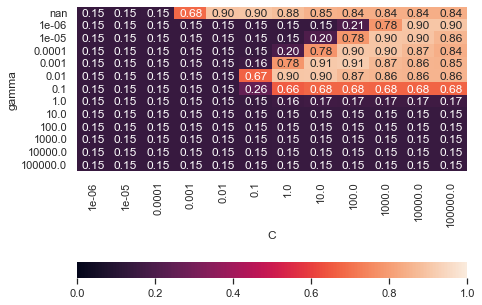

In [50]:
gs_std_cv_results = gs_std.cv_results_
#print(gs_std_cv_results)
gs_std_cv_results_new = {}
gs_std_cv_results_new["gamma"] = gs_std_cv_results["param_svc__gamma"]
        
gs_std_cv_results_new["C"] = gs_std_cv_results["param_svc__C"]
gs_std_cv_results_new["mean_test_score"] = gs_std_cv_results["mean_test_score"]

gs_std_cv_results_df = pd.DataFrame.from_dict(gs_std_cv_results_new)

gs_std_cv_results_df = gs_std_cv_results_df.pivot("gamma", "C", "mean_test_score")
#print(gs_std_cv_results_df)

grid_kws = {"height_ratios": (1, .1), "hspace": 1}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(7, 5))
ax = sns.heatmap(gs_std_cv_results_df, vmin=0, vmax=1, annot=True, fmt=".2f", ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})

## Performance measures of Kernel-SVM with Standard Scaled data

### Accuracy 

In [52]:
start_test = time.time()
k_svm_std = SVC(random_state=1, probability=True, C=100, gamma=0.001, kernel='rbf', decision_function_shape='ovr') # using the optimal values from GridSearch and Pipelines
k_svm_std.fit(X_tr_scaled, y_tr)
k_svm_std.predict(X_test_scaled)
print('The test data set accuracy for C=100, kernel=rbf and gamma=0.001 is ', k_svm_std.score(X_test_scaled, y_test))
end_test = time.time()
print('Time taken to test the model = ', end_test - start_test, 'seconds')

The test data set accuracy for C=100, kernel=rbf and gamma=0.001 is  0.9207207207207208
Time taken to test the model =  0.6152760982513428 seconds


### F1-score

In [53]:
y_pred_std = gs_std.predict(X_test)
print("The F1-score is ", f1_score(y_test, y_pred_std, average='weighted'))

The F1-score is  0.9238150378965164


### Plot ROC Curve - Kernel SVM with Standard scaled data

(555, 9)


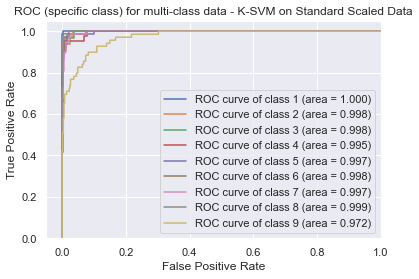

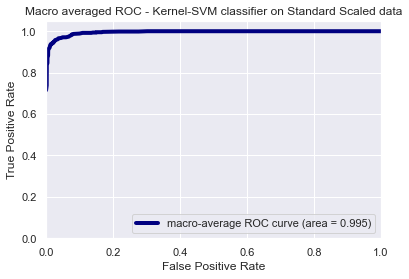

In [78]:
clf = SVC(probability=True, decision_function_shape='ovr', C=10, gamma=0.001, kernel='rbf')
clf.fit(X_tr_scaled, y_tr)
y_score = clf.predict_proba(X_test_scaled)

n_classes = y_score.shape[1]

print(y_score.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.3f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (specific class) for multi-class data - K-SVM on Standard Scaled Data')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr1_std = fpr["macro"]
tpr1_std = tpr["macro"]
roc_auc1_std = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.3f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro averaged ROC - Kernel-SVM classifier on Standard Scaled data")
plt.legend(loc="lower right")
plt.show()

### Area under ROC Curve (AUROC)

* Data preprocessed with Standard Scaler
* Tuned hyperparameters: C=10, gamma=0.001, kernel='rbf'

In [56]:
gs_std_auc = roc_auc_score(y_test, gs_std.predict_proba(X_test), multi_class='ovr')
print("AUC for Kernel SVM with StdScaled data and C=100, gamma=0.001 and kernel=rbf: {:.3f}".format(gs_std_auc))

AUC for Kernel SVM with StdScaled data and C=100, gamma=0.001 and kernel=rbf: 0.995


## [Principle Component Analysis (PCA) on Standard Scaled Data](#zeroth-bullet) <a class="anchor" id="sixth2.1-bullet"></a>

PCA component shape: (64, 64)
Cumulative explained variance ratio  [0.04361574 0.08537547 0.12105647 0.15417725 0.18544577 0.21528478
 0.2440124  0.27259493 0.29978686 0.32550125 0.35080877 0.37497672
 0.39830457 0.42094267 0.44294986 0.46450267 0.4854765  0.5056787
 0.52524598 0.54433737 0.56318768 0.5814533  0.59941942 0.6171892
 0.63473947 0.65207893 0.6691324  0.68567334 0.7017931  0.71780616
 0.73334854 0.74868271 0.76379418 0.77858122 0.79283708 0.80639985
 0.81922981 0.83187441 0.844195   0.85642934 0.86842071 0.87997623
 0.89098631 0.90163901 0.91178602 0.92173541 0.9313133  0.94051112
 0.94932642 0.95791271 0.96629071 0.97405201 0.98124156 0.98823841
 0.99427137 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


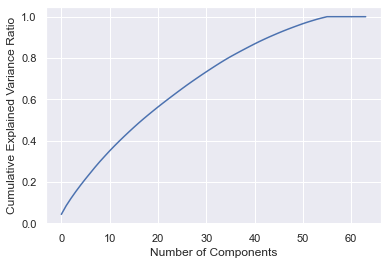

In [80]:
# Initializing the PCA transformer
pca_ksvm_std = PCA()

# Dimensionality Reduction
Xtr_pca_ksvm_std = pca_ksvm_std.fit_transform(X_tr_scaled)
Xtest_pca_ksvm_std = pca_ksvm_std.transform(X_test_scaled)

# Assessing the Principal components
print("PCA component shape: {}".format(pca_ksvm_std.components_.shape))

# Plotting Explained Variance Ratio graph
print("Cumulative explained variance ratio ", np.cumsum(pca_ksvm_std.explained_variance_ratio_))
plt.plot(np.cumsum(pca_ksvm_std.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [81]:
# Reducing the number of dimensions to 34 to correspond to 80% of variance explained
pca_ksvm_reduced1_std = PCA(n_components = 34)

# Dimensionality Reduction
Xtr_pca_ksvm_reduced1_std = pca_ksvm_reduced1_std.fit_transform(X_tr_scaled)
Xtest_pca_ksvm_reduced1_std = pca_ksvm_reduced1_std.transform(X_test_scaled)

# Fitting the Kernel-SVM model to the reduced dataset
k_svm_reduced1_std = k_svm.fit(Xtr_pca_ksvm_reduced1_std, y_tr)

# Predicting results on reduced test dataset
y_pred_ksvm_reduced1_std = k_svm.predict(Xtest_pca_ksvm_reduced1_std)

In [62]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset is ", k_svm_reduced1_std.score(Xtest_pca_ksvm_reduced1_std, y_test))

The average test accuracy on reduced dataset is  0.8828828828828829


In [63]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_ksvm_reduced1_std, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced1, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8826312768810719


(555, 9)


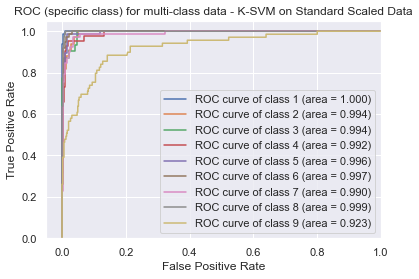

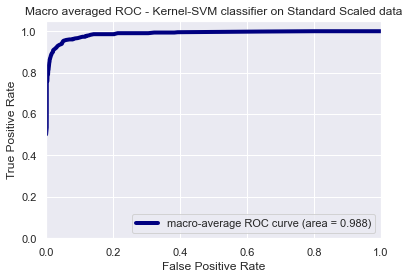

In [82]:
clf = SVC(probability=True, decision_function_shape='ovr', C=10, gamma=0.001, kernel='rbf')
clf.fit(Xtr_pca_ksvm_reduced1_std, y_tr)
y_score = clf.predict_proba(Xtest_pca_ksvm_reduced1_std)

n_classes = y_score.shape[1]

print(y_score.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.3f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (specific class) for multi-class data - K-SVM on Standard Scaled Data')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr1_std_pca1 = fpr["macro"]
tpr1_std_pca1 = tpr["macro"]
roc_auc1_std_pca1 = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.3f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro averaged ROC - Kernel-SVM classifier on Standard Scaled data")
plt.legend(loc="lower right")
plt.show()

In [64]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 34 dimensions using PCA

k_svm_auc = roc_auc_score(y_test, k_svm.predict_proba(Xtest_pca_ksvm_reduced1_std), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_svm_auc))

AUC for Kernel SVM: 0.990


In [84]:
# Reducing the number of dimensions to 45 to correspond to 90% of variance explained
pca_ksvm_reduced2_std = PCA(n_components = 45)

# Dimensionality Reduction
Xtr_pca_ksvm_reduced2_std = pca_ksvm_reduced2_std.fit_transform(X_tr_scaled)
Xtest_pca_ksvm_reduced2_std = pca_ksvm_reduced2_std.transform(X_test_scaled)

# Fitting the Kernel-SVM model to the reduced dataset
k_svm_reduced2_std = k_svm.fit(Xtr_pca_ksvm_reduced2_std, y_tr)

# Predicting results on reduced test dataset
y_pred_ksvm_reduced2_std = k_svm.predict(Xtest_pca_ksvm_reduced2_std)

In [85]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset 2 is ", k_svm_reduced2_std.score(Xtest_pca_ksvm_reduced2_std, y_test))

The average test accuracy on reduced dataset 2 is  0.8864864864864865


In [67]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_ksvm_reduced2_std, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced2, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.891549751183218


(555, 9)


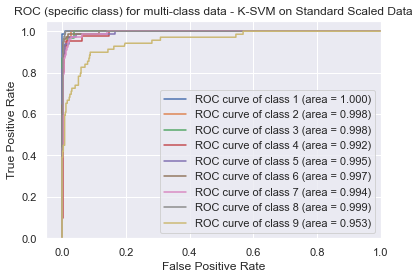

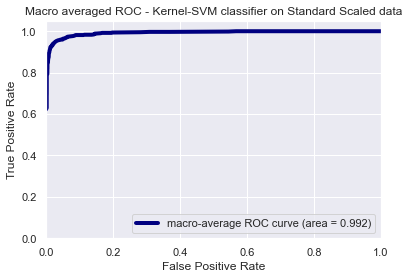

In [86]:
clf = SVC(probability=True, decision_function_shape='ovr', C=10, gamma=0.001, kernel='rbf')
clf.fit(Xtr_pca_ksvm_reduced2_std, y_tr)
y_score = clf.predict_proba(Xtest_pca_ksvm_reduced2_std)

n_classes = y_score.shape[1]

print(y_score.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.3f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (specific class) for multi-class data - K-SVM on Standard Scaled Data')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr1_std_pca2 = fpr["macro"]
tpr1_std_pca2 = tpr["macro"]
roc_auc1_std_pca2 = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.3f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro averaged ROC - Kernel-SVM classifier on Standard Scaled data")
plt.legend(loc="lower right")
plt.show()

In [68]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 45 dimensions using PCA

k_svm_auc = roc_auc_score(y_test, k_svm.predict_proba(Xtest_pca_ksvm_reduced2_std), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_svm_auc))

AUC for Kernel SVM: 0.991


## [Kernel-SVM classifier on mapped Standard Scaled Data using K-Means clustering](#zeroth-bullet) <a class="anchor" id="sixth2.2-bullet"></a>

In [264]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 100

k_svm_std.fit(X_tr_clust100_std, y_tr_clust100_std)
y_pred_clust100_std = k_svm_std.predict(X_test_clust100_std)
print("The average test accuracy is ", k_svm_std.score(X_test_clust100_std, y_test_clust100_std))

The average test accuracy is  0.8774774774774775


In [265]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust100_std, average='weighted'))
#print(classification_report(y_test, y_pred_clust100, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8764345807373303


(555, 9)


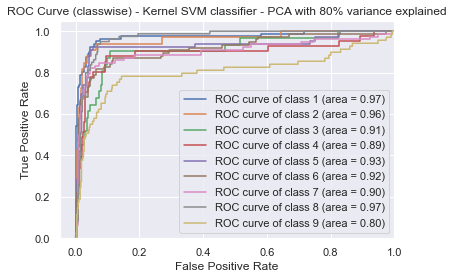

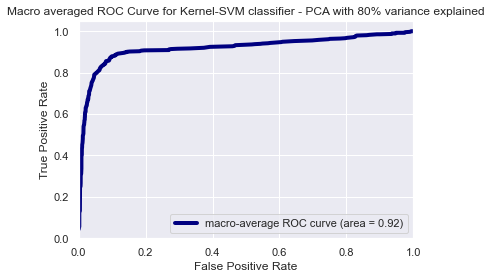

In [87]:
clf = SVC(probability=True, decision_function_shape='ovr', C=10, gamma=0.001, kernel='rbf')
clf.fit(X_tr_clust100, y_tr)
y_score = clf.predict_proba(X_test_clust100)

n_classes = y_score.shape[1]

print(y_score.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (classwise) - Kernel SVM classifier - PCA with 80% variance explained')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr1_std_clust100 = fpr["macro"]
tpr1_std_clust100 = tpr["macro"]
roc_auc1_std_clust100 = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro averaged ROC Curve for Kernel-SVM classifier - PCA with 80% variance explained")
plt.legend(loc="lower right")
plt.show()

In [88]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 100 cluster distance dimension space

k_svm_auc = roc_auc_score(y_test, k_svm_std.predict_proba(X_test_clust100_std), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_svm_auc))

NameError: name 'k_svm_std' is not defined

In [267]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 200

k_svm_std.fit(X_tr_clust200_std, y_tr_clust200_std)
y_pred_clust200_std = k_svm_std.predict(X_test_clust200_std)
print("The average test accuracy is ", k_svm_std.score(X_test_clust200_std, y_test_clust200_std))

The average test accuracy is  0.8774774774774775


In [268]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust200_std, average='weighted'))
#print(classification_report(y_test, y_pred_clust200, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8780740198609961


In [269]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 200 cluster distance dimension space

k_svm_auc = roc_auc_score(y_test, k_svm_std.predict_proba(X_test_clust200_std), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_svm_auc))

AUC for Kernel SVM: 0.989


## [Pipelines and GridSearch - Kernel SVM with MinMax Scaled data](#zeroth-bullet) <a class="anchor" id="sixth3-bullet"></a>

In [75]:
svc_fitter = SVC(random_state=1, probability=True, decision_function_shape='ovr')
pipe_svc = make_pipeline(MinMaxScaler(), svc_fitter) 
param_range = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0] 
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]
gs_mm = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=4, refit=True, verbose=4)
gs = gs_mm.fit(X_tr, y_tr) 
print("Best cross-validation accuracy: ", gs_mm.best_score_)
print("Best estimator is: ", gs_mm.best_estimator_)
print("Best parameters: ", gs_mm.best_params_)
print(classification_report(y_test, y_pred, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

Fitting 4 folds for each of 156 candidates, totalling 624 fits
[CV 1/4] END ..svc__C=1e-06, svc__kernel=linear;, score=0.149 total time=   0.5s
[CV 2/4] END ..svc__C=1e-06, svc__kernel=linear;, score=0.149 total time=   0.4s
[CV 3/4] END ..svc__C=1e-06, svc__kernel=linear;, score=0.147 total time=   0.5s
[CV 4/4] END ..svc__C=1e-06, svc__kernel=linear;, score=0.149 total time=   0.6s
[CV 1/4] END ..svc__C=1e-05, svc__kernel=linear;, score=0.149 total time=   0.4s
[CV 2/4] END ..svc__C=1e-05, svc__kernel=linear;, score=0.149 total time=   0.5s
[CV 3/4] END ..svc__C=1e-05, svc__kernel=linear;, score=0.147 total time=   0.5s
[CV 4/4] END ..svc__C=1e-05, svc__kernel=linear;, score=0.149 total time=   0.5s
[CV 1/4] END .svc__C=0.0001, svc__kernel=linear;, score=0.149 total time=   0.5s
[CV 2/4] END .svc__C=0.0001, svc__kernel=linear;, score=0.149 total time=   0.5s
[CV 3/4] END .svc__C=0.0001, svc__kernel=linear;, score=0.147 total time=   0.4s
[CV 4/4] END .svc__C=0.0001, svc__kernel=linea

[CV 3/4] END svc__C=1e-06, svc__gamma=100000.0, svc__kernel=rbf;, score=0.147 total time=   0.9s
[CV 4/4] END svc__C=1e-06, svc__gamma=100000.0, svc__kernel=rbf;, score=0.149 total time=   0.9s
[CV 1/4] END svc__C=1e-05, svc__gamma=1e-06, svc__kernel=rbf;, score=0.149 total time=   1.1s
[CV 2/4] END svc__C=1e-05, svc__gamma=1e-06, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 3/4] END svc__C=1e-05, svc__gamma=1e-06, svc__kernel=rbf;, score=0.147 total time=   1.0s
[CV 4/4] END svc__C=1e-05, svc__gamma=1e-06, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 1/4] END svc__C=1e-05, svc__gamma=1e-05, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 2/4] END svc__C=1e-05, svc__gamma=1e-05, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 3/4] END svc__C=1e-05, svc__gamma=1e-05, svc__kernel=rbf;, score=0.147 total time=   1.0s
[CV 4/4] END svc__C=1e-05, svc__gamma=1e-05, svc__kernel=rbf;, score=0.149 total time=   1.1s
[CV 1/4] END svc__C=1e-05, svc__gamma=0.0001, svc__ker

[CV 2/4] END svc__C=0.0001, svc__gamma=1000.0, svc__kernel=rbf;, score=0.149 total time=   1.1s
[CV 3/4] END svc__C=0.0001, svc__gamma=1000.0, svc__kernel=rbf;, score=0.147 total time=   1.1s
[CV 4/4] END svc__C=0.0001, svc__gamma=1000.0, svc__kernel=rbf;, score=0.149 total time=   1.1s
[CV 1/4] END svc__C=0.0001, svc__gamma=10000.0, svc__kernel=rbf;, score=0.149 total time=   0.9s
[CV 2/4] END svc__C=0.0001, svc__gamma=10000.0, svc__kernel=rbf;, score=0.149 total time=   0.9s
[CV 3/4] END svc__C=0.0001, svc__gamma=10000.0, svc__kernel=rbf;, score=0.147 total time=   0.9s
[CV 4/4] END svc__C=0.0001, svc__gamma=10000.0, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 1/4] END svc__C=0.0001, svc__gamma=100000.0, svc__kernel=rbf;, score=0.149 total time=   1.1s
[CV 2/4] END svc__C=0.0001, svc__gamma=100000.0, svc__kernel=rbf;, score=0.149 total time=   1.0s
[CV 3/4] END svc__C=0.0001, svc__gamma=100000.0, svc__kernel=rbf;, score=0.147 total time=   1.0s
[CV 4/4] END svc__C=0.0001, sv

[CV 2/4] END svc__C=0.01, svc__gamma=10.0, svc__kernel=rbf;, score=0.149 total time=   1.2s
[CV 3/4] END svc__C=0.01, svc__gamma=10.0, svc__kernel=rbf;, score=0.147 total time=   1.2s
[CV 4/4] END svc__C=0.01, svc__gamma=10.0, svc__kernel=rbf;, score=0.149 total time=   1.2s
[CV 1/4] END svc__C=0.01, svc__gamma=100.0, svc__kernel=rbf;, score=0.149 total time=   1.2s
[CV 2/4] END svc__C=0.01, svc__gamma=100.0, svc__kernel=rbf;, score=0.149 total time=   1.2s
[CV 3/4] END svc__C=0.01, svc__gamma=100.0, svc__kernel=rbf;, score=0.147 total time=   1.3s
[CV 4/4] END svc__C=0.01, svc__gamma=100.0, svc__kernel=rbf;, score=0.149 total time=   1.3s
[CV 1/4] END svc__C=0.01, svc__gamma=1000.0, svc__kernel=rbf;, score=0.149 total time=   1.3s
[CV 2/4] END svc__C=0.01, svc__gamma=1000.0, svc__kernel=rbf;, score=0.149 total time=   1.2s
[CV 3/4] END svc__C=0.01, svc__gamma=1000.0, svc__kernel=rbf;, score=0.147 total time=   1.3s
[CV 4/4] END svc__C=0.01, svc__gamma=1000.0, svc__kernel=rbf;, score=0

[CV 3/4] END svc__C=1.0, svc__gamma=0.1, svc__kernel=rbf;, score=0.815 total time=   0.8s
[CV 4/4] END svc__C=1.0, svc__gamma=0.1, svc__kernel=rbf;, score=0.832 total time=   0.9s
[CV 1/4] END svc__C=1.0, svc__gamma=1.0, svc__kernel=rbf;, score=0.923 total time=   0.6s
[CV 2/4] END svc__C=1.0, svc__gamma=1.0, svc__kernel=rbf;, score=0.909 total time=   0.6s
[CV 3/4] END svc__C=1.0, svc__gamma=1.0, svc__kernel=rbf;, score=0.916 total time=   0.6s
[CV 4/4] END svc__C=1.0, svc__gamma=1.0, svc__kernel=rbf;, score=0.918 total time=   0.6s
[CV 1/4] END svc__C=1.0, svc__gamma=10.0, svc__kernel=rbf;, score=0.612 total time=   1.3s
[CV 2/4] END svc__C=1.0, svc__gamma=10.0, svc__kernel=rbf;, score=0.538 total time=   1.4s
[CV 3/4] END svc__C=1.0, svc__gamma=10.0, svc__kernel=rbf;, score=0.579 total time=   1.3s
[CV 4/4] END svc__C=1.0, svc__gamma=10.0, svc__kernel=rbf;, score=0.599 total time=   1.3s
[CV 1/4] END svc__C=1.0, svc__gamma=100.0, svc__kernel=rbf;, score=0.153 total time=   1.5s
[CV 

[CV 4/4] END svc__C=100.0, svc__gamma=0.001, svc__kernel=rbf;, score=0.829 total time=   0.7s
[CV 1/4] END svc__C=100.0, svc__gamma=0.01, svc__kernel=rbf;, score=0.921 total time=   0.4s
[CV 2/4] END svc__C=100.0, svc__gamma=0.01, svc__kernel=rbf;, score=0.925 total time=   0.4s
[CV 3/4] END svc__C=100.0, svc__gamma=0.01, svc__kernel=rbf;, score=0.904 total time=   0.4s
[CV 4/4] END svc__C=100.0, svc__gamma=0.01, svc__kernel=rbf;, score=0.901 total time=   0.4s
[CV 1/4] END svc__C=100.0, svc__gamma=0.1, svc__kernel=rbf;, score=0.923 total time=   0.4s
[CV 2/4] END svc__C=100.0, svc__gamma=0.1, svc__kernel=rbf;, score=0.904 total time=   0.4s
[CV 3/4] END svc__C=100.0, svc__gamma=0.1, svc__kernel=rbf;, score=0.901 total time=   0.3s
[CV 4/4] END svc__C=100.0, svc__gamma=0.1, svc__kernel=rbf;, score=0.906 total time=   0.3s
[CV 1/4] END svc__C=100.0, svc__gamma=1.0, svc__kernel=rbf;, score=0.902 total time=   0.4s
[CV 2/4] END svc__C=100.0, svc__gamma=1.0, svc__kernel=rbf;, score=0.853 t

[CV 3/4] END svc__C=10000.0, svc__gamma=1e-05, svc__kernel=rbf;, score=0.815 total time=   0.8s
[CV 4/4] END svc__C=10000.0, svc__gamma=1e-05, svc__kernel=rbf;, score=0.829 total time=   0.8s
[CV 1/4] END svc__C=10000.0, svc__gamma=0.0001, svc__kernel=rbf;, score=0.918 total time=   0.4s
[CV 2/4] END svc__C=10000.0, svc__gamma=0.0001, svc__kernel=rbf;, score=0.925 total time=   0.5s
[CV 3/4] END svc__C=10000.0, svc__gamma=0.0001, svc__kernel=rbf;, score=0.897 total time=   0.4s
[CV 4/4] END svc__C=10000.0, svc__gamma=0.0001, svc__kernel=rbf;, score=0.901 total time=   0.4s
[CV 1/4] END svc__C=10000.0, svc__gamma=0.001, svc__kernel=rbf;, score=0.897 total time=   0.3s
[CV 2/4] END svc__C=10000.0, svc__gamma=0.001, svc__kernel=rbf;, score=0.882 total time=   0.3s
[CV 3/4] END svc__C=10000.0, svc__gamma=0.001, svc__kernel=rbf;, score=0.882 total time=   0.4s
[CV 4/4] END svc__C=10000.0, svc__gamma=0.001, svc__kernel=rbf;, score=0.904 total time=   0.3s
[CV 1/4] END svc__C=10000.0, svc__ga

[CV 4/4] END svc__C=100000.0, svc__gamma=10000.0, svc__kernel=rbf;, score=0.149 total time=   1.3s
[CV 1/4] END svc__C=100000.0, svc__gamma=100000.0, svc__kernel=rbf;, score=0.151 total time=   1.6s
[CV 2/4] END svc__C=100000.0, svc__gamma=100000.0, svc__kernel=rbf;, score=0.154 total time=   1.4s
[CV 3/4] END svc__C=100000.0, svc__gamma=100000.0, svc__kernel=rbf;, score=0.151 total time=   1.2s
[CV 4/4] END svc__C=100000.0, svc__gamma=100000.0, svc__kernel=rbf;, score=0.149 total time=   1.3s
Best cross-validation accuracy:  0.9183095831027486
Best estimator is:  Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc',
                 SVC(C=10.0, gamma=0.1, probability=True, random_state=1))])
Best parameters:  {'svc__C': 10.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
                       precision    recall  f1-score   support

Pierre-Auguste_Renoir       1.00      0.99      0.99        81
              Raphael       1.00      0.85      0.92        33
    Leonardo

The Pipelines and GridSearchCV was used to determing the most optimal values for hyperparameters of the KernelSVM - by feeding both Standard Scaler and MinMax Scaler in separate runs. The `best cross-validation accuracy` for Kernel-SVM with Standard Scaler was 0.90 and with MinMax Scaler was 0.91. In the following cells, the performance measures will be assessed based on `AUROC` and `F1-measure`. 

### Visualization of Parameter optimization - Heatmap

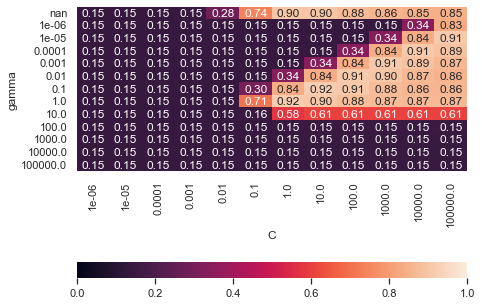

In [76]:
gs_mm_cv_results = gs_mm.cv_results_

gs_mm_cv_results_new = {}
gs_mm_cv_results_new["gamma"] = gs_mm_cv_results["param_svc__gamma"]
      
gs_mm_cv_results_new["C"] = gs_mm_cv_results["param_svc__C"]
gs_mm_cv_results_new["mean_test_score"] = gs_mm_cv_results["mean_test_score"]

gs_mm_cv_results_df = pd.DataFrame.from_dict(gs_mm_cv_results_new)

gs_mm_cv_results_df = gs_mm_cv_results_df.pivot("gamma", "C", "mean_test_score")
#print(gs_std_cv_results_df)

grid_kws = {"height_ratios": (1, .1), "hspace": 1}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(7, 5))
ax = sns.heatmap(gs_mm_cv_results_df, vmin=0, vmax=1, annot=True, fmt=".2f", ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})

## Performance measures of Kernel-SVM with MinMax Scaled data

### Accuracy

In [77]:
start_test = time.time()
k_svm = SVC(random_state=1, probability=True, C=10, gamma=0.1, kernel='rbf', decision_function_shape='ovr') # using the optimal values from GridSearch and Pipelines
k_svm.fit(X_tr_mmscaled, y_tr)
k_svm.predict(X_test_mmscaled)
print('The test data set accuracy for C=10, kernel=rbf and gamma=0.1 is ', k_svm.score(X_test_mmscaled, y_test))
end_test = time.time()
print('Time taken to test the model = ', end_test - start_test, 'seconds')

The test data set accuracy for C=10, kernel=rbf and gamma=0.1 is  0.9279279279279279
Time taken to test the model =  0.8493928909301758 seconds


### F1-score

In [78]:
y_pred_mm = gs_mm.predict(X_test)
print("The F1-score is ", f1_score(y_test, y_pred_mm, average='weighted'))

The F1-score is  0.9275758654875824


### Plot ROC Curve - Kernel SVM with MinMax Scaled data

(555, 9)


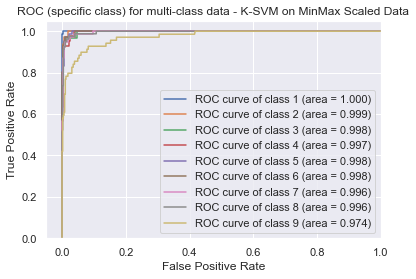

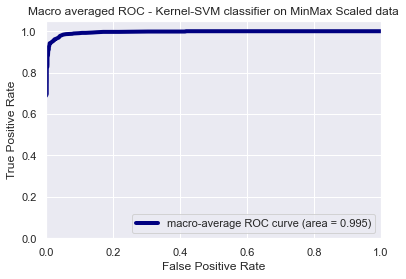

In [79]:
clf = SVC(probability=True, decision_function_shape='ovr', C=1, gamma=1, kernel='rbf')
clf.fit(X_tr_mmscaled, y_tr)
y_score = clf.predict_proba(X_test_mmscaled)

n_classes = y_score.shape[1]

print(y_score.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.3f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (specific class) for multi-class data - K-SVM on MinMax Scaled Data')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr1_mm = fpr["macro"]
tpr1_mm = tpr["macro"]
roc_auc1_mm = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.3f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro averaged ROC - Kernel-SVM classifier on MinMax Scaled data")
plt.legend(loc="lower right")
plt.show()

### Aread under ROC Curve (AUROC)
* Data preprocessed with MinMax Scaler
* Hyperparameters tuned: C=1, gamma=1, kernel='rbf'

In [81]:
gs_mm_auc = roc_auc_score(y_test, gs_mm.predict_proba(X_test), multi_class='ovr')
print("AUC for Kernel SVM with MinMax data and C=10, gamma=0.1 and kernel=rbf: {:.3f}".format(gs_mm_auc))

AUC for Kernel SVM with MinMax data and C=10, gamma=0.1 and kernel=rbf: 0.997


## [Principle Component Analysis (PCA) on MinMax Scaled Data](#zeroth-bullet) <a class="anchor" id="sixth3.1-bullet"></a>

PCA component shape: (64, 64)
Cumulative explained variance ratio  [0.09100777 0.15732943 0.21358622 0.26488727 0.31069145 0.35159808
 0.39121968 0.42924236 0.46374919 0.4968984  0.52634189 0.5532711
 0.57952117 0.60492005 0.62735364 0.64934542 0.67009267 0.68923041
 0.70827499 0.72596033 0.74301191 0.75924386 0.77412371 0.78875875
 0.80238673 0.8155316  0.82805152 0.83958641 0.85066181 0.86136015
 0.87171697 0.88172101 0.89140909 0.90007847 0.90835576 0.91639942
 0.9239934  0.93137382 0.93851197 0.94553022 0.95217467 0.95840518
 0.96442475 0.96973138 0.97443707 0.97891302 0.98282515 0.98651939
 0.98974633 0.99269355 0.99554256 0.99674579 0.99775346 0.99875316
 0.99950389 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


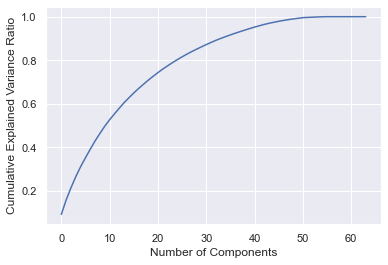

In [82]:
# Initializing the PCA transformer
pca_ksvm_mm = PCA()

# Dimensionality Reduction
Xtr_pca_ksvm_mm = pca_ksvm_mm.fit_transform(X_tr_mmscaled)
Xtest_pca_ksvm_mm = pca_ksvm_mm.transform(X_test_mmscaled)

# Assessing the Principal components
print("PCA component shape: {}".format(pca_ksvm_mm.components_.shape))

# Plotting Explained Variance Ratio graph
print("Cumulative explained variance ratio ", np.cumsum(pca_ksvm_mm.explained_variance_ratio_))
plt.plot(np.cumsum(pca_ksvm_mm.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [83]:
# Reducing the number of dimensions to 23 to correspond to 80% of variance explained
pca_ksvm_reduced1_mm = PCA(n_components = 23)

# Dimensionality Reduction
Xtr_pca_ksvm_reduced1_mm = pca_ksvm_reduced1_mm.fit_transform(X_tr_mmscaled)
Xtest_pca_ksvm_reduced1_mm = pca_ksvm_reduced1_mm.transform(X_test_mmscaled)

# Fitting the Kernel-SVM model to the reduced dataset
k_svm_reduced1_mm = k_svm.fit(Xtr_pca_ksvm_reduced1_mm, y_tr)

# Predicting results on reduced test dataset
y_pred_ksvm_reduced1_mm = k_svm.predict(Xtest_pca_ksvm_reduced1_mm)

In [84]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset is ", k_svm_reduced1_mm.score(Xtest_pca_ksvm_reduced1_mm, y_test))

The average test accuracy on reduced dataset is  0.8828828828828829


In [85]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_ksvm_reduced1_mm, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced1, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8825206768582816


In [86]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 34 dimensions using PCA

k_svm_auc = roc_auc_score(y_test, k_svm.predict_proba(Xtest_pca_ksvm_reduced1_mm), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_svm_auc))

AUC for Kernel SVM: 0.990


In [87]:
# Reducing the number of dimensions to 34 to correspond to 90% of variance explained
pca_ksvm_reduced2_mm = PCA(n_components = 34)

# Dimensionality Reduction
Xtr_pca_ksvm_reduced2_mm = pca_ksvm_reduced2_mm.fit_transform(X_tr_mmscaled)
Xtest_pca_ksvm_reduced2_mm = pca_ksvm_reduced2_mm.transform(X_test_mmscaled)

# Fitting the Kernel-SVM model to the reduced dataset
k_svm_reduced2_mm = k_svm.fit(Xtr_pca_ksvm_reduced2_mm, y_tr)

# Predicting results on reduced test dataset
y_pred_ksvm_reduced2_mm = k_svm.predict(Xtest_pca_ksvm_reduced2_mm)

In [88]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset 2 is ", k_svm_reduced2_mm.score(Xtest_pca_ksvm_reduced2_mm, y_test))

The average test accuracy on reduced dataset 2 is  0.9135135135135135


In [89]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_ksvm_reduced2_mm, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced2, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.9127174206155704


In [90]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 45 dimensions using PCA

k_svm_auc = roc_auc_score(y_test, k_svm.predict_proba(Xtest_pca_ksvm_reduced2_mm), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_svm_auc))

AUC for Kernel SVM: 0.995


## [Kernel-SVM classifier on mapped MinMax Scaled Data using K-Means clustering](#zeroth-bullet) <a class="anchor" id="sixth3.2-bullet"></a>

In [91]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 100

k_svm.fit(X_tr_clust100_mm, y_tr_clust100_mm)
y_pred_clust100_mm = k_svm.predict(X_test_clust100_mm)
print("The average test accuracy is ", k_svm.score(X_test_clust100_mm, y_test_clust100_mm))

The average test accuracy is  0.9081081081081082


In [92]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust100_mm, average='weighted'))
#print(classification_report(y_test, y_pred_clust100, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.9074246401049874


In [93]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 100 cluster distance dimension space

k_svm_auc = roc_auc_score(y_test, k_svm.predict_proba(X_test_clust100_mm), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_svm_auc))

AUC for Kernel SVM: 0.994


In [94]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 200

k_svm.fit(X_tr_clust200_mm, y_tr_clust200_mm)
y_pred_clust200_mm = k_svm.predict(X_test_clust200_mm)
print("The average test accuracy is ", k_svm.score(X_test_clust200_mm, y_test_clust200_mm))

The average test accuracy is  0.9225225225225225


In [95]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust200_mm, average='weighted'))
#print(classification_report(y_test, y_pred_clust200, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.9224105030532154


In [96]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 200 cluster distance dimension space

k_svm_auc = roc_auc_score(y_test, k_svm.predict_proba(X_test_clust200_mm), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_svm_auc))

AUC for Kernel SVM: 0.993


## Comparison of Performance measures for Kernel-SVM
* Kernel-SVM on Original Data
* Kernel-SVM on Data preprocessed with Standard Scaler
* Kernel-SVM on Data preprocessed with MinMax Scaler

In [ ]:
data = {'Data':['Original data','Standard Scaled data', 'MinMax Scaled data'],
        'C': [1.0, 10, 1.0],
        'gamma': ['scale', 0.001, 1.0],
        'kernel': ['rbf', 'rbf', 'rbf'],
        'Accuracy':[90.8, 91.71, 90.09],  
        'AUROC':[0.996, 0.995, 0.996],
        'F1-score (weighted)': [0.9102, 0.9131, 0.9263]}
df = pd.DataFrame(data)
df

# [Logistic Regression Classifier](#zeroth-bullet) <a class="anchor" id="seventh-bullet"></a>

## [Evaluating the classifier on original data](#zeroth-bullet) <a class="anchor" id="seventh1-bullet"></a>
* without preprocessing
* using default parameters for the classifier
* no GridSearch and 4-fold cross-validation

In [113]:
start = time.time()
log_reg = LogisticRegression(max_iter=10000, multi_class='ovr')
log_reg.fit(X_tr, y_tr)
y_pred = log_reg.predict(X_test)
end = time.time()
print("Time taken to run Kernel SVM classifier on original data is ", end-start, "seconds")

Time taken to run Kernel SVM classifier on original data is  1.3652238845825195 seconds


### Accuracy

In [98]:
print("The average test accuracy is ", log_reg.score(X_test, y_test))

The average test accuracy is  0.9045045045045045


### F1-score and classification report

In [99]:
print("The F1-score is ", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score is  0.9056548505676756
                       precision    recall  f1-score   support

Pierre-Auguste_Renoir       0.95      1.00      0.98        81
              Raphael       1.00      0.88      0.94        33
    Leonardo_da_Vinci       0.91      0.94      0.92        31
    Sandro_Botticelli       0.87      0.83      0.85        41
       Francisco_Goya       0.91      0.91      0.91        66
     Vincent_van_Gogh       0.97      0.92      0.95        76
        Pablo_Picasso       0.96      0.94      0.95        78
       Albrecht_Durer       0.93      0.93      0.93        80
               Others       0.68      0.75      0.72        69

             accuracy                           0.90       555
            macro avg       0.91      0.90      0.90       555
         weighted avg       0.91      0.90      0.91       555



### Plot ROC curve

(555, 9)


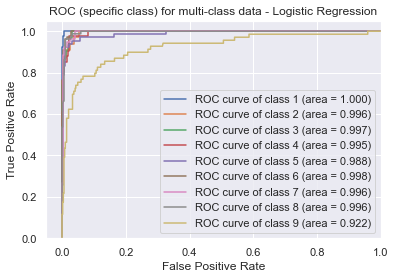

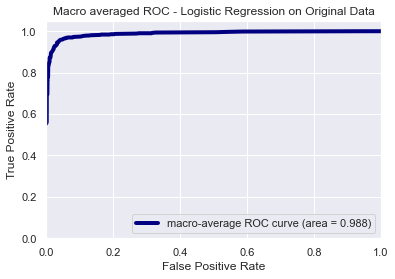

In [100]:
clf_lr = LogisticRegression(max_iter=1000, multi_class='ovr')
clf_lr.fit(X_tr, y_tr)
y_score_lr = clf_lr.predict_proba(X_test)

n_classes = y_score_lr.shape[1]

print(y_score_lr.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.3f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (specific class) for multi-class data - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score_lr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr2 = fpr["macro"]
tpr2 = tpr["macro"]
roc_auc2 = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.3f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro averaged ROC - Logistic Regression on Original Data")
plt.legend(loc="lower right")
plt.show()

### Area under ROC curve (AUROC)
* Original data (no preprocessing)

In [101]:
lr_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(lr_auc))

AUC for Kernel SVM: 0.987


## [Principle Component Analysis (PCA) on Original Data](#zeroth-bullet) <a class="anchor" id="seventh1.1-bullet"></a>

PCA component shape: (64, 64)
Cumulative explained variance ratio  [0.16145397 0.30506004 0.38055826 0.44456773 0.49526939 0.54154848
 0.58483048 0.62313724 0.65749001 0.69071953 0.71592688 0.73955722
 0.76258984 0.78543201 0.8069315  0.82699799 0.84452346 0.86004871
 0.87309588 0.88549563 0.89700082 0.90703917 0.91651096 0.92509267
 0.93272162 0.93983388 0.94626972 0.9524665  0.95756323 0.96253662
 0.96675975 0.97056984 0.97422849 0.97761555 0.98076611 0.98381562
 0.98667961 0.98890457 0.99083324 0.99249571 0.99397774 0.99528858
 0.99655911 0.99771496 0.99850563 0.99902752 0.99932562 0.99956433
 0.99971467 0.9998426  0.99993505 0.99997251 0.99998454 0.99999297
 0.99999855 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


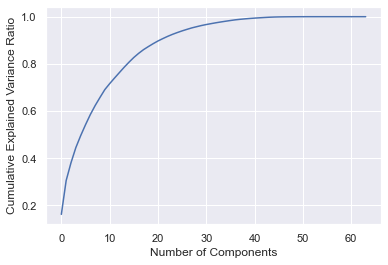

In [102]:
# Initializing the PCA transformer
pca_lr = PCA()

# Dimensionality Reduction
X_tr_pca_lr = pca_lr.fit_transform(X_tr)
X_test_pca_lr = pca_lr.transform(X_test)

# Assessing the Principal components
print("PCA component shape: {}".format(pca_lr.components_.shape))

# Plotting Explained Variance Ratio graph
print("Cumulative explained variance ratio ", np.cumsum(pca_lr.explained_variance_ratio_))
plt.plot(np.cumsum(pca_lr.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

From the `Cumulative Explained Variance Ratio graph`, we see that 80% of the variance is explained using 14 features. Therefore, we can try applying PCA to the dataset to reduce the dimensions to 14 features and then assessing the performance of the classifier

In [103]:
# Reducing the number of dimensions to 13 to correspond to 80% of variance explained
pca_lr_reduced1 = PCA(n_components = 13)

# Dimensionality Reduction
Xtr_pca_lr_reduced1 = pca_lr_reduced1.fit_transform(X_tr)
Xtest_pca_lr_reduced1 = pca_lr_reduced1.transform(X_test)

# Fitting the Kernel-SVM model to the reduced dataset
lr_reduced1 = log_reg.fit(Xtr_pca_lr_reduced1, y_tr)

# Predicting results on reduced test dataset
y_pred_lr_reduced1 = log_reg.predict(Xtest_pca_lr_reduced1)

In [104]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset is ", lr_reduced1.score(Xtest_pca_lr_reduced1, y_test))

The average test accuracy on reduced dataset is  0.790990990990991


In [105]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_lr_reduced1, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced1, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.795644403039022


In [107]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 34 dimensions using PCA

lr_auc = roc_auc_score(y_test, log_reg.predict_proba(Xtest_pca_lr_reduced1), multi_class='ovr')
print("AUC for Logistic Regression: {:.3f}".format(lr_auc))

AUC for Logistic Regression: 0.965


In [108]:
# Reducing the number of dimensions to 20 to correspond to 90% of variance explained
pca_lr_reduced2 = PCA(n_components = 20)

# Dimensionality Reduction
Xtr_pca_lr_reduced2 = pca_lr_reduced2.fit_transform(X_tr)
Xtest_pca_lr_reduced2 = pca_lr_reduced2.transform(X_test)

# Fitting the Kernel-SVM model to the reduced dataset
lr_reduced2 = log_reg.fit(Xtr_pca_lr_reduced2, y_tr)

# Predicting results on reduced test dataset
y_pred_lr_reduced2 = log_reg.predict(Xtest_pca_lr_reduced2)

In [109]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset 2 is ", lr_reduced2.score(Xtest_pca_lr_reduced2, y_test))

The average test accuracy on reduced dataset 2 is  0.8432432432432433


In [110]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_lr_reduced2, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced2, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8472526090612479


In [111]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 45 dimensions using PCA

k_lr_auc = roc_auc_score(y_test, log_reg.predict_proba(Xtest_pca_lr_reduced2), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_lr_auc))

AUC for Kernel SVM: 0.977


## [Logistic Regression classifier on mapped Original Data using K-Means clustering](#zeroth-bullet) <a class="anchor" id="seventh1.2-bullet"></a>

In [114]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 100

log_reg.fit(X_tr_clust100, y_tr_clust100)
y_pred_clust100_lr = log_reg.predict(X_test_clust100)
print("The average test accuracy is ", log_reg.score(X_test_clust100, y_test_clust100))

The average test accuracy is  0.9135135135135135


In [115]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust100_lr, average='weighted'))
#print(classification_report(y_test, y_pred_clust100, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.9126345859938124


In [116]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 100 cluster distance dimension space

lr_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_clust100), multi_class='ovr')
print("AUC for Logistic Regression: {:.3f}".format(lr_auc))

AUC for Logistic Regression: 0.995


In [120]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 200

log_reg.fit(X_tr_clust200, y_tr_clust200)
y_pred_clust200_lr = log_reg.predict(X_test_clust200)
print("The average test accuracy is ", log_reg.score(X_test_clust200, y_test_clust200))

The average test accuracy is  0.9351351351351351


In [118]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust200_lr, average='weighted'))
#print(classification_report(y_test, y_pred_clust200, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.934888429149661


In [119]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 200 cluster distance dimension space

lr_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_clust200), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(lr_auc))

AUC for Kernel SVM: 0.996


## [Pipelines and GridSearch - Logistic Regression with Standard Scaled data](#zeroth-bullet) <a class="anchor" id="seventh2-bullet"></a>

In [121]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000, multi_class='ovr')) 
param_range = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0] 
param_grid = [{'logisticregression__C': param_range, 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
gs_std = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='accuracy', cv=4, refit=True, verbose=4)
gs = gs_std.fit(X_tr, y_tr)  # Fit the entire train dataset after cross-validation
print()
print("Best cross-validation accuracy: ", gs_std.best_score_)
print("Best estimator is: ", gs_std.best_estimator_)
print("Best parameters: ", gs_std.best_params_)
print(classification_report(y_test, y_pred, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV 1/4] END logisticregression__C=1e-06, logisticregression__solver=newton-cg;, score=0.149 total time=   0.1s
[CV 2/4] END logisticregression__C=1e-06, logisticregression__solver=newton-cg;, score=0.149 total time=   0.1s
[CV 3/4] END logisticregression__C=1e-06, logisticregression__solver=newton-cg;, score=0.147 total time=   0.1s
[CV 4/4] END logisticregression__C=1e-06, logisticregression__solver=newton-cg;, score=0.151 total time=   0.1s
[CV 1/4] END logisticregression__C=1e-06, logisticregression__solver=lbfgs;, score=0.149 total time=   0.1s
[CV 2/4] END logisticregression__C=1e-06, logisticregression__solver=lbfgs;, score=0.149 total time=   0.1s
[CV 3/4] END logisticregression__C=1e-06, logisticregression__solver=lbfgs;, score=0.147 total time=   0.1s
[CV 4/4] END logisticregression__C=1e-06, logisticregression__solver=lbfgs;, score=0.151 total time=   0.1s
[CV 1/4] END logisticregression__C=1e-06, logisticregressi

[CV 1/4] END logisticregression__C=0.001, logisticregression__solver=saga;, score=0.724 total time=   0.5s
[CV 2/4] END logisticregression__C=0.001, logisticregression__solver=saga;, score=0.697 total time=   0.4s
[CV 3/4] END logisticregression__C=0.001, logisticregression__solver=saga;, score=0.663 total time=   0.5s
[CV 4/4] END logisticregression__C=0.001, logisticregression__solver=saga;, score=0.680 total time=   0.5s
[CV 1/4] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.878 total time=   0.1s
[CV 2/4] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.877 total time=   0.1s
[CV 3/4] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.851 total time=   0.1s
[CV 4/4] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.853 total time=   0.1s
[CV 1/4] END logisticregression__C=0.01, logisticregression__solver=lbfgs;, score=0.878 total time=   0.0s
[CV 2/4] END logistic

[CV 2/4] END logisticregression__C=10.0, logisticregression__solver=sag;, score=0.923 total time=  14.5s
[CV 3/4] END logisticregression__C=10.0, logisticregression__solver=sag;, score=0.889 total time=  14.6s
[CV 4/4] END logisticregression__C=10.0, logisticregression__solver=sag;, score=0.911 total time=  16.3s
[CV 1/4] END logisticregression__C=10.0, logisticregression__solver=saga;, score=0.906 total time=  19.7s
[CV 2/4] END logisticregression__C=10.0, logisticregression__solver=saga;, score=0.925 total time=  19.5s
[CV 3/4] END logisticregression__C=10.0, logisticregression__solver=saga;, score=0.889 total time=  19.5s
[CV 4/4] END logisticregression__C=10.0, logisticregression__solver=saga;, score=0.911 total time=  21.7s
[CV 1/4] END logisticregression__C=100.0, logisticregression__solver=newton-cg;, score=0.882 total time=   0.5s
[CV 2/4] END logisticregression__C=100.0, logisticregression__solver=newton-cg;, score=0.897 total time=   0.4s
[CV 3/4] END logisticregression__C=10

[CV 1/4] END logisticregression__C=100000.0, logisticregression__solver=liblinear;, score=0.844 total time=   1.9s
[CV 2/4] END logisticregression__C=100000.0, logisticregression__solver=liblinear;, score=0.853 total time=   1.4s
[CV 3/4] END logisticregression__C=100000.0, logisticregression__solver=liblinear;, score=0.784 total time=   1.6s
[CV 4/4] END logisticregression__C=100000.0, logisticregression__solver=liblinear;, score=0.839 total time=   1.8s
[CV 1/4] END logisticregression__C=100000.0, logisticregression__solver=sag;, score=0.909 total time=  20.4s
[CV 2/4] END logisticregression__C=100000.0, logisticregression__solver=sag;, score=0.918 total time=  20.9s
[CV 3/4] END logisticregression__C=100000.0, logisticregression__solver=sag;, score=0.887 total time=  20.7s
[CV 4/4] END logisticregression__C=100000.0, logisticregression__solver=sag;, score=0.906 total time=  27.0s
[CV 1/4] END logisticregression__C=100000.0, logisticregression__solver=saga;, score=0.906 total time=  

### Visualization of parameter optimization - Heatmap

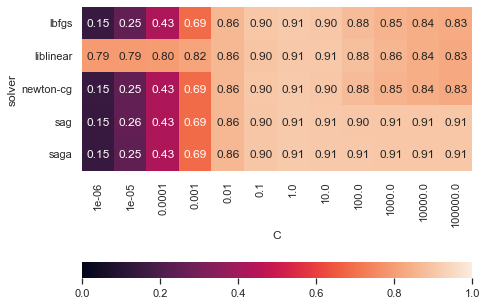

In [122]:
gs_std_cv_results = gs_std.cv_results_

gs_std_cv_results_new = {}
gs_std_cv_results_new["solver"] = gs_std_cv_results["param_logisticregression__solver"]
        
gs_std_cv_results_new["C"] = gs_std_cv_results["param_logisticregression__C"]
gs_std_cv_results_new["mean_test_score"] = gs_std_cv_results["mean_test_score"]

gs_std_cv_results_df = pd.DataFrame.from_dict(gs_std_cv_results_new)

gs_std_cv_results_df = gs_std_cv_results_df.pivot("solver", "C", "mean_test_score")
#print(gs_std_cv_results_df)

grid_kws = {"height_ratios": (1, .1), "hspace": 1}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(7, 5))
ax = sns.heatmap(gs_std_cv_results_df, vmin=0, vmax=1, annot=True, fmt=".2f", ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})

## Performance measures of Logistic Regression with Standard Scaled data

### Accuracy

In [123]:
start_test = time.time()
log_reg = LogisticRegression(max_iter=10000, multi_class='ovr', C=1.0, solver='sag') # using the optimal values from GridSearch and Pipelines
log_reg.fit(X_tr_scaled, y_tr)
log_reg.predict(X_test_scaled)
print('The test data set accuracy for C=1 and solver=sag is ', log_reg.score(X_test_scaled, y_test))
end_test = time.time()
print('Time taken to test the model = ', end_test - start_test, 'seconds')

The test data set accuracy for C=1 and solver=sag is  0.9117117117117117
Time taken to test the model =  9.304348945617676 seconds


### F1-score

In [124]:
y_pred_std = gs_std.predict(X_test)
print("The F1-score is ", f1_score(y_test, y_pred_std, average='weighted'))

The F1-score is  0.9265196938913427


### Plot ROC Curve

(555, 9)


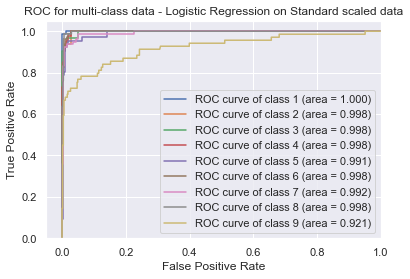

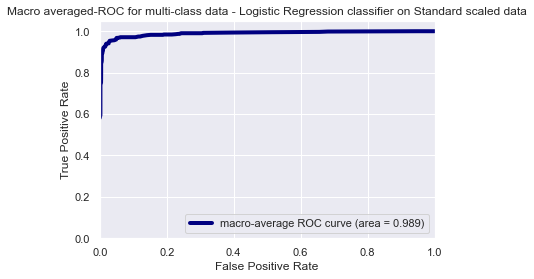

In [125]:
clf_lr = LogisticRegression(max_iter=10000, multi_class='ovr', C=1, solver='sag')
clf_lr.fit(X_tr_scaled, y_tr)
y_score_lr = clf_lr.predict_proba(X_test_scaled )

n_classes = y_score_lr.shape[1]

print(y_score_lr.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.3f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data - Logistic Regression on Standard scaled data')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score_lr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr2_std = fpr["macro"]
tpr2_std = tpr["macro"]
roc_auc2_std = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.3f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro averaged-ROC for multi-class data - Logistic Regression classifier on Standard scaled data")
plt.legend(loc="lower right")
plt.show()

### Area under ROC Curve (AUROC)
* Data preprocessed with Standard Scaler
* Hyperparameters tuned: C=1, solver=saga

In [126]:
gs_std_auc = roc_auc_score(y_test, gs_std.predict_proba(X_test), multi_class='ovr')
print("AUC for Logistic Regression with StdScaled data and C=1 and solver=saga: {:.3f}".format(gs_std_auc))

AUC for Logistic Regression with StdScaled data and C=1 and solver=saga: 0.988


## [Principle Component Analysis (PCA) on Standard Scaled Data](#zeroth-bullet) <a class="anchor" id="seventh2.1-bullet"></a>

PCA component shape: (64, 64)
Cumulative explained variance ratio  [0.04361574 0.08537547 0.12105647 0.15417725 0.18544577 0.21528478
 0.2440124  0.27259493 0.29978686 0.32550125 0.35080877 0.37497672
 0.39830457 0.42094267 0.44294986 0.46450267 0.4854765  0.5056787
 0.52524598 0.54433737 0.56318768 0.5814533  0.59941942 0.6171892
 0.63473947 0.65207893 0.6691324  0.68567334 0.7017931  0.71780616
 0.73334854 0.74868271 0.76379418 0.77858122 0.79283708 0.80639985
 0.81922981 0.83187441 0.844195   0.85642934 0.86842071 0.87997623
 0.89098631 0.90163901 0.91178602 0.92173541 0.9313133  0.94051112
 0.94932642 0.95791271 0.96629071 0.97405201 0.98124156 0.98823841
 0.99427137 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


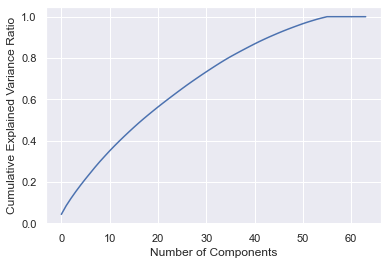

In [127]:
# Initializing the PCA transformer
pca_lr_std = PCA()

# Dimensionality Reduction
Xtr_pca_lr_std = pca_lr_std.fit_transform(X_tr_scaled)
Xtest_pca_lr_std = pca_lr_std.transform(X_test_scaled)

# Assessing the Principal components
print("PCA component shape: {}".format(pca_lr_std.components_.shape))

# Plotting Explained Variance Ratio graph
print("Cumulative explained variance ratio ", np.cumsum(pca_lr_std.explained_variance_ratio_))
plt.plot(np.cumsum(pca_lr_std.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [128]:
# Reducing the number of dimensions to 34 to correspond to 80% of variance explained
pca_lr_reduced1_std = PCA(n_components = 34)

# Dimensionality Reduction
Xtr_pca_lr_reduced1_std = pca_lr_reduced1_std.fit_transform(X_tr_scaled)
Xtest_pca_lr_reduced1_std = pca_lr_reduced1_std.transform(X_test_scaled)

# Fitting the Kernel-SVM model to the reduced dataset
lr_reduced1_std = log_reg.fit(Xtr_pca_lr_reduced1_std, y_tr)

# Predicting results on reduced test dataset
y_pred_lr_reduced1_std = log_reg.predict(Xtest_pca_lr_reduced1_std)

In [129]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset is ", lr_reduced1_std.score(Xtest_pca_lr_reduced1_std, y_test))

The average test accuracy on reduced dataset is  0.8702702702702703


In [130]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_lr_reduced1_std, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced1, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8676062013824848


In [131]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 34 dimensions using PCA

lr_auc = roc_auc_score(y_test, log_reg.predict_proba(Xtest_pca_lr_reduced1_std), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(lr_auc))

AUC for Kernel SVM: 0.978


In [132]:
# Reducing the number of dimensions to 45 to correspond to 90% of variance explained
pca_lr_reduced2_std = PCA(n_components = 45)

# Dimensionality Reduction
Xtr_pca_lr_reduced2_std = pca_lr_reduced2_std.fit_transform(X_tr_scaled)
Xtest_pca_lr_reduced2_std = pca_lr_reduced2_std.transform(X_test_scaled)

# Fitting the Kernel-SVM model to the reduced dataset
lr_reduced2_std = log_reg.fit(Xtr_pca_lr_reduced2_std, y_tr)

# Predicting results on reduced test dataset
y_pred_lr_reduced2_std = log_reg.predict(Xtest_pca_lr_reduced2_std)

In [133]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset 2 is ", lr_reduced2_std.score(Xtest_pca_lr_reduced2_std, y_test))

The average test accuracy on reduced dataset 2 is  0.8990990990990991


In [134]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_lr_reduced2_std, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced2, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8978763807018546


In [135]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 45 dimensions using PCA

lr_auc = roc_auc_score(y_test, log_reg.predict_proba(Xtest_pca_lr_reduced2_std), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(lr_auc))

AUC for Kernel SVM: 0.981


## [Logistic Regression classifier on mapped Standard Scaled Data using K-Means clustering](#zeroth-bullet) <a class="anchor" id="seventh2.2-bullet"></a>

In [136]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 100

log_reg.fit(X_tr_clust100_std, y_tr_clust100_std)
y_pred_clust100_std = log_reg.predict(X_test_clust100_std)
print("The average test accuracy is ", log_reg.score(X_test_clust100_std, y_test_clust100_std))

The average test accuracy is  0.9117117117117117


In [137]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust100_std, average='weighted'))
#print(classification_report(y_test, y_pred_clust100, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.9105099730780387


In [139]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 100 cluster distance dimension space

lr_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_clust100_std), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(lr_auc))

AUC for Kernel SVM: 0.989


In [140]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 200

log_reg.fit(X_tr_clust200_std, y_tr_clust200_std)
y_pred_clust200_std = log_reg.predict(X_test_clust200_std)
print("The average test accuracy is ", log_reg.score(X_test_clust200_std, y_test_clust200_std))

The average test accuracy is  0.9279279279279279


In [142]:
### F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust200_std, average='weighted'))
#print(classification_report(y_test, y_pred_clust200, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.9264295183459029


In [143]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 200 cluster distance dimension space

lr_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_clust200_std), multi_class='ovr')
print("AUC for Logistic Regression: {:.3f}".format(lr_auc))

AUC for Logistic Regression: 0.990


## [Pipelines and GridSearch - Logistic Regression with MinMax Scaled data](#zeroth-bullet) <a class="anchor" id="seventh3-bullet"></a>

In [144]:
pipe_lr = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=10000, multi_class='ovr')) 
param_range = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0] 
param_grid = [{'logisticregression__C': param_range, 
               'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
gs_mm = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='accuracy', cv=4, refit=True, verbose=4)
gs = gs_mm.fit(X_tr, y_tr) 
print("Best cross-validation accuracy: ", gs_mm.best_score_)
print("Best estimator is: ", gs_mm.best_estimator_)
print("Best parameters: ", gs_mm.best_params_)
print(classification_report(y_test, y_pred, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV 1/4] END logisticregression__C=1e-06, logisticregression__solver=newton-cg;, score=0.149 total time=   0.2s
[CV 2/4] END logisticregression__C=1e-06, logisticregression__solver=newton-cg;, score=0.149 total time=   0.1s
[CV 3/4] END logisticregression__C=1e-06, logisticregression__solver=newton-cg;, score=0.147 total time=   0.1s
[CV 4/4] END logisticregression__C=1e-06, logisticregression__solver=newton-cg;, score=0.149 total time=   0.1s
[CV 1/4] END logisticregression__C=1e-06, logisticregression__solver=lbfgs;, score=0.149 total time=   0.1s
[CV 2/4] END logisticregression__C=1e-06, logisticregression__solver=lbfgs;, score=0.149 total time=   0.1s
[CV 3/4] END logisticregression__C=1e-06, logisticregression__solver=lbfgs;, score=0.147 total time=   0.1s
[CV 4/4] END logisticregression__C=1e-06, logisticregression__solver=lbfgs;, score=0.149 total time=   0.1s
[CV 1/4] END logisticregression__C=1e-06, logisticregressi

[CV 1/4] END logisticregression__C=0.001, logisticregression__solver=saga;, score=0.285 total time=   0.1s
[CV 2/4] END logisticregression__C=0.001, logisticregression__solver=saga;, score=0.300 total time=   0.2s
[CV 3/4] END logisticregression__C=0.001, logisticregression__solver=saga;, score=0.291 total time=   0.1s
[CV 4/4] END logisticregression__C=0.001, logisticregression__solver=saga;, score=0.293 total time=   0.1s
[CV 1/4] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.501 total time=   0.2s
[CV 2/4] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.512 total time=   0.1s
[CV 3/4] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.454 total time=   0.1s
[CV 4/4] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.481 total time=   0.1s
[CV 1/4] END logisticregression__C=0.01, logisticregression__solver=lbfgs;, score=0.501 total time=   0.0s
[CV 2/4] END logistic

[CV 2/4] END logisticregression__C=10.0, logisticregression__solver=sag;, score=0.923 total time=   0.5s
[CV 3/4] END logisticregression__C=10.0, logisticregression__solver=sag;, score=0.877 total time=   0.3s
[CV 4/4] END logisticregression__C=10.0, logisticregression__solver=sag;, score=0.923 total time=   0.4s
[CV 1/4] END logisticregression__C=10.0, logisticregression__solver=saga;, score=0.906 total time=   0.7s
[CV 2/4] END logisticregression__C=10.0, logisticregression__solver=saga;, score=0.923 total time=   0.8s
[CV 3/4] END logisticregression__C=10.0, logisticregression__solver=saga;, score=0.877 total time=   0.7s
[CV 4/4] END logisticregression__C=10.0, logisticregression__solver=saga;, score=0.923 total time=   0.8s
[CV 1/4] END logisticregression__C=100.0, logisticregression__solver=newton-cg;, score=0.916 total time=   0.3s
[CV 2/4] END logisticregression__C=100.0, logisticregression__solver=newton-cg;, score=0.930 total time=   0.3s
[CV 3/4] END logisticregression__C=10

[CV 2/4] END logisticregression__C=100000.0, logisticregression__solver=liblinear;, score=0.885 total time=   0.1s
[CV 3/4] END logisticregression__C=100000.0, logisticregression__solver=liblinear;, score=0.810 total time=   0.1s
[CV 4/4] END logisticregression__C=100000.0, logisticregression__solver=liblinear;, score=0.863 total time=   0.2s
[CV 1/4] END logisticregression__C=100000.0, logisticregression__solver=sag;, score=0.871 total time=  24.4s
[CV 2/4] END logisticregression__C=100000.0, logisticregression__solver=sag;, score=0.906 total time=  25.0s
[CV 3/4] END logisticregression__C=100000.0, logisticregression__solver=sag;, score=0.837 total time=  25.1s
[CV 4/4] END logisticregression__C=100000.0, logisticregression__solver=sag;, score=0.885 total time=  27.8s
[CV 1/4] END logisticregression__C=100000.0, logisticregression__solver=saga;, score=0.892 total time=  25.2s
[CV 2/4] END logisticregression__C=100000.0, logisticregression__solver=saga;, score=0.913 total time=  27.2s

### Parameter Optimization - Heatmap

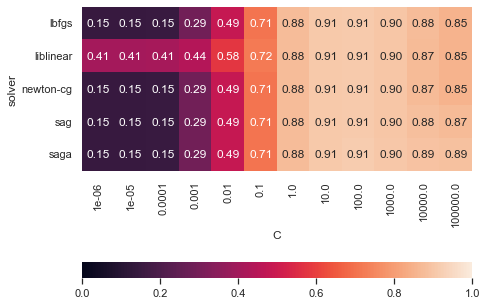

In [145]:
gs_mm_cv_results = gs_mm.cv_results_

gs_mm_cv_results_new = {}
gs_mm_cv_results_new["solver"] = gs_mm_cv_results["param_logisticregression__solver"]
        
gs_mm_cv_results_new["C"] = gs_mm_cv_results["param_logisticregression__C"]
gs_mm_cv_results_new["mean_test_score"] = gs_mm_cv_results["mean_test_score"]

gs_mm_cv_results_df = pd.DataFrame.from_dict(gs_mm_cv_results_new)

gs_mm_cv_results_df = gs_mm_cv_results_df.pivot("solver", "C", "mean_test_score")
#print(gs_std_cv_results_df)

grid_kws = {"height_ratios": (1, .1), "hspace": 1}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(7, 5))
ax = sns.heatmap(gs_mm_cv_results_df, vmin=0, vmax=1, annot=True, fmt=".2f", ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})

## Performance measures of Logistic Regression with MinMax Scaled data

### Accuracy

In [35]:
start_test = time.time()
log_reg = LogisticRegression(max_iter=10000, multi_class='ovr', C=100.0, solver='saga') # using the optimal values from GridSearch and Pipelines
log_reg.fit(X_tr_mmscaled, y_tr)
log_reg.predict(X_test_mmscaled)
print('The test data set accuracy for C=100 and solver=saga is ', log_reg.score(X_test_mmscaled, y_test))
end_test = time.time()
print('Time taken to test the model = ', end_test - start_test, 'seconds')

The test data set accuracy for C=100 and solver=saga is  0.9081081081081082
Time taken to test the model =  4.835391998291016 seconds


### F1-score

In [147]:
y_pred_std = gs_mm.predict(X_test)
print("The F1-score is ", f1_score(y_test, y_pred_std, average='weighted'))

The F1-score is  0.9227730222627138


### Plot ROC Curve

(555, 9)


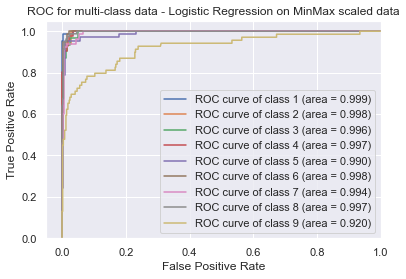

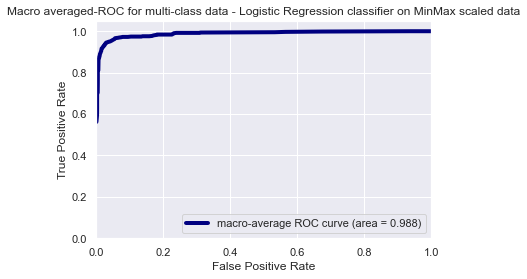

In [150]:
clf_lr = LogisticRegression(max_iter=10000, multi_class='ovr', C=100, solver='saga')
clf_lr.fit(X_tr_mmscaled, y_tr)
y_score_lr = clf_lr.predict_proba(X_test_mmscaled )

n_classes = y_score_lr.shape[1]

print(y_score_lr.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.3f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data - Logistic Regression on MinMax scaled data')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score_lr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr2_mm = fpr["macro"]
tpr2_mm = tpr["macro"]
roc_auc2_mm = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.3f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro averaged-ROC for multi-class data - Logistic Regression classifier on MinMax scaled data")
plt.legend(loc="lower right")
plt.show()

### Area under ROC Curve (AUROC)
* Data preprocessed with MinMax Scaler
* Hyperparameters tuned: C=100 and solver='newton-cg'

In [151]:
gs_mm_auc = roc_auc_score(y_test, gs_mm.predict_proba(X_test), multi_class='ovr')
print("AUC for Logistic Regression with MinMax Scaled data and C=100 and solver=newton-cg: {:.3f}".format(gs_mm_auc))

AUC for Logistic Regression with MinMax Scaled data and C=100 and solver=newton-cg: 0.988


## [Principle Component Analysis (PCA) on MinMax Scaled Data](#zeroth-bullet) <a class="anchor" id="seventh3.1-bullet"></a>

PCA component shape: (64, 64)
Cumulative explained variance ratio  [0.09100777 0.15732943 0.21358622 0.26488727 0.31069145 0.35159808
 0.39121968 0.42924236 0.46374919 0.4968984  0.52634189 0.5532711
 0.57952117 0.60492005 0.62735364 0.64934542 0.67009267 0.68923041
 0.70827499 0.72596033 0.74301191 0.75924386 0.77412371 0.78875875
 0.80238673 0.8155316  0.82805152 0.83958641 0.85066181 0.86136015
 0.87171697 0.88172101 0.89140909 0.90007847 0.90835576 0.91639942
 0.9239934  0.93137382 0.93851197 0.94553022 0.95217467 0.95840518
 0.96442475 0.96973138 0.97443707 0.97891302 0.98282515 0.98651939
 0.98974633 0.99269355 0.99554256 0.99674579 0.99775346 0.99875316
 0.99950389 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


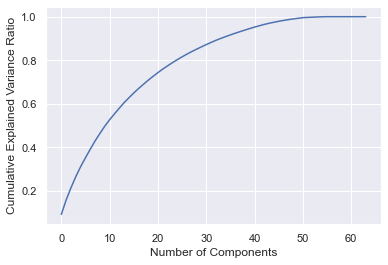

In [33]:
# Initializing the PCA transformer
pca_lr_mm = PCA()

# Dimensionality Reduction
Xtr_pca_lr_mm = pca_lr_mm.fit_transform(X_tr_mmscaled)
Xtest_pca_lr_mm = pca_lr_mm.transform(X_test_mmscaled)

# Assessing the Principal components
print("PCA component shape: {}".format(pca_lr_mm.components_.shape))

# Plotting Explained Variance Ratio graph
print("Cumulative explained variance ratio ", np.cumsum(pca_lr_mm.explained_variance_ratio_))
plt.plot(np.cumsum(pca_lr_mm.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [36]:
# Reducing the number of dimensions to 24 to correspond to 80% of variance explained
pca_lr_reduced1_mm = PCA(n_components = 24)

# Dimensionality Reduction
Xtr_pca_lr_reduced1_mm = pca_lr_reduced1_mm.fit_transform(X_tr_mmscaled)
Xtest_pca_lr_reduced1_mm = pca_lr_reduced1_mm.transform(X_test_mmscaled)

# Fitting the Kernel-SVM model to the reduced dataset
lr_reduced1_mm = log_reg.fit(Xtr_pca_lr_reduced1_mm, y_tr)

# Predicting results on reduced test dataset
y_pred_lr_reduced1_mm = log_reg.predict(Xtest_pca_lr_reduced1_mm)

In [154]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset is ", lr_reduced1_mm.score(Xtest_pca_lr_reduced1_mm, y_test))

The average test accuracy on reduced dataset is  0.8612612612612612


In [155]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_lr_reduced1_mm, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced1, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8539367014961987


In [156]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 34 dimensions using PCA

lr_auc = roc_auc_score(y_test, log_reg.predict_proba(Xtest_pca_lr_reduced1_mm), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(lr_auc))

AUC for Kernel SVM: 0.978


In [157]:
# Reducing the number of dimensions to 35 to correspond to 90% of variance explained
pca_lr_reduced2_mm = PCA(n_components = 35)

# Dimensionality Reduction
Xtr_pca_lr_reduced2_mm = pca_lr_reduced2_mm.fit_transform(X_tr_mmscaled)
Xtest_pca_lr_reduced2_mm = pca_lr_reduced2_mm.transform(X_test_mmscaled)

# Fitting the Kernel-SVM model to the reduced dataset
lr_reduced2_mm = log_reg.fit(Xtr_pca_lr_reduced2_mm, y_tr)

# Predicting results on reduced test dataset
y_pred_lr_reduced2_mm = log_reg.predict(Xtest_pca_lr_reduced2_mm)

In [158]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset 2 is ", lr_reduced2_mm.score(Xtest_pca_lr_reduced2_mm, y_test))

The average test accuracy on reduced dataset 2 is  0.8918918918918919


In [159]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_lr_reduced2_mm, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced2, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8889020469951204


In [160]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 45 dimensions using PCA

lr_auc = roc_auc_score(y_test, log_reg.predict_proba(Xtest_pca_lr_reduced2_mm), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(lr_auc))

AUC for Kernel SVM: 0.985


## [Logistic Regression classifier on mapped MinMax Scaled Data using K-Means clustering](#zeroth-bullet) <a class="anchor" id="seventh3.2-bullet"></a>

In [161]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 100

log_reg.fit(X_tr_clust100_mm, y_tr_clust100_mm)
y_pred_clust100_mm = log_reg.predict(X_test_clust100_mm)
print("The average test accuracy is ", log_reg.score(X_test_clust100_mm, y_test_clust100_mm))

The average test accuracy is  0.9405405405405406


In [162]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust100_mm, average='weighted'))
#print(classification_report(y_test, y_pred_clust100, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.9397197719036865


In [163]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 100 cluster distance dimension space

lr_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_clust100_mm), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(lr_auc))

AUC for Kernel SVM: 0.994


In [164]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 200

log_reg.fit(X_tr_clust200_mm, y_tr_clust200_mm)
y_pred_clust200_mm = log_reg.predict(X_test_clust200_mm)
print("The average test accuracy is ", log_reg.score(X_test_clust200_mm, y_test_clust200_mm))

The average test accuracy is  0.9387387387387387


In [165]:
### F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust200_mm, average='weighted'))
#print(classification_report(y_test, y_pred_clust200, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.9375912521832654


In [166]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 200 cluster distance dimension space

lr_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_clust200_mm), multi_class='ovr')
print("AUC for Logistic Regression: {:.3f}".format(lr_auc))

AUC for Logistic Regression: 0.994


# [Random Forest Classifier](#zeroth-bullet) <a class="anchor" id="eighth-bullet"></a>

## [Evaluating the classifier on original data](#zeroth-bullet) <a class="anchor" id="eighth1-bullet"></a>

* without preprocessing
* using default parameters for the classifier
* no GridSearch and 4-fold cross-validation

In [167]:
start = time.time()
rf_tree = RandomForestClassifier(class_weight='balanced')
rf_tree.fit(X_tr, y_tr)
y_pred = rf_tree.predict(X_test)
end = time.time()
print("Time taken to run Random Forest classifier on original data is ", end-start, "seconds")

Time taken to run Random Forest classifier on original data is  0.4535388946533203 seconds


### Accuracy

In [168]:
print("The average test accuracy is ", rf_tree.score(X_test, y_test))

The average test accuracy is  0.8612612612612612


### F1-score and classification report

In [169]:
print("The F1-score is ", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score is  0.8592457477623855
                       precision    recall  f1-score   support

Pierre-Auguste_Renoir       0.92      0.96      0.94        81
              Raphael       1.00      0.76      0.86        33
    Leonardo_da_Vinci       0.82      0.74      0.78        31
    Sandro_Botticelli       0.85      0.80      0.83        41
       Francisco_Goya       0.85      0.91      0.88        66
     Vincent_van_Gogh       0.92      0.87      0.89        76
        Pablo_Picasso       0.91      0.91      0.91        78
       Albrecht_Durer       0.83      0.97      0.90        80
               Others       0.70      0.64      0.67        69

             accuracy                           0.86       555
            macro avg       0.87      0.84      0.85       555
         weighted avg       0.86      0.86      0.86       555



### Plot ROC Curve

(555, 9)


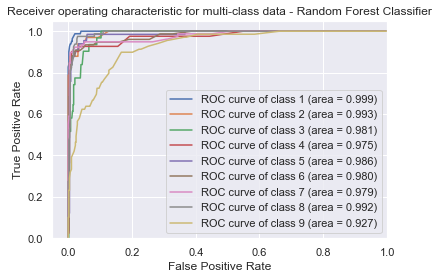

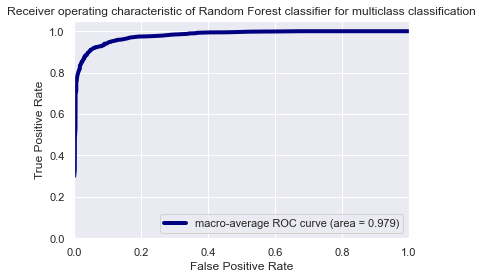

In [170]:
clf_rf = RandomForestClassifier(class_weight='balanced')
clf_rf.fit(X_tr, y_tr)
y_score_rf = clf_rf.predict_proba(X_test)

n_classes = y_score_rf.shape[1]

print(y_score_rf.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.3f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score_rf.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr3 = fpr["macro"]
tpr3 = tpr["macro"]
roc_auc3 = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.3f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic of Random Forest classifier for multiclass classification")
plt.legend(loc="lower right")
plt.show()

### Area under ROC Curve (AUROC)
* Original data (no preprocessing)

In [171]:
rf_auc = roc_auc_score(y_test, rf_tree.predict_proba(X_test), multi_class='ovr')
print("AUC for Random Forest Classifier: {:.3f}".format(rf_auc))

AUC for Random Forest Classifier: 0.979


## [Pipelines and GridSearch - Random Forest with original data](#zeroth-bullet) <a class="anchor" id="eighth2-bullet"></a>
### No preprocessing was performed for Random Forest, since it is insensitive to data normalization

In [172]:
pipe_rf = make_pipeline(RandomForestClassifier()) # Random Forest is not sensitive to data normalization
param_range = [50,75,100,125,150,175,200]
depth_range = [2,3,4,5]
param_grid = [{'randomforestclassifier__n_estimators': param_range, 'randomforestclassifier__max_depth': depth_range}]
gs = GridSearchCV(estimator=pipe_rf, param_grid=param_grid, scoring='accuracy', cv=4, refit=True, verbose=4)
gs = gs.fit(X_tr, y_tr)  # Fit the entire train dataset after cross-validation
print()
print("Best cross-validation accuracy: ", gs.best_score_)
print("Best estimator is: ", gs.best_estimator_)
print("Best parameters: ", gs.best_params_)
print(classification_report(y_test, y_pred, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

Fitting 4 folds for each of 28 candidates, totalling 112 fits
[CV 1/4] END randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=50;, score=0.580 total time=   0.1s
[CV 2/4] END randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=50;, score=0.582 total time=   0.1s
[CV 3/4] END randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=50;, score=0.512 total time=   0.1s
[CV 4/4] END randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=50;, score=0.579 total time=   0.1s
[CV 1/4] END randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=75;, score=0.588 total time=   0.1s
[CV 2/4] END randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=75;, score=0.558 total time=   0.1s
[CV 3/4] END randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=75;, score=0.546 total time=   0.2s
[CV 4/4] END randomforestclassifier__max_depth=2, randomforestclassifier__n_e

[CV 3/4] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=100;, score=0.644 total time=   0.2s
[CV 4/4] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=100;, score=0.688 total time=   0.2s
[CV 1/4] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=125;, score=0.729 total time=   0.2s
[CV 2/4] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=125;, score=0.673 total time=   0.3s
[CV 3/4] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=125;, score=0.644 total time=   0.3s
[CV 4/4] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=125;, score=0.680 total time=   0.3s
[CV 1/4] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=150;, score=0.727 total time=   0.3s
[CV 2/4] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=150;, score=0.702 total time=   0.3s
[CV 3/4]

### Parameter Optimization - Heatmap

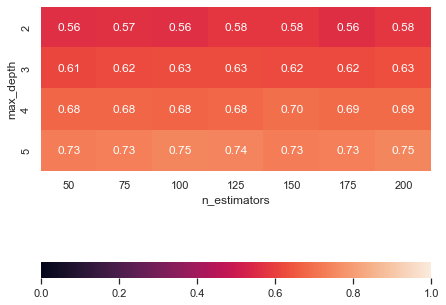

In [173]:
gs_cv_results = gs.cv_results_

gs_cv_results_new = {}
gs_cv_results_new["max_depth"] = gs_cv_results["param_randomforestclassifier__max_depth"]
        
gs_cv_results_new["n_estimators"] = gs_cv_results["param_randomforestclassifier__n_estimators"]
gs_cv_results_new["mean_test_score"] = gs_cv_results["mean_test_score"]

gs_cv_results_df = pd.DataFrame.from_dict(gs_cv_results_new)

gs_cv_results_df = gs_cv_results_df.pivot("max_depth", "n_estimators", "mean_test_score")
#print(gs_std_cv_results_df)

grid_kws = {"height_ratios": (1, .1), "hspace": 1}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(7, 5))
ax = sns.heatmap(gs_cv_results_df, vmin=0, vmax=1, annot=True, fmt=".2f", ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})

## Performance measures of Random Forest with Original data and optimal hyperparameter values

### Accuracy

In [43]:
start_test = time.time()
rf_tree = RandomForestClassifier(max_depth=5, n_estimators=100) # using the optimal values from GridSearch and Pipelines
rf_tree.fit(X_tr, y_tr)
rf_tree.predict(X_test)
print('The test data set accuracy for max_depth=5 and n_estimators=100 is ', rf_tree.score(X_test, y_test))
end_test = time.time()
print('Time taken to test the model = ', end_test - start_test, 'seconds')

The test data set accuracy for max_depth=5 and n_estimators=100 is  0.7603603603603604
Time taken to test the model =  0.3170328140258789 seconds


### F1-score

In [175]:
y_pred_gs = gs.predict(X_test)
print("The F1-score is ", f1_score(y_test, y_pred_gs, average='weighted'))

The F1-score is  0.7464005821702373


### Plot ROC Curve

(555, 9)


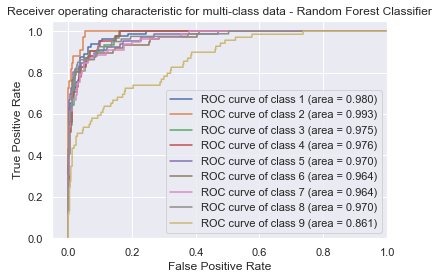

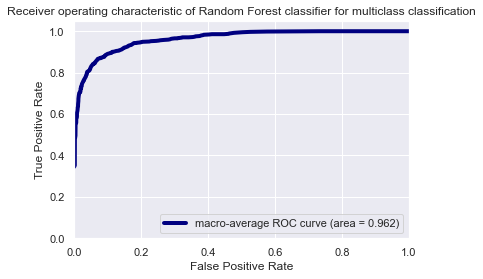

In [176]:
clf_rf = RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=150)
clf_rf.fit(X_tr, y_tr)
y_score_rf = clf_rf.predict_proba(X_test)

n_classes = y_score_rf.shape[1]

print(y_score_rf.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.3f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score_rf.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr3_opt = fpr["macro"]
tpr3_opt = tpr["macro"]
roc_auc3_opt = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.3f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic of Random Forest classifier for multiclass classification")
plt.legend(loc="lower right")
plt.show()

### Area under ROC Curve (AUROC)
* Original data (no preprocessing) - RF is insensitive to preprocessing
* Hyperparameters tuned: max_depth = 5 and n_estimators = 150

In [177]:
gs_auc = roc_auc_score(y_test, gs.predict_proba(X_test), multi_class='ovr')
print("AUC for Random Forest with Original Data and max_depth=5 and n_estimators=200: {:.3f}".format(gs_auc))

AUC for Random Forest with Original Data and max_depth=5 and n_estimators=200: 0.960


## [Principle Component Analysis (PCA) on Original Data](#zeroth-bullet) <a class="anchor" id="eighth2.1-bullet"></a>

PCA component shape: (64, 64)
Cumulative explained variance ratio  [0.16145397 0.30506004 0.38055826 0.44456773 0.49526939 0.54154848
 0.58483048 0.62313724 0.65749001 0.69071953 0.71592688 0.73955722
 0.76258984 0.78543201 0.8069315  0.82699799 0.84452346 0.86004871
 0.87309588 0.88549563 0.89700082 0.90703917 0.91651096 0.92509267
 0.93272162 0.93983388 0.94626972 0.9524665  0.95756323 0.96253662
 0.96675975 0.97056984 0.97422849 0.97761555 0.98076611 0.98381562
 0.98667961 0.98890457 0.99083324 0.99249571 0.99397774 0.99528858
 0.99655911 0.99771496 0.99850563 0.99902752 0.99932562 0.99956433
 0.99971467 0.9998426  0.99993505 0.99997251 0.99998454 0.99999297
 0.99999855 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


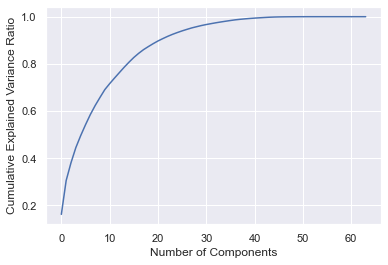

In [41]:
# Initializing the PCA transformer
pca_rf = PCA()

# Dimensionality Reduction
X_tr_pca_rf = pca_rf.fit_transform(X_tr)
X_test_pca_rf = pca_rf.transform(X_test)

# Assessing the Principal components
print("PCA component shape: {}".format(pca_rf.components_.shape))

# Plotting Explained Variance Ratio graph
print("Cumulative explained variance ratio ", np.cumsum(pca_rf.explained_variance_ratio_))
plt.plot(np.cumsum(pca_rf.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

From the `Cumulative Explained Variance Ratio graph`, we see that 80% of the variance is explained using 14 features. Therefore, we can try applying PCA to the dataset to reduce the dimensions to 14 features and then assessing the performance of the classifier

In [44]:
# Reducing the number of dimensions to 14 to correspond to 80% of variance explained
pca_rf_reduced1 = PCA(n_components = 14)

# Dimensionality Reduction
Xtr_pca_rf_reduced1 = pca_rf_reduced1.fit_transform(X_tr)
Xtest_pca_rf_reduced1 = pca_rf_reduced1.transform(X_test)

# Fitting the Kernel-SVM model to the reduced dataset
rf_reduced1 = rf_tree.fit(Xtr_pca_rf_reduced1, y_tr)

# Predicting results on reduced test dataset
y_pred_rf_reduced1 = rf_tree.predict(Xtest_pca_rf_reduced1)

In [180]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset is ", rf_reduced1.score(Xtest_pca_rf_reduced1, y_test))

The average test accuracy on reduced dataset is  0.6882882882882883


In [181]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_rf_reduced1, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced1, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.6770726780856882


In [182]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 34 dimensions using PCA

rf_auc = roc_auc_score(y_test, rf_tree.predict_proba(Xtest_pca_rf_reduced1), multi_class='ovr')
print("AUC for Random Forest: {:.3f}".format(rf_auc))

AUC for Random Forest: 0.950


In [183]:
# Reducing the number of dimensions to 20 to correspond to 90% of variance explained
pca_rf_reduced2 = PCA(n_components = 20)

# Dimensionality Reduction
Xtr_pca_rf_reduced2 = pca_rf_reduced2.fit_transform(X_tr)
Xtest_pca_rf_reduced2 = pca_rf_reduced2.transform(X_test)

# Fitting the Kernel-SVM model to the reduced dataset
rf_reduced2 = rf_tree.fit(Xtr_pca_rf_reduced2, y_tr)

# Predicting results on reduced test dataset
y_pred_rf_reduced2 = rf_tree.predict(Xtest_pca_rf_reduced2)

In [184]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset 2 is ", rf_reduced2.score(Xtest_pca_rf_reduced2, y_test))

The average test accuracy on reduced dataset 2 is  0.7099099099099099


In [185]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_rf_reduced2, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced2, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.695756619138321


In [186]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 45 dimensions using PCA

k_rf_auc = roc_auc_score(y_test, rf_tree.predict_proba(Xtest_pca_rf_reduced2), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(k_rf_auc))

AUC for Kernel SVM: 0.959


## [Random Forest classifier on mapped Original Data using K-Means clustering](#zeroth-bullet) <a class="anchor" id="eighth2.2-bullet"></a>

In [187]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 100

rf_tree.fit(X_tr_clust100, y_tr_clust100)
y_pred_clust100_rf = rf_tree.predict(X_test_clust100)
print("The average test accuracy is ", rf_tree.score(X_test_clust100, y_test_clust100))

The average test accuracy is  0.6432432432432432


In [188]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust100_rf, average='weighted'))
#print(classification_report(y_test, y_pred_clust100, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.644771930854992


In [189]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 100 cluster distance dimension space

rf_auc = roc_auc_score(y_test, rf_tree.predict_proba(X_test_clust100), multi_class='ovr')
print("AUC for Logistic Regression: {:.3f}".format(rf_auc))

AUC for Logistic Regression: 0.927


In [190]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 200

rf_tree.fit(X_tr_clust200, y_tr_clust200)
y_pred_clust200_rf = rf_tree.predict(X_test_clust200)
print("The average test accuracy is ", rf_tree.score(X_test_clust200, y_test_clust200))

The average test accuracy is  0.6486486486486487


In [191]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust200_rf, average='weighted'))
#print(classification_report(y_test, y_pred_clust200, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.6441839107342476


In [192]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 200 cluster distance dimension space

rf_auc = roc_auc_score(y_test, rf_tree.predict_proba(X_test_clust200), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(rf_auc))

AUC for Kernel SVM: 0.931


# [Multi-layered Perceptron (Neural Network)](#zeroth-bullet) <a class="anchor" id="ninth-bullet"></a>

## [Evaluating the classifier on original data](#zeroth-bullet) <a class="anchor" id="ninth1-bullet"></a>
* without preprocessing
* using default parameters for the classifier
* no GridSearch and 4-fold cross-validation

In [200]:
start = time.time()
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_tr, y_tr)
y_pred = mlp.predict(X_test)
end = time.time()
print("Time taken to run Random Forest classifier on original data is ", end-start, "seconds")

Time taken to run Random Forest classifier on original data is  3.5735528469085693 seconds


### Accuracy

In [201]:
print("The average test accuracy is ", mlp.score(X_test, y_test))

The average test accuracy is  0.9333333333333333


### F1-score and classification report

In [202]:
print("The F1-score is ", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score is  0.9329019275773268
                       precision    recall  f1-score   support

Pierre-Auguste_Renoir       0.98      0.99      0.98        81
              Raphael       1.00      0.91      0.95        33
    Leonardo_da_Vinci       0.84      0.87      0.86        31
    Sandro_Botticelli       0.86      0.88      0.87        41
       Francisco_Goya       0.94      0.97      0.96        66
     Vincent_van_Gogh       0.95      0.96      0.95        76
        Pablo_Picasso       0.96      0.94      0.95        78
       Albrecht_Durer       0.96      1.00      0.98        80
               Others       0.85      0.80      0.82        69

             accuracy                           0.93       555
            macro avg       0.93      0.92      0.92       555
         weighted avg       0.93      0.93      0.93       555



### Plot ROC Curve

(555, 9)


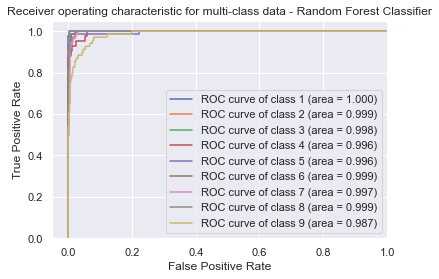

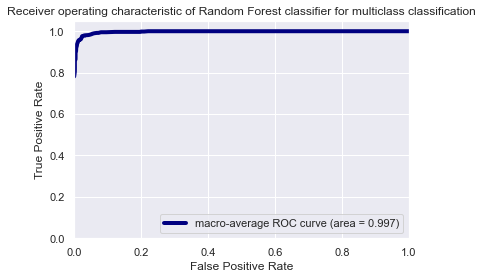

In [203]:
clf_mlp = MLPClassifier(max_iter=300)
clf_mlp.fit(X_tr, y_tr)
y_score_mlp = clf_mlp.predict_proba(X_test)

n_classes = y_score_mlp.shape[1]

print(y_score_mlp.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score_mlp[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.3f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score_mlp.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr4 = fpr["macro"]
tpr4 = tpr["macro"]
roc_auc4 = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.3f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic of Random Forest classifier for multiclass classification")
plt.legend(loc="lower right")
plt.show()

### Area under ROC Curve
* Original data (no preprocessing)

In [204]:
mlp_auc = roc_auc_score(y_test, mlp.predict_proba(X_test), multi_class='ovr')
print("AUC for Multi-layered Perceptron (Neural Network): {:.3f}".format(mlp_auc))

AUC for Multi-layered Perceptron (Neural Network): 0.997


## [Principle Component Analysis (PCA) on Original Data](#zeroth-bullet) <a class="anchor" id="ninth1.1-bullet"></a>

PCA component shape: (64, 64)
Cumulative explained variance ratio  [0.16145397 0.30506004 0.38055826 0.44456773 0.49526939 0.54154848
 0.58483048 0.62313724 0.65749001 0.69071953 0.71592688 0.73955722
 0.76258984 0.78543201 0.8069315  0.82699799 0.84452346 0.86004871
 0.87309588 0.88549563 0.89700082 0.90703917 0.91651096 0.92509267
 0.93272162 0.93983388 0.94626972 0.9524665  0.95756323 0.96253662
 0.96675975 0.97056984 0.97422849 0.97761555 0.98076611 0.98381562
 0.98667961 0.98890457 0.99083324 0.99249571 0.99397774 0.99528858
 0.99655911 0.99771496 0.99850563 0.99902752 0.99932562 0.99956433
 0.99971467 0.9998426  0.99993505 0.99997251 0.99998454 0.99999297
 0.99999855 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


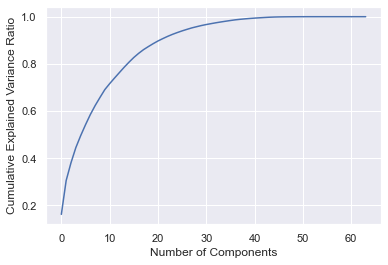

In [198]:
# Initializing the PCA transformer
pca_mlp = PCA()

# Dimensionality Reduction
X_tr_pca_mlp = pca_mlp.fit_transform(X_tr)
X_test_pca_mlp = pca_mlp.transform(X_test)

# Assessing the Principal components
print("PCA component shape: {}".format(pca_mlp.components_.shape))

# Plotting Explained Variance Ratio graph
print("Cumulative explained variance ratio ", np.cumsum(pca_mlp.explained_variance_ratio_))
plt.plot(np.cumsum(pca_mlp.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

From the `Cumulative Explained Variance Ratio graph`, we see that 80% of the variance is explained using 14 features. Therefore, we can try applying PCA to the dataset to reduce the dimensions to 14 features and then assessing the performance of the classifier

In [205]:
# Reducing the number of dimensions to 14 to correspond to 80% of variance explained
pca_mlp_reduced1 = PCA(n_components = 14)

# Dimensionality Reduction
Xtr_pca_mlp_reduced1 = pca_mlp_reduced1.fit_transform(X_tr)
Xtest_pca_mlp_reduced1 = pca_mlp_reduced1.transform(X_test)

# Fitting the Kernel-SVM model to the reduced dataset
mlp_reduced1 = mlp.fit(Xtr_pca_mlp_reduced1, y_tr)

# Predicting results on reduced test dataset
y_pred_mlp_reduced1 = mlp.predict(Xtest_pca_mlp_reduced1)

In [207]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset is ", mlp_reduced1.score(Xtest_pca_mlp_reduced1, y_test))

The average test accuracy on reduced dataset is  0.809009009009009


In [208]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_mlp_reduced1, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced1, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8091248376595676


In [209]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 34 dimensions using PCA

mlp_auc = roc_auc_score(y_test, mlp.predict_proba(Xtest_pca_mlp_reduced1), multi_class='ovr')
print("AUC for Logistic Regression: {:.3f}".format(mlp_auc))

AUC for Logistic Regression: 0.981


In [210]:
# Reducing the number of dimensions to 20 to correspond to 90% of variance explained
pca_mlp_reduced2 = PCA(n_components = 20)

# Dimensionality Reduction
Xtr_pca_mlp_reduced2 = pca_mlp_reduced2.fit_transform(X_tr)
Xtest_pca_mlp_reduced2 = pca_mlp_reduced2.transform(X_test)

# Fitting the Kernel-SVM model to the reduced dataset
mlp_reduced2 = mlp.fit(Xtr_pca_mlp_reduced2, y_tr)

# Predicting results on reduced test dataset
y_pred_mlp_reduced2 = mlp.predict(Xtest_pca_mlp_reduced2)

In [211]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset 2 is ", mlp_reduced2.score(Xtest_pca_mlp_reduced2, y_test))

The average test accuracy on reduced dataset 2 is  0.863063063063063


In [212]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_mlp_reduced2, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced2, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8639070441675151


In [213]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 45 dimensions using PCA

k_mlp_auc = roc_auc_score(y_test, mlp.predict_proba(Xtest_pca_mlp_reduced2), multi_class='ovr')
print("AUC for Multi-layered Perceptron: {:.3f}".format(k_mlp_auc))

AUC for Multi-layered Perceptron: 0.986


## [MLP classifier on mapped Original Data using K-Means clustering](#zeroth-bullet) <a class="anchor" id="ninth1.2-bullet"></a>

In [214]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 100

mlp.fit(X_tr_clust100, y_tr_clust100)
y_pred_clust100_mlp = mlp.predict(X_test_clust100)
print("The average test accuracy is ", mlp.score(X_test_clust100, y_test_clust100))

The average test accuracy is  0.7585585585585586


In [215]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust100_mlp, average='weighted'))
#print(classification_report(y_test, y_pred_clust100, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.7591139791327443


In [216]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 100 cluster distance dimension space

mlp_auc = roc_auc_score(y_test, mlp.predict_proba(X_test_clust100), multi_class='ovr')
print("AUC for Logistic Regression: {:.3f}".format(mlp_auc))

AUC for Logistic Regression: 0.970


In [217]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 200

mlp.fit(X_tr_clust200, y_tr_clust200)
y_pred_clust200_mlp = mlp.predict(X_test_clust200)
print("The average test accuracy is ", mlp.score(X_test_clust200, y_test_clust200))

The average test accuracy is  0.6954954954954955


In [218]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust200_mlp, average='weighted'))
#print(classification_report(y_test, y_pred_clust200, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.6933431968485235


In [219]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 200 cluster distance dimension space

mlp_auc = roc_auc_score(y_test, mlp.predict_proba(X_test_clust200), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(mlp_auc))

AUC for Kernel SVM: 0.972


## [Pipelines and GridSearch - Multi-layered Perceptron with Standard Scaled data](#zeroth-bullet) <a class="anchor" id="ninth2-bullet"></a>

In [220]:
pipe_mlp = make_pipeline(StandardScaler(), MLPClassifier(max_iter=10000)) 
param_range = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0] 
mlp_layers = [(10,10), (50,50), (100,100)]
activation_func = ['logistic', 'tanh', 'relu']
param_grid = [{'mlpclassifier__alpha': param_range, 'mlpclassifier__hidden_layer_sizes': mlp_layers, 'mlpclassifier__activation': activation_func}]
gs_std = GridSearchCV(estimator=pipe_mlp, param_grid=param_grid, scoring='accuracy', cv=4, refit=True, verbose=4)
gs = gs_std.fit(X_tr, y_tr)  # Fit the entire train dataset after cross-validation
print()
print("Best cross-validation accuracy: ", gs_std.best_score_)
print("Best estimator is: ", gs_std.best_estimator_)
print("Best parameters: ", gs_std.best_params_)
print(classification_report(y_test, y_pred, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

Fitting 4 folds for each of 81 candidates, totalling 324 fits
[CV 1/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.849 total time=   6.6s
[CV 2/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.820 total time=   7.1s
[CV 3/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.810 total time=   6.8s
[CV 4/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.839 total time=   7.1s
[CV 1/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.914 total time=   6.6s
[CV 2/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.897 total time=   7.1s
[CV 3/4] END mlpclas

[CV 2/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.901 total time=   7.4s
[CV 3/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.921 total time=   7.1s
[CV 4/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.906 total time=   6.5s
[CV 1/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.906 total time=   8.0s
[CV 2/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.906 total time=   7.0s
[CV 3/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.906 total time=   9.6s
[CV 4/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpcla

[CV 4/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.873 total time=   5.3s
[CV 1/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.871 total time=   3.2s
[CV 2/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.858 total time=   2.8s
[CV 3/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.841 total time=   3.5s
[CV 4/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.834 total time=   3.7s
[CV 1/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.899 total time=   2.9s
[CV 2/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_s

[CV 3/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.892 total time=   3.1s
[CV 4/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.897 total time=   3.0s
[CV 1/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.914 total time=   3.6s
[CV 2/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.909 total time=   3.6s
[CV 3/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.909 total time=   3.0s
[CV 4/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.906 total time=   3.6s
[CV 1/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_size

[CV 3/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.873 total time=   4.0s
[CV 4/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.844 total time=   3.8s
[CV 1/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.918 total time=   3.8s
[CV 2/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.897 total time=   3.5s
[CV 3/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.911 total time=   3.6s
[CV 4/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.911 total time=   3.1s
[CV 1/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes

[CV 2/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.906 total time=   2.3s
[CV 3/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.923 total time=   2.3s
[CV 4/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.911 total time=   2.5s
[CV 1/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.885 total time=   2.6s
[CV 2/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.885 total time=   2.6s
[CV 3/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.853 total time=   3.8s
[CV 4/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=

### Visualization of parameter optimization - Heatmap

In [222]:
gs_std_cv_results = gs_std.cv_results_

gs_std_cv_results_new = {}
gs_std_cv_results_new["alpha"] = gs_std_cv_results["param_mlpclassifier__alpha"]
        
gs_std_cv_results_new["activation"] = gs_std_cv_results["param_mlpclassifier__activation"]
gs_std_cv_results_new["mean_test_score"] = gs_std_cv_results["mean_test_score"]

gs_std_cv_results_df = pd.DataFrame.from_dict(gs_std_cv_results_new)

gs_std_cv_results_df = gs_std_cv_results_df.pivot("alpha", "activation", "mean_test_score")
#print(gs_std_cv_results_df)

grid_kws = {"height_ratios": (1, .1), "hspace": 1}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(7, 5))
ax = sns.heatmap(gs_std_cv_results_df, vmin=0, vmax=1, annot=True, fmt=".2f", ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})

ValueError: Index contains duplicate entries, cannot reshape

## Performance measures of Multi-layered Perceptron with Standard Scaled data

### Accuracy

In [223]:
start_test = time.time()
mlp = MLPClassifier(max_iter=2000, activation='relu', alpha=1.0, hidden_layer_sizes=(100,100)) # using the optimal values from GridSearch and Pipelines
mlp.fit(X_tr_scaled, y_tr)
mlp.predict(X_test_scaled)
print('The test data set accuracy for alpha=1, activation=relu and hidden_layer_sizes=(100,100) is ', mlp.score(X_test_scaled, y_test))
end_test = time.time()
print('Time taken to test the model = ', end_test - start_test, 'seconds')

The test data set accuracy for alpha=1, activation=relu and hidden_layer_sizes=(100,100) is  0.9477477477477477
Time taken to test the model =  4.293292045593262 seconds


### F1-score

In [224]:
y_pred_std = gs_std.predict(X_test)
print("The F1-score is ", f1_score(y_test, y_pred_std, average='weighted'))

The F1-score is  0.9469768191485013


### Plot ROC Curve

(555, 9)


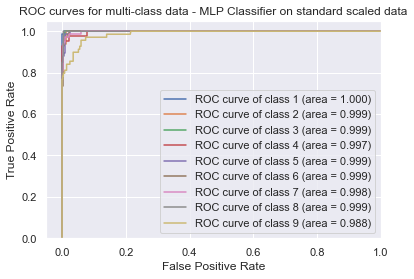

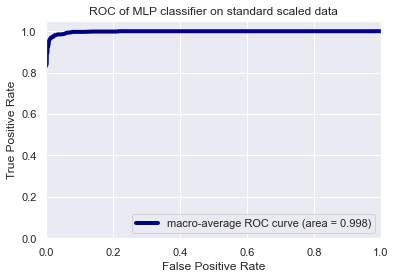

In [225]:
clf_mlp = MLPClassifier(max_iter=1000, activation='relu', alpha=1.0, hidden_layer_sizes=(100,100))
clf_mlp.fit(X_tr_scaled, y_tr)
y_score_mlp = clf_mlp.predict_proba(X_test_scaled)

n_classes = y_score_mlp.shape[1]

print(y_score_mlp.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score_mlp[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.3f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data - MLP Classifier on standard scaled data')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score_mlp.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr4_std = fpr["macro"]
tpr4_std = tpr["macro"]
roc_auc4_std = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.3f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of MLP classifier on standard scaled data")
plt.legend(loc="lower right")
plt.show()

### Area under ROC Curve
* Data preprocessed with Standard Scaler
* Hyperparameters tuned: alpha = 1, activation = relu and hidden_layer_sizes = (100,100)

In [226]:
gs_std_auc = roc_auc_score(y_test, gs_std.predict_proba(X_test), multi_class='ovr')
print("AUC for Multi-layered Perceptron with StdScaled data and alpha=1 and activation=relu and hidden_layer_sizes=(100,100): {:.3f}".format(gs_std_auc))

AUC for Multi-layered Perceptron with StdScaled data and alpha=1 and activation=relu and hidden_layer_sizes=(100,100): 0.997


## [Principle Component Analysis (PCA) on Standard Scaled Data](#zeroth-bullet) <a class="anchor" id="ninth2.1-bullet"></a>

PCA component shape: (64, 64)
Cumulative explained variance ratio  [0.04361574 0.08537547 0.12105647 0.15417725 0.18544577 0.21528478
 0.2440124  0.27259493 0.29978686 0.32550125 0.35080877 0.37497672
 0.39830457 0.42094267 0.44294986 0.46450267 0.4854765  0.5056787
 0.52524598 0.54433737 0.56318768 0.5814533  0.59941942 0.6171892
 0.63473947 0.65207893 0.6691324  0.68567334 0.7017931  0.71780616
 0.73334854 0.74868271 0.76379418 0.77858122 0.79283708 0.80639985
 0.81922981 0.83187441 0.844195   0.85642934 0.86842071 0.87997623
 0.89098631 0.90163901 0.91178602 0.92173541 0.9313133  0.94051112
 0.94932642 0.95791271 0.96629071 0.97405201 0.98124156 0.98823841
 0.99427137 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


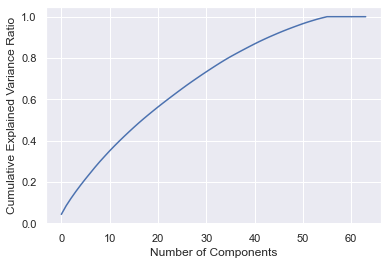

In [227]:
# Initializing the PCA transformer
pca_mlp_std = PCA()

# Dimensionality Reduction
Xtr_pca_mlp_std = pca_mlp_std.fit_transform(X_tr_scaled)
Xtest_pca_mlp_std = pca_mlp_std.transform(X_test_scaled)

# Assessing the Principal components
print("PCA component shape: {}".format(pca_mlp_std.components_.shape))

# Plotting Explained Variance Ratio graph
print("Cumulative explained variance ratio ", np.cumsum(pca_mlp_std.explained_variance_ratio_))
plt.plot(np.cumsum(pca_mlp_std.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [228]:
# Reducing the number of dimensions to 34 to correspond to 80% of variance explained
pca_mlp_reduced1_std = PCA(n_components = 34)

# Dimensionality Reduction
Xtr_pca_mlp_reduced1_std = pca_mlp_reduced1_std.fit_transform(X_tr_scaled)
Xtest_pca_mlp_reduced1_std = pca_mlp_reduced1_std.transform(X_test_scaled)

# Fitting the Kernel-SVM model to the reduced dataset
mlp_reduced1_std = mlp.fit(Xtr_pca_mlp_reduced1_std, y_tr)

# Predicting results on reduced test dataset
y_pred_mlp_reduced1_std = mlp.predict(Xtest_pca_mlp_reduced1_std)

In [229]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset is ", mlp_reduced1_std.score(Xtest_pca_mlp_reduced1_std, y_test))

The average test accuracy on reduced dataset is  0.9135135135135135


In [230]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_mlp_reduced1_std, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced1, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.9123855539135206


In [231]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 34 dimensions using PCA

mlp_auc = roc_auc_score(y_test, mlp.predict_proba(Xtest_pca_mlp_reduced1_std), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(mlp_auc))

AUC for Kernel SVM: 0.994


In [232]:
# Reducing the number of dimensions to 45 to correspond to 90% of variance explained
pca_mlp_reduced2_std = PCA(n_components = 45)

# Dimensionality Reduction
Xtr_pca_mlp_reduced2_std = pca_mlp_reduced2_std.fit_transform(X_tr_scaled)
Xtest_pca_mlp_reduced2_std = pca_mlp_reduced2_std.transform(X_test_scaled)

# Fitting the Kernel-SVM model to the reduced dataset
mlp_reduced2_std = mlp.fit(Xtr_pca_mlp_reduced2_std, y_tr)

# Predicting results on reduced test dataset
y_pred_mlp_reduced2_std = mlp.predict(Xtest_pca_mlp_reduced2_std)

In [233]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset 2 is ", mlp_reduced2_std.score(Xtest_pca_mlp_reduced2_std, y_test))

The average test accuracy on reduced dataset 2 is  0.918918918918919


In [235]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_mlp_reduced2_std, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced2, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.9178726456317535


In [236]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 45 dimensions using PCA

mlp_auc = roc_auc_score(y_test, mlp.predict_proba(Xtest_pca_mlp_reduced2_std), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(mlp_auc))

AUC for Kernel SVM: 0.996


## [MLP classifier on mapped Standard Scaled Data using K-Means clustering](#zeroth-bullet) <a class="anchor" id="ninth2.2-bullet"></a>

In [237]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 100

mlp.fit(X_tr_clust100_std, y_tr_clust100_std)
y_pred_clust100_std = mlp.predict(X_test_clust100_std)
print("The average test accuracy is ", mlp.score(X_test_clust100_std, y_test_clust100_std))

The average test accuracy is  0.8468468468468469


In [238]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust100_std, average='weighted'))
#print(classification_report(y_test, y_pred_clust100, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8428501308258795


In [239]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 100 cluster distance dimension space

mlp_auc = roc_auc_score(y_test, mlp.predict_proba(X_test_clust100_std), multi_class='ovr')
print("AUC for MLP: {:.3f}".format(mlp_auc))

AUC for MLP: 0.985


In [240]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 200

mlp.fit(X_tr_clust200_std, y_tr_clust200_std)
y_pred_clust200_std = mlp.predict(X_test_clust200_std)
print("The average test accuracy is ", mlp.score(X_test_clust200_std, y_test_clust200_std))

The average test accuracy is  0.8342342342342343


In [241]:
### F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust200_std, average='weighted'))
#print(classification_report(y_test, y_pred_clust200, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8193230362036173


In [242]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 200 cluster distance dimension space

mlp_auc = roc_auc_score(y_test, mlp.predict_proba(X_test_clust200_std), multi_class='ovr')
print("AUC for Multi-layered Perceptron: {:.3f}".format(mlp_auc))

AUC for Multi-layered Perceptron: 0.985


## [Pipelines and GridSearch - Multi-layered Perceptron with MinMax Scaled data](#zeroth-bullet) <a class="anchor" id="ninth3-bullet"></a>

Due to computational limitations and paucity of time, the range of options for alpha was reduced to `[0.01, 0.05, 0.1, 0.5, 1.0]` for cross-validation using Pipelines and GridSearch using MinMax scaled data

In [243]:
pipe_mlp = make_pipeline(MinMaxScaler(), MLPClassifier(max_iter=10000)) 
param_range = [0.01, 0.05, 0.1, 0.5, 1.0] 
mlp_layers = [(10,10), (50,50), (100,100)]
activation_func = ['logistic', 'tanh', 'relu']
param_grid = [{'mlpclassifier__alpha': param_range, 'mlpclassifier__hidden_layer_sizes': mlp_layers, 'mlpclassifier__activation': activation_func}]
gs_mm = GridSearchCV(estimator=pipe_mlp, param_grid=param_grid, scoring='accuracy', cv=4, refit=True, verbose=4)
gs = gs_mm.fit(X_tr, y_tr)  # Fit the entire train dataset after cross-validation
print()
print("Best cross-validation accuracy: ", gs_mm.best_score_)
print("Best estimator is: ", gs_mm.best_estimator_)
print("Best parameters: ", gs_mm.best_params_)
print(classification_report(y_test, y_pred, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

Fitting 4 folds for each of 45 candidates, totalling 180 fits
[CV 1/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.878 total time=   8.6s
[CV 2/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.894 total time=  10.2s
[CV 3/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.875 total time=  10.3s
[CV 4/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.880 total time=  13.9s
[CV 1/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.902 total time=  14.8s
[CV 2/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.913 total time=  17.0s
[CV 3/4] END mlpclassifier

[CV 3/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.147 total time=   1.6s
[CV 4/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.149 total time=   2.0s
[CV 1/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.149 total time=   1.5s
[CV 2/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.149 total time=   1.6s
[CV 3/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.147 total time=   1.5s
[CV 4/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.149 total time=   2.4s
[CV 1/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.01, mlpclassifier_

[CV 3/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.868 total time=   2.2s
[CV 4/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.892 total time=   3.7s
[CV 1/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.892 total time=   2.5s
[CV 2/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.899 total time=   2.8s
[CV 3/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.892 total time=   2.9s
[CV 4/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.904 total time=   2.2s
[CV 1/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(100, 100);, 

[CV 3/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.5, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.918 total time=   4.5s
[CV 4/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.5, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.928 total time=   4.5s
[CV 1/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.873 total time=   2.8s
[CV 2/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.796 total time=   8.3s
[CV 3/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.812 total time=   2.8s
[CV 4/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.858 total time=   6.3s
[CV 1/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(50, 50);

## Performance measures of Multi-layered Perceptron with MinMax Scaled data

### Accuracy

In [16]:
start_test = time.time()
mlp = MLPClassifier(max_iter=10000, activation='relu', alpha=0.1, hidden_layer_sizes=(100,100)) # using the optimal values from GridSearch and Pipelines
mlp.fit(X_tr_mmscaled, y_tr)
mlp.predict(X_test_mmscaled)
print('The test data set accuracy for activation=relu, alpha=0.1 amd hidden_layer_sizes=(100,100) is ', mlp.score(X_test_mmscaled, y_test))
end_test = time.time()
print('Time taken to test the model = ', end_test - start_test, 'seconds')

The test data set accuracy for activation=relu, alpha=0.1 amd hidden_layer_sizes=(100,100) is  0.9333333333333333
Time taken to test the model =  8.106382846832275 seconds


### F1-score

In [245]:
y_pred_mm = gs_mm.predict(X_test)
print("The F1-score is ", f1_score(y_test, y_pred_mm, average='weighted'))

The F1-score is  0.9472197106649843


### Plot ROC Curve

(555, 9)


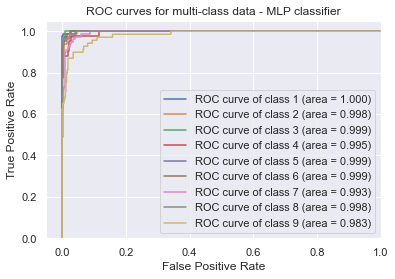

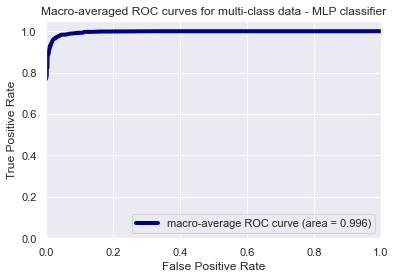

In [246]:
clf_mlp = MLPClassifier(max_iter=1000)
clf_mlp.fit(X_tr_mmscaled, y_tr)
y_score_mlp = clf_mlp.predict_proba(X_test_mmscaled)

n_classes = y_score_mlp.shape[1]

print(y_score_mlp.shape)

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_temp = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])

for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score_mlp[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #colors = cycler(color=['r','b','m','g'])
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label='ROC curve of class {0} (area = {1:0.3f})' ''.format(i+1, roc_auc[i]))

    
#plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multi-class data - MLP classifier')
plt.legend(loc="lower right")
plt.show()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score_mlp.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# store results for future use
fpr4_mm = fpr["macro"]
tpr4_mm = tpr["macro"]
roc_auc4_mm = roc_auc["macro"]

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.3f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-averaged ROC curves for multi-class data - MLP classifier")
plt.legend(loc="lower right")
plt.show()

### Area under ROC Curve 
* Data preprocessed with MinMax Scaler
* Hyperparameters tuned: alpha = 1, activation = relu and hidden_layer_sizes=(100,100)

In [247]:
gs_mm_auc = roc_auc_score(y_test, gs_mm.predict_proba(X_test), multi_class='ovr')
print("AUC for Multi-layered Perceptron with MinMax Scaled data and alpha=0.1 and activation=relu and hidden_layer_sizes=(100,100): {:.3f}".format(gs_mm_auc))

AUC for Multi-layered Perceptron with MinMax Scaled data and alpha=0.1 and activation=relu and hidden_layer_sizes=(100,100): 0.998


## [Principle Component Analysis (PCA) on MinMax Scaled Data](#zeroth-bullet) <a class="anchor" id="ninth3.1-bullet"></a>

PCA component shape: (64, 64)
Cumulative explained variance ratio  [0.09100777 0.15732943 0.21358622 0.26488727 0.31069145 0.35159808
 0.39121968 0.42924236 0.46374919 0.4968984  0.52634189 0.5532711
 0.57952117 0.60492005 0.62735364 0.64934542 0.67009267 0.68923041
 0.70827499 0.72596033 0.74301191 0.75924386 0.77412371 0.78875875
 0.80238673 0.8155316  0.82805152 0.83958641 0.85066181 0.86136015
 0.87171697 0.88172101 0.89140909 0.90007847 0.90835576 0.91639942
 0.9239934  0.93137382 0.93851197 0.94553022 0.95217467 0.95840518
 0.96442475 0.96973138 0.97443707 0.97891302 0.98282515 0.98651939
 0.98974633 0.99269355 0.99554256 0.99674579 0.99775346 0.99875316
 0.99950389 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


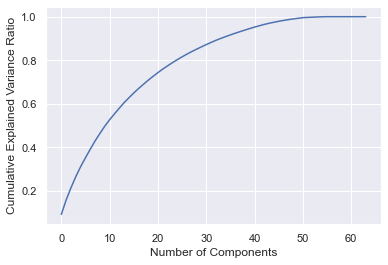

In [14]:
# Initializing the PCA transformer
pca_mlp_mm = PCA()

# Dimensionality Reduction
Xtr_pca_mlp_mm = pca_mlp_mm.fit_transform(X_tr_mmscaled)
Xtest_pca_mlp_mm = pca_mlp_mm.transform(X_test_mmscaled)

# Assessing the Principal components
print("PCA component shape: {}".format(pca_mlp_mm.components_.shape))

# Plotting Explained Variance Ratio graph
print("Cumulative explained variance ratio ", np.cumsum(pca_mlp_mm.explained_variance_ratio_))
plt.plot(np.cumsum(pca_mlp_mm.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [17]:
# Reducing the number of dimensions to 24 to correspond to 80% of variance explained
pca_mlp_reduced1_mm = PCA(n_components = 24)

# Dimensionality Reduction
Xtr_pca_mlp_reduced1_mm = pca_mlp_reduced1_mm.fit_transform(X_tr_mmscaled)
Xtest_pca_mlp_reduced1_mm = pca_mlp_reduced1_mm.transform(X_test_mmscaled)

# Fitting the Kernel-SVM model to the reduced dataset
mlp_reduced1_mm = mlp.fit(Xtr_pca_mlp_reduced1_mm, y_tr)

# Predicting results on reduced test dataset
y_pred_mlp_reduced1_mm = mlp.predict(Xtest_pca_mlp_reduced1_mm)

In [250]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset is ", mlp_reduced1_mm.score(Xtest_pca_mlp_reduced1_mm, y_test))

The average test accuracy on reduced dataset is  0.9135135135135135


In [251]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_mlp_reduced1_mm, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced1, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.9123222187418607


In [252]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 34 dimensions using PCA

mlp_auc = roc_auc_score(y_test, mlp.predict_proba(Xtest_pca_mlp_reduced1_mm), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(mlp_auc))

AUC for Kernel SVM: 0.994


In [253]:
# Reducing the number of dimensions to 35 to correspond to 90% of variance explained
pca_mlp_reduced2_mm = PCA(n_components = 35)

# Dimensionality Reduction
Xtr_pca_mlp_reduced2_mm = pca_mlp_reduced2_mm.fit_transform(X_tr_mmscaled)
Xtest_pca_mlp_reduced2_mm = pca_mlp_reduced2_mm.transform(X_test_mmscaled)

# Fitting the Kernel-SVM model to the reduced dataset
mlp_reduced2_mm = mlp.fit(Xtr_pca_mlp_reduced2_mm, y_tr)

# Predicting results on reduced test dataset
y_pred_mlp_reduced2_mm = mlp.predict(Xtest_pca_mlp_reduced2_mm)

In [254]:
# Accuracy of Kernel-SVM on reduced dataset
print("The average test accuracy on reduced dataset 2 is ", mlp_reduced2_mm.score(Xtest_pca_mlp_reduced2_mm, y_test))

The average test accuracy on reduced dataset 2 is  0.9279279279279279


In [255]:
# F1-score of reduced dataset
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_mlp_reduced2_mm, average='weighted'))
#print(classification_report(y_test, y_pred_ksvm_reduced2, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.9270988731469437


In [256]:
# Area under ROC curve for Kernel-SVM trained on Original data
# reduced to 45 dimensions using PCA

mlp_auc = roc_auc_score(y_test, mlp.predict_proba(Xtest_pca_mlp_reduced2_mm), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(mlp_auc))

AUC for Kernel SVM: 0.996


## [MLP classifier on mapped MinMax Scaled Data using K-Means clustering](#zeroth-bullet) <a class="anchor" id="ninth3.2-bullet"></a>

In [257]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 100

mlp.fit(X_tr_clust100_mm, y_tr_clust100_mm)
y_pred_clust100_mm = mlp.predict(X_test_clust100_mm)
print("The average test accuracy is ", mlp.score(X_test_clust100_mm, y_test_clust100_mm))

The average test accuracy is  0.872072072072072


In [258]:
# F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust100_mm, average='weighted'))
#print(classification_report(y_test, y_pred_clust100, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8695081662409886


In [259]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 100 cluster distance dimension space

mlp_auc = roc_auc_score(y_test, mlp.predict_proba(X_test_clust100_mm), multi_class='ovr')
print("AUC for Kernel SVM: {:.3f}".format(mlp_auc))

AUC for Kernel SVM: 0.990


In [260]:
# Classification using Kernel-SVM classifier
# On mapped Original data using KM Clustering
# n_clusters = 200

mlp.fit(X_tr_clust200_mm, y_tr_clust200_mm)
y_pred_clust200_mm = mlp.predict(X_test_clust200_mm)
print("The average test accuracy is ", mlp.score(X_test_clust200_mm, y_test_clust200_mm))

The average test accuracy is  0.8648648648648649


In [261]:
### F1-score of original dataset mapped to 100 clusters
print("The F1-score on the reduced dataset is ", f1_score(y_test, y_pred_clust200_mm, average='weighted'))
#print(classification_report(y_test, y_pred_clust200, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

The F1-score on the reduced dataset is  0.8604603825119909


In [262]:
# Area under ROC curve for Kernel-SVM trained on Original data
# mapped to 200 cluster distance dimension space

mlp_auc = roc_auc_score(y_test, mlp.predict_proba(X_test_clust200_mm), multi_class='ovr')
print("AUC for Logistic Regression: {:.3f}".format(mlp_auc))

AUC for Logistic Regression: 0.990


### Combined ROC Curve 

In [ ]:
#plt.plot([0,1],[0,1], 'k--')
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, label= "Kernel-SVM, Original Data: Area = {0:0.3f}".format(roc_auc1))
plt.plot(fpr1_std, tpr1_std, label= "Kernel-SVM, Standard Scaler Data: Area = {0:0.3f}".format(roc_auc1_std))
plt.plot(fpr1_mm, tpr1_mm, label= "Kernel-SVM, MinMax Scaler Data: Area = {0:0.3f}".format(roc_auc1_mm))
plt.plot(fpr2, tpr2, label= "Logistic Regression, Original Data: Area = {0:0.3f})".format(roc_auc2))
plt.plot(fpr2_std, tpr2_std, label= "Logistic Regression, Standard Scaler Data: Area = {0:0.3f})".format(roc_auc2_std))
plt.plot(fpr2_mm, tpr2_mm, label= "Logistic Regression, MinMax Scaler Data: Area = {0:0.3f})".format(roc_auc2_mm))
plt.plot(fpr3, tpr3, label= "Random Forest, Original Data: Area = {0:0.3f})".format(roc_auc3))
plt.plot(fpr3_opt, tpr3_opt, label= "Optimized Random Forest, Original Data: Area = {0:0.3f})".format(roc_auc3_opt))
plt.plot(fpr4, tpr4, label= "Multi-layer Perceptron, Original Data: Area = {0:0.3f})".format(roc_auc4))
plt.plot(fpr4_std, tpr4_std, label= "Multi-layer Perceptron, Standard Scaler Data: Area = {0:0.3f})".format(roc_auc4_std))
plt.plot(fpr4_mm, tpr4_mm, label= "Multi-layer Perceptron, MinMax Scaler Data: Area = {0:0.3f})".format(roc_auc4_mm))

# Set x,y lower, upper limits:  
#plt.xlim([0, 1])  
#plt.ylim([0, 1])

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic: Macro-Average ROC Curve')
plt.show()

In [ ]:
#plt.plot([0,1],[0,1], 'k--')
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, label= "Kernel-SVM, Original Data: Area = {0:0.3f}".format(roc_auc1))
plt.plot(fpr1_std, tpr1_std, label= "Kernel-SVM, Standard Scaler Data: Area = {0:0.3f}".format(roc_auc1_std))
plt.plot(fpr1_mm, tpr1_mm, label= "Kernel-SVM, MinMax Scaler Data: Area = {0:0.3f}".format(roc_auc1_mm))
plt.plot(fpr2, tpr2, label= "Logistic Regression, Original Data: Area = {0:0.3f})".format(roc_auc2))
plt.plot(fpr2_std, tpr2_std, label= "Logistic Regression, Standard Scaler Data: Area = {0:0.3f})".format(roc_auc2_std))
plt.plot(fpr2_mm, tpr2_mm, label= "Logistic Regression, MinMax Scaler Data: Area = {0:0.3f})".format(roc_auc2_mm))
plt.plot(fpr3, tpr3, label= "Random Forest, Original Data: Area = {0:0.3f})".format(roc_auc3))
plt.plot(fpr3_opt, tpr3_opt, label= "Optimized Random Forest, Original Data: Area = {0:0.3f})".format(roc_auc3_opt))
plt.plot(fpr4, tpr4, label= "Multi-layer Perceptron, Original Data: Area = {0:0.3f})".format(roc_auc4))
plt.plot(fpr4_std, tpr4_std, label= "Multi-layer Perceptron, Standard Scaler Data: Area = {0:0.3f})".format(roc_auc4_std))
plt.plot(fpr4_mm, tpr4_mm, label= "Multi-layer Perceptron, MinMax Scaler Data: Area = {0:0.3f})".format(roc_auc4_mm))

# Set x,y lower, upper limits:  
plt.xlim([0, 0.4])  
plt.ylim([0.7, 1])

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic: Macro-Average ROC Curve')
plt.show()

## [Correlations between classifiers](#zeroth-bullet) <a class="anchor" id="tenth-bullet"></a>

In continuation to part 1 of the project, in this revision of the code, all models were trained and tested on three versions of the dataset provided for this project - `Original Dataset`, `Standard Scaled Data` and `MinMax Scaled Data`. Subsequently, in this version of the code, all models were evaluated using the same three versions of the dataset along with `Principal Component Analysis` and `Data Mapping using Clustering`. In all models (except Random Forest classifier which is insenstitive to data normalization), MinMax preprocessing methods improved the performance of the model. Additionally, when PCA and clustering were applied to original datasets, the drop in performance measures of Kernel-SVM, Logistic Regression and MLP classifiers was significant. However, when PCA and clustering was applied on data preprocessed by MinMax Scaler, the drop in performance measures were prevented. Therefore, to examine the correlation between models to pick models for ensemble method, **ONLY** `MinMax Scaled Data` will be compared for each model. Since Random Forest is insensitive to normalization, the correlation of this classifier with others will be based on original data only. 

### Redefining all classifiers for the purpose of correlation

In [9]:
# Kernel-SVM with optimal parameters from GridSearch and cross-validation for MinMax Scaled data
k_svm_final = SVC(random_state=1, probability=True, C=10, gamma=0.1, kernel='rbf', decision_function_shape='ovr') # using the optimal values from GridSearch and Pipelines
k_svm_final.fit(X_tr_mmscaled, y_tr)
y_pred_ksvm_final = k_svm_final.predict(X_test_mmscaled)

In [89]:
k_svm_final.fit(X_tr_scaled, y_tr)
y_pred_ksvm_final = k_svm_final.predict(X_test_scaled)

In [10]:
# Logistic Regression with optimal parameters from GridSearch and cross-validation for MinMax Scaled data
log_reg_final = LogisticRegression(max_iter=100000, multi_class='ovr', C=100.0, solver='saga') # using the optimal values from GridSearch and Pipelines
log_reg_final.fit(X_tr_mmscaled, y_tr)
y_pred_lr_final = log_reg_final.predict(X_test_mmscaled)

In [90]:
log_reg_final.fit(X_tr_scaled, y_tr)
y_pred_lr_final = log_reg_final.predict(X_test_scaled)

In [11]:
# Random Forest with optimal parameters from GridSearch and cross-validation for Original Data
rf_tree_final = RandomForestClassifier(max_depth=5, n_estimators=100) # using the optimal values from GridSearch and Pipelines
rf_tree_final.fit(X_tr, y_tr)
y_pred_rf_final = rf_tree_final.predict(X_test)

In [8]:
# Multi-layered Perceptron with optimal parameters from GridSearch and cross-validation for MinMax Scaled data
mlp_final = MLPClassifier(max_iter=10000, activation='relu', alpha=0.1, hidden_layer_sizes=(100,100)) # using the optimal values from GridSearch and Pipelines
mlp_final.fit(X_tr_mmscaled, y_tr)
y_pred_mlp_final = mlp_final.predict(X_test_mmscaled)

In [91]:
mlp_final.fit(X_tr_scaled, y_tr)
y_pred_mlp_final = mlp_final.predict(X_test_scaled)

### Computing the probabilities of prediction by each classifier

In [286]:
class_prob_ksvm = k_svm_final.predict_proba(X_test_mmscaled)
class_prob_lr = log_reg_final.predict_proba(X_test_mmscaled)
class_prob_rf = rf_tree_final.predict_proba(X_test) # RF is insensitive to data normalization
class_prob_mlp = mlp_final.predict_proba(X_test_mmscaled)

In [92]:
class_prob_ksvm_std = k_svm_final.predict_proba(X_test_scaled)
class_prob_lr_std = log_reg_final.predict_proba(X_test_scaled)
class_prob_rf_std = rf_tree_final.predict_proba(X_test) # RF is insensitive to data normalization
class_prob_mlp_std = mlp_final.predict_proba(X_test_scaled)

### Plotting prediction probabilities to examine correlation between models

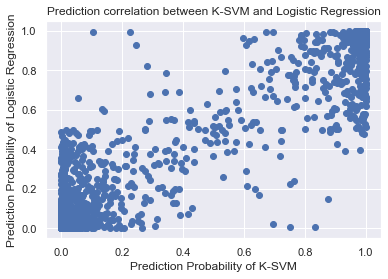

In [287]:
# Kernel SVM and Logistic Regression

x1 = class_prob_ksvm
y1 = class_prob_lr

plt.scatter(x1, y1)
plt.xlabel('Prediction Probability of K-SVM') 
plt.ylabel('Prediction Probability of Logistic Regression') 
plt.title("Prediction correlation between K-SVM and Logistic Regression")
plt.show()

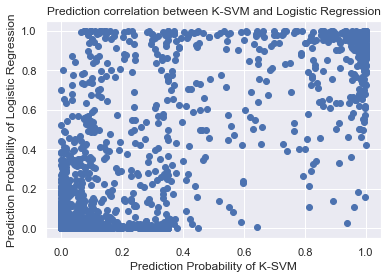

In [93]:
# Kernel SVM and Logistic Regression
# with Standard Scaled Data

x1 = class_prob_ksvm_std
y1 = class_prob_lr_std

plt.scatter(x1, y1)
plt.xlabel('Prediction Probability of K-SVM') 
plt.ylabel('Prediction Probability of Logistic Regression') 
plt.title("Prediction correlation between K-SVM and Logistic Regression")
plt.show()

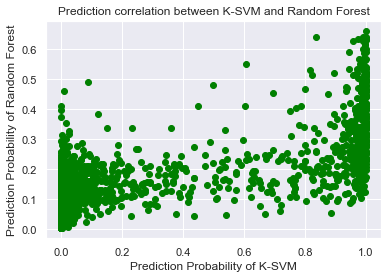

In [288]:
# Kernel-SVM and Random Forest

x1 = class_prob_ksvm
y2 = class_prob_rf

plt.scatter(x1, y2, color = 'green')
plt.xlabel('Prediction Probability of K-SVM') 
plt.ylabel('Prediction Probability of Random Forest') 
plt.title("Prediction correlation between K-SVM and Random Forest")
plt.show()

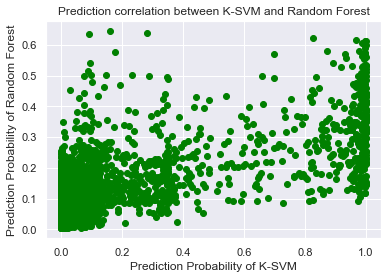

In [94]:
# Kernel-SVM and Random Forest
# with Standard Scaled data

x1 = class_prob_ksvm_std
y2 = class_prob_rf_std

plt.scatter(x1, y2, color = 'green')
plt.xlabel('Prediction Probability of K-SVM') 
plt.ylabel('Prediction Probability of Random Forest') 
plt.title("Prediction correlation between K-SVM and Random Forest")
plt.show()

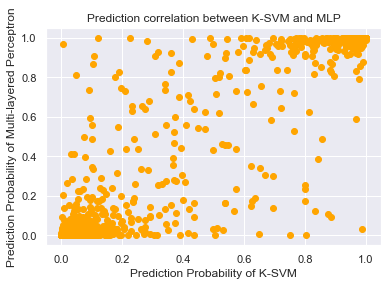

In [289]:
# Kernel-SVM and Multi-layered Perceptron

x1 = class_prob_ksvm
y3 = class_prob_mlp

plt.scatter(x1, y3, color = 'orange')
plt.xlabel('Prediction Probability of K-SVM') 
plt.ylabel('Prediction Probability of Multi-layered Perceptron') 
plt.title("Prediction correlation between K-SVM and MLP")
plt.show()

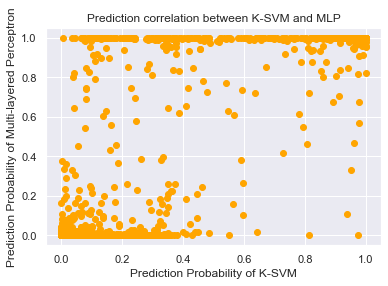

In [95]:
# Kernel-SVM and Multi-layered Perceptron
# with Standard Scaled data

x1 = class_prob_ksvm_std
y3 = class_prob_mlp_std

plt.scatter(x1, y3, color = 'orange')
plt.xlabel('Prediction Probability of K-SVM') 
plt.ylabel('Prediction Probability of Multi-layered Perceptron') 
plt.title("Prediction correlation between K-SVM and MLP")
plt.show()

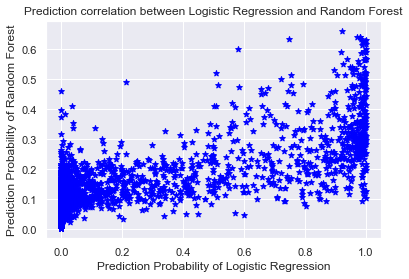

In [297]:
# Logistic Regression and Random Forest

x2 = class_prob_lr
y2 = class_prob_rf

plt.scatter(x2, y2, marker = '*', color = 'blue')
plt.xlabel('Prediction Probability of Logistic Regression') 
plt.ylabel('Prediction Probability of Random Forest') 
plt.title("Prediction correlation between Logistic Regression and Random Forest")
plt.show()

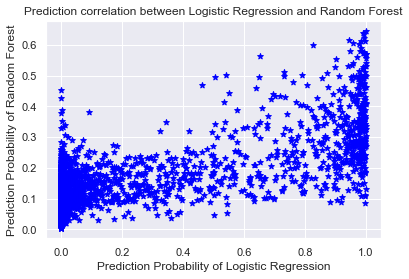

In [96]:
# Logistic Regression and Random Forest
# with Standard Scaled data

x2 = class_prob_lr_std
y2 = class_prob_rf_std

plt.scatter(x2, y2, marker = '*', color = 'blue')
plt.xlabel('Prediction Probability of Logistic Regression') 
plt.ylabel('Prediction Probability of Random Forest') 
plt.title("Prediction correlation between Logistic Regression and Random Forest")
plt.show()

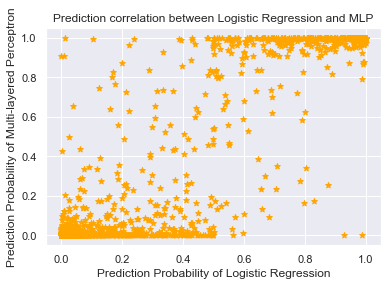

In [298]:
# Logistic Regression and Multi-layered Perceptron

x2 = class_prob_lr
y3 = class_prob_mlp

plt.scatter(x2, y3, marker = '*', color = 'orange')
plt.xlabel('Prediction Probability of Logistic Regression') 
plt.ylabel('Prediction Probability of Multi-layered Perceptron') 
plt.title("Prediction correlation between Logistic Regression and MLP")
plt.show()

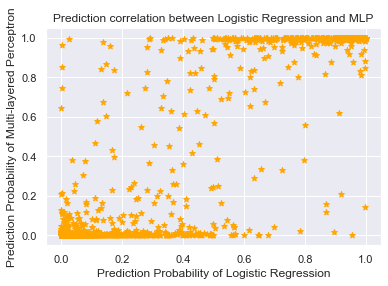

In [97]:
# Logistic Regression and Multi-layered Perceptron
# with Standard Scaled data

x2 = class_prob_lr_std
y3 = class_prob_mlp_std

plt.scatter(x2, y3, marker = '*', color = 'orange')
plt.xlabel('Prediction Probability of Logistic Regression') 
plt.ylabel('Prediction Probability of Multi-layered Perceptron') 
plt.title("Prediction correlation between Logistic Regression and MLP")
plt.show()

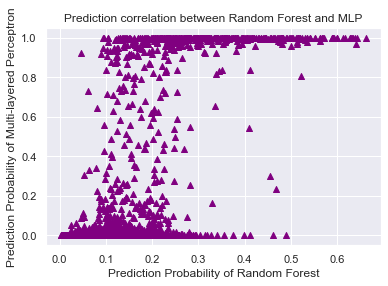

In [300]:
# Random Forest and Multi-layered Perceptron

x3 = class_prob_rf
y3 = class_prob_mlp

plt.scatter(x3, y3, marker = '^', color = 'purple')
plt.xlabel('Prediction Probability of Random Forest') 
plt.ylabel('Prediction Probability of Multi-layered Perceptron') 
plt.title("Prediction correlation between Random Forest and MLP")
plt.show()

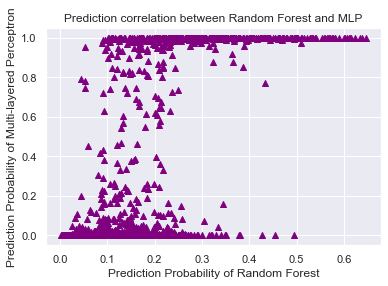

In [98]:
# Random Forest and Multi-layered Perceptron
# with Standard Scaled data

x3 = class_prob_rf_std
y3 = class_prob_mlp_std

plt.scatter(x3, y3, marker = '^', color = 'purple')
plt.xlabel('Prediction Probability of Random Forest') 
plt.ylabel('Prediction Probability of Multi-layered Perceptron') 
plt.title("Prediction correlation between Random Forest and MLP")
plt.show()

### Computing Mean Square Error of each model

The following code examines the `Mean Square Error` of the prediction of each model from the ground truth. This is of not much use when we are interested in understanding the correlation between models. However, this has been included to understand and corroborate the performance measures that we have seen through the course of this project. 

In [295]:
y_true = y_test
y_pred1 = y_pred_ksvm_final
y_pred2 = y_pred_lr_final
y_pred3 = y_pred_rf_final
y_pred4 = y_pred_mlp_final

print("The Mean Square Error of prediction by Kernel-SVM is ", mean_squared_error(y_true, y_pred1))
print("The Mean Square Error of prediction by Logistic Regression is ", mean_squared_error(y_true, y_pred2))
print("The Mean Square Error of prediction by Random Forest is ", mean_squared_error(y_true, y_pred3))
print("The Mean Square Error of prediction by Multi-layered Perceptron is ", mean_squared_error(y_true, y_pred4))

The Mean Square Error of prediction by Kernel-SVM is  1.018018018018018
The Mean Square Error of prediction by Logistic Regression is  1.8576576576576576
The Mean Square Error of prediction by Random Forest is  4.812612612612613
The Mean Square Error of prediction by Multi-layered Perceptron is  1.3477477477477477


### Function to compute the mean square error of prediction between two classifiers

In [26]:
def meanSqError(x_pred, y_pred):
    """
    Function to calculate the mean square error between two vectors.
    
    Inputs:
    x_pred, y_pred - np arrays of same length
    
    Output:
    MSE - float
    """
    N = len(x_pred)
    MSE = 0
    
    for n in range(N):
        MSE = (x_pred[n]-y_pred[n])**2 + MSE
        
    MSE = MSE/N
    
    return MSE

In [312]:
print("The Mean Square Error of prediction between K-SVM and Logistic Regression is {:.3f}".format(meanSqError(y_pred1, y_pred2)))
print("The Mean Square Error of prediction between K-SVM and Random Forest is {:.3f}".format(meanSqError(y_pred1, y_pred3)))
print("The Mean Square Error of prediction between K-SVM and Multi-layered Perceptron is {:.3f}".format(meanSqError(y_pred1, y_pred4)))
print("The Mean Square Error of prediction between Logistic Regression and Random Forest is {:.3f}".format(meanSqError(y_pred2, y_pred3)))
print("The Mean Square Error of prediction between Logistic Regression and Multi-layered Perceptron is {:.3f}".format(meanSqError(y_pred2, y_pred4)))
print("The Mean Square Error of prediction between Random Forest and Multi-layered Perceptron is {:.3f}".format(meanSqError(y_pred3, y_pred4)))

The Mean Square Error of prediction between K-SVM and Logistic Regression is 1.348
The Mean Square Error of prediction between K-SVM and Random Forest is 4.760
The Mean Square Error of prediction between K-SVM and Multi-layered Perceptron is 1.490
The Mean Square Error of prediction between Logistic Regression and Random Forest is 4.721
The Mean Square Error of prediction between Logistic Regression and Multi-layered Perceptron is 1.706
The Mean Square Error of prediction between Random Forest and Multi-layered Perceptron is 4.733


# [Ensemble Classifiers](#zeroth-bullet) <a class="anchor" id="eleventh-bullet"></a>

## [Majority Voting Classifier](#zeroth-bullet) <a class="anchor" id="eleventh1-bullet"></a>

For the Majority Voting ensemble classifier, it is better to choose models that are less correlated with one another. From the above Mean Square Error results, we see that Random Forest is least correlated with all the remaining models - Kernel-SVM, Logistic Regression and Multi-layered Perceptron. Therefore, three Majority Voting classifiers have been set up - MV1, MV2 and MV3. `MV1 = K-SVM and RF`, `MV2 = Logistic Regression and RF` and `MV3 = MLP and RF`. Since RF is insensitive to data normalization, it was designed to be just the final Random Forest classifier `rf_tree_final`, while the other three models were designed in separate pipelines with MinMaxScaler, since it gave the highest performance accuracy across all 3 models

In [315]:
pipe1 = Pipeline([['Scaler', MinMaxScaler()], ['Classifier', k_svm_final]])
pipe2 = Pipeline([['Scaler', MinMaxScaler()], ['Classifier', log_reg_final]])
pipe4 = Pipeline([['Scaler', MinMaxScaler()], ['Classifier', mlp_final]])
clf3 = rf_tree_final

In [99]:
pipe1 = Pipeline([['Scaler', StandardScaler()], ['Classifier', k_svm_final]])
pipe2 = Pipeline([['Scaler', StandardScaler()], ['Classifier', log_reg_final]])
pipe4 = Pipeline([['Scaler', StandardScaler()], ['Classifier', mlp_final]])
clf3 = rf_tree_final

In [320]:
mv1 = VotingClassifier(estimators=[('svm', pipe1), ('rf', clf3)], voting='hard')
mv1.fit(X_tr_mmscaled, y_tr)
y_pred_mv1 = mv1.predict(X_test_mmscaled)
print('The accuracy of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is ', mv1.score(X_test_mmscaled, y_test))
print("The F1-score of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is ", f1_score(y_test, y_pred_mv1, average='weighted'))

The accuracy of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is  0.8558558558558559
The F1-score of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is  0.8510474607096491


In [100]:
mv1_std = VotingClassifier(estimators=[('svm', pipe1), ('rf', clf3)], voting='hard')
mv1_std.fit(X_tr_mmscaled, y_tr)
y_pred_mv1_std = mv1_std.predict(X_test_mmscaled)
print('The accuracy of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is ', mv1_std.score(X_test_mmscaled, y_test))
print("The F1-score of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is ", f1_score(y_test, y_pred_mv1_std, average='weighted'))

The accuracy of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is  0.7405405405405405
The F1-score of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is  0.7322470412450475


In [321]:
mv2 = VotingClassifier(estimators=[('lr', pipe2), ('rf', clf3)], voting='hard')
mv2.fit(X_tr_mmscaled, y_tr)
y_pred_mv2 = mv2.predict(X_test_mmscaled)
print('The accuracy of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is ', mv2.score(X_test_mmscaled, y_test))
print("The F1-score of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is ", f1_score(y_test, y_pred_mv2, average='weighted'))

The accuracy of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is  0.8396396396396396
The F1-score of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is  0.8339276804591009


In [101]:
mv2_std = VotingClassifier(estimators=[('lr', pipe2), ('rf', clf3)], voting='hard')
mv2_std.fit(X_tr_mmscaled, y_tr)
y_pred_mv2_std = mv2_std.predict(X_test_mmscaled)
print('The accuracy of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is ', mv2_std.score(X_test_mmscaled, y_test))
print("The F1-score of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is ", f1_score(y_test, y_pred_mv2_std, average='weighted'))

The accuracy of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is  0.8126126126126126
The F1-score of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is  0.8071885068099833


In [322]:
mv3 = VotingClassifier(estimators=[('mlp', pipe4), ('rf', clf3)], voting='hard')
mv3.fit(X_tr_mmscaled, y_tr)
y_pred_mv3 = mv3.predict(X_test_mmscaled)
print('The accuracy of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is ', mv3.score(X_test_mmscaled, y_test))
print("The F1-score of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is ", f1_score(y_test, y_pred_mv3, average='weighted'))

The accuracy of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is  0.8324324324324325
The F1-score of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is  0.8263103439185575


In [102]:
mv3_std = VotingClassifier(estimators=[('mlp', pipe4), ('rf', clf3)], voting='hard')
mv3_std.fit(X_tr_mmscaled, y_tr)
y_pred_mv3_std = mv3_std.predict(X_test_mmscaled)
print('The accuracy of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is ', mv3_std.score(X_test_mmscaled, y_test))
print("The F1-score of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is ", f1_score(y_test, y_pred_mv3_std, average='weighted'))

The accuracy of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is  0.8396396396396396
The F1-score of Majority Vote Classifier 1 with ensemble of K-SVM and RF classifier is  0.8341040011012646


## [Bagging Classifier](#zeroth-bullet) <a class="anchor" id="eleventh2-bullet"></a>

In [330]:
# With trained Random Forest classifier

y_tr_pred_rf = rf_tree_final.predict(X_tr)
y_test_pred_rf = rf_tree_final.predict(X_test)

rf_tree_final_train = accuracy_score(y_tr, y_tr_pred_rf)
rf_tree_final_test = accuracy_score(y_test, y_test_pred_rf)
print('Random Forest train/test accuracies %.3f/%.3f' % (rf_tree_final_train, rf_tree_final_test))

Random Forest train/test accuracies 0.840/0.751


In [329]:
bag1 = BaggingClassifier(base_estimator=rf_tree_final,
                        n_estimators=2000, 
                        max_samples=1.0, #draw 100% of the number of samples (with replacement) for each
                        max_features=1.0, #use 100% of the number of features (without replacement)
                        bootstrap=True, #sampling with replacement after each
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1, verbose=4)

bag1.fit(X_tr, y_tr)
y_tr_pred = bag1.predict(X_tr)
y_test_pred = bag1.predict(X_test)

bag1_train = accuracy_score(y_tr, y_tr_pred) 
bag1_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag1_train, bag1_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 2000 for this parallel run (total 2000)...
Building estimator 2 of 2000 for this parallel run (total 2000)...
Building estimator 3 of 2000 for this parallel run (total 2000)...
Building estimator 4 of 2000 for this parallel run (total 2000)...
Building estimator 5 of 2000 for this parallel run (total 2000)...
Building estimator 6 of 2000 for this parallel run (total 2000)...
Building estimator 7 of 2000 for this parallel run (total 2000)...
Building estimator 8 of 2000 for this parallel run (total 2000)...
Building estimator 9 of 2000 for this parallel run (total 2000)...
Building estimator 10 of 2000 for this parallel run (total 2000)...
Building estimator 11 of 2000 for this parallel run (total 2000)...
Building estimator 12 of 2000 for this parallel run (total 2000)...
Building estimator 13 of 2000 for this parallel run (total 2000)...
Building estimator 14 of 2000 for this parallel run (total 2000)...
Building estimator 15 of 2000 for this parallel run (tota

Building estimator 122 of 2000 for this parallel run (total 2000)...
Building estimator 123 of 2000 for this parallel run (total 2000)...
Building estimator 124 of 2000 for this parallel run (total 2000)...
Building estimator 125 of 2000 for this parallel run (total 2000)...
Building estimator 126 of 2000 for this parallel run (total 2000)...
Building estimator 127 of 2000 for this parallel run (total 2000)...
Building estimator 128 of 2000 for this parallel run (total 2000)...
Building estimator 129 of 2000 for this parallel run (total 2000)...
Building estimator 130 of 2000 for this parallel run (total 2000)...
Building estimator 131 of 2000 for this parallel run (total 2000)...
Building estimator 132 of 2000 for this parallel run (total 2000)...
Building estimator 133 of 2000 for this parallel run (total 2000)...
Building estimator 134 of 2000 for this parallel run (total 2000)...
Building estimator 135 of 2000 for this parallel run (total 2000)...
Building estimator 136 of 2000 for

Building estimator 241 of 2000 for this parallel run (total 2000)...
Building estimator 242 of 2000 for this parallel run (total 2000)...
Building estimator 243 of 2000 for this parallel run (total 2000)...
Building estimator 244 of 2000 for this parallel run (total 2000)...
Building estimator 245 of 2000 for this parallel run (total 2000)...
Building estimator 246 of 2000 for this parallel run (total 2000)...
Building estimator 247 of 2000 for this parallel run (total 2000)...
Building estimator 248 of 2000 for this parallel run (total 2000)...
Building estimator 249 of 2000 for this parallel run (total 2000)...
Building estimator 250 of 2000 for this parallel run (total 2000)...
Building estimator 251 of 2000 for this parallel run (total 2000)...
Building estimator 252 of 2000 for this parallel run (total 2000)...
Building estimator 253 of 2000 for this parallel run (total 2000)...
Building estimator 254 of 2000 for this parallel run (total 2000)...
Building estimator 255 of 2000 for

Building estimator 360 of 2000 for this parallel run (total 2000)...
Building estimator 361 of 2000 for this parallel run (total 2000)...
Building estimator 362 of 2000 for this parallel run (total 2000)...
Building estimator 363 of 2000 for this parallel run (total 2000)...
Building estimator 364 of 2000 for this parallel run (total 2000)...
Building estimator 365 of 2000 for this parallel run (total 2000)...
Building estimator 366 of 2000 for this parallel run (total 2000)...
Building estimator 367 of 2000 for this parallel run (total 2000)...
Building estimator 368 of 2000 for this parallel run (total 2000)...
Building estimator 369 of 2000 for this parallel run (total 2000)...
Building estimator 370 of 2000 for this parallel run (total 2000)...
Building estimator 371 of 2000 for this parallel run (total 2000)...
Building estimator 372 of 2000 for this parallel run (total 2000)...
Building estimator 373 of 2000 for this parallel run (total 2000)...
Building estimator 374 of 2000 for

Building estimator 480 of 2000 for this parallel run (total 2000)...
Building estimator 481 of 2000 for this parallel run (total 2000)...
Building estimator 482 of 2000 for this parallel run (total 2000)...
Building estimator 483 of 2000 for this parallel run (total 2000)...
Building estimator 484 of 2000 for this parallel run (total 2000)...
Building estimator 485 of 2000 for this parallel run (total 2000)...
Building estimator 486 of 2000 for this parallel run (total 2000)...
Building estimator 487 of 2000 for this parallel run (total 2000)...
Building estimator 488 of 2000 for this parallel run (total 2000)...
Building estimator 489 of 2000 for this parallel run (total 2000)...
Building estimator 490 of 2000 for this parallel run (total 2000)...
Building estimator 491 of 2000 for this parallel run (total 2000)...
Building estimator 492 of 2000 for this parallel run (total 2000)...
Building estimator 493 of 2000 for this parallel run (total 2000)...
Building estimator 494 of 2000 for

Building estimator 599 of 2000 for this parallel run (total 2000)...
Building estimator 600 of 2000 for this parallel run (total 2000)...
Building estimator 601 of 2000 for this parallel run (total 2000)...
Building estimator 602 of 2000 for this parallel run (total 2000)...
Building estimator 603 of 2000 for this parallel run (total 2000)...
Building estimator 604 of 2000 for this parallel run (total 2000)...
Building estimator 605 of 2000 for this parallel run (total 2000)...
Building estimator 606 of 2000 for this parallel run (total 2000)...
Building estimator 607 of 2000 for this parallel run (total 2000)...
Building estimator 608 of 2000 for this parallel run (total 2000)...
Building estimator 609 of 2000 for this parallel run (total 2000)...
Building estimator 610 of 2000 for this parallel run (total 2000)...
Building estimator 611 of 2000 for this parallel run (total 2000)...
Building estimator 612 of 2000 for this parallel run (total 2000)...
Building estimator 613 of 2000 for

Building estimator 719 of 2000 for this parallel run (total 2000)...
Building estimator 720 of 2000 for this parallel run (total 2000)...
Building estimator 721 of 2000 for this parallel run (total 2000)...
Building estimator 722 of 2000 for this parallel run (total 2000)...
Building estimator 723 of 2000 for this parallel run (total 2000)...
Building estimator 724 of 2000 for this parallel run (total 2000)...
Building estimator 725 of 2000 for this parallel run (total 2000)...
Building estimator 726 of 2000 for this parallel run (total 2000)...
Building estimator 727 of 2000 for this parallel run (total 2000)...
Building estimator 728 of 2000 for this parallel run (total 2000)...
Building estimator 729 of 2000 for this parallel run (total 2000)...
Building estimator 730 of 2000 for this parallel run (total 2000)...
Building estimator 731 of 2000 for this parallel run (total 2000)...
Building estimator 732 of 2000 for this parallel run (total 2000)...
Building estimator 733 of 2000 for

Building estimator 838 of 2000 for this parallel run (total 2000)...
Building estimator 839 of 2000 for this parallel run (total 2000)...
Building estimator 840 of 2000 for this parallel run (total 2000)...
Building estimator 841 of 2000 for this parallel run (total 2000)...
Building estimator 842 of 2000 for this parallel run (total 2000)...
Building estimator 843 of 2000 for this parallel run (total 2000)...
Building estimator 844 of 2000 for this parallel run (total 2000)...
Building estimator 845 of 2000 for this parallel run (total 2000)...
Building estimator 846 of 2000 for this parallel run (total 2000)...
Building estimator 847 of 2000 for this parallel run (total 2000)...
Building estimator 848 of 2000 for this parallel run (total 2000)...
Building estimator 849 of 2000 for this parallel run (total 2000)...
Building estimator 850 of 2000 for this parallel run (total 2000)...
Building estimator 851 of 2000 for this parallel run (total 2000)...
Building estimator 852 of 2000 for

Building estimator 958 of 2000 for this parallel run (total 2000)...
Building estimator 959 of 2000 for this parallel run (total 2000)...
Building estimator 960 of 2000 for this parallel run (total 2000)...
Building estimator 961 of 2000 for this parallel run (total 2000)...
Building estimator 962 of 2000 for this parallel run (total 2000)...
Building estimator 963 of 2000 for this parallel run (total 2000)...
Building estimator 964 of 2000 for this parallel run (total 2000)...
Building estimator 965 of 2000 for this parallel run (total 2000)...
Building estimator 966 of 2000 for this parallel run (total 2000)...
Building estimator 967 of 2000 for this parallel run (total 2000)...
Building estimator 968 of 2000 for this parallel run (total 2000)...
Building estimator 969 of 2000 for this parallel run (total 2000)...
Building estimator 970 of 2000 for this parallel run (total 2000)...
Building estimator 971 of 2000 for this parallel run (total 2000)...
Building estimator 972 of 2000 for

Building estimator 1077 of 2000 for this parallel run (total 2000)...
Building estimator 1078 of 2000 for this parallel run (total 2000)...
Building estimator 1079 of 2000 for this parallel run (total 2000)...
Building estimator 1080 of 2000 for this parallel run (total 2000)...
Building estimator 1081 of 2000 for this parallel run (total 2000)...
Building estimator 1082 of 2000 for this parallel run (total 2000)...
Building estimator 1083 of 2000 for this parallel run (total 2000)...
Building estimator 1084 of 2000 for this parallel run (total 2000)...
Building estimator 1085 of 2000 for this parallel run (total 2000)...
Building estimator 1086 of 2000 for this parallel run (total 2000)...
Building estimator 1087 of 2000 for this parallel run (total 2000)...
Building estimator 1088 of 2000 for this parallel run (total 2000)...
Building estimator 1089 of 2000 for this parallel run (total 2000)...
Building estimator 1090 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1195 of 2000 for this parallel run (total 2000)...
Building estimator 1196 of 2000 for this parallel run (total 2000)...
Building estimator 1197 of 2000 for this parallel run (total 2000)...
Building estimator 1198 of 2000 for this parallel run (total 2000)...
Building estimator 1199 of 2000 for this parallel run (total 2000)...
Building estimator 1200 of 2000 for this parallel run (total 2000)...
Building estimator 1201 of 2000 for this parallel run (total 2000)...
Building estimator 1202 of 2000 for this parallel run (total 2000)...
Building estimator 1203 of 2000 for this parallel run (total 2000)...
Building estimator 1204 of 2000 for this parallel run (total 2000)...
Building estimator 1205 of 2000 for this parallel run (total 2000)...
Building estimator 1206 of 2000 for this parallel run (total 2000)...
Building estimator 1207 of 2000 for this parallel run (total 2000)...
Building estimator 1208 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1314 of 2000 for this parallel run (total 2000)...
Building estimator 1315 of 2000 for this parallel run (total 2000)...
Building estimator 1316 of 2000 for this parallel run (total 2000)...
Building estimator 1317 of 2000 for this parallel run (total 2000)...
Building estimator 1318 of 2000 for this parallel run (total 2000)...
Building estimator 1319 of 2000 for this parallel run (total 2000)...
Building estimator 1320 of 2000 for this parallel run (total 2000)...
Building estimator 1321 of 2000 for this parallel run (total 2000)...
Building estimator 1322 of 2000 for this parallel run (total 2000)...
Building estimator 1323 of 2000 for this parallel run (total 2000)...
Building estimator 1324 of 2000 for this parallel run (total 2000)...
Building estimator 1325 of 2000 for this parallel run (total 2000)...
Building estimator 1326 of 2000 for this parallel run (total 2000)...
Building estimator 1327 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1432 of 2000 for this parallel run (total 2000)...
Building estimator 1433 of 2000 for this parallel run (total 2000)...
Building estimator 1434 of 2000 for this parallel run (total 2000)...
Building estimator 1435 of 2000 for this parallel run (total 2000)...
Building estimator 1436 of 2000 for this parallel run (total 2000)...
Building estimator 1437 of 2000 for this parallel run (total 2000)...
Building estimator 1438 of 2000 for this parallel run (total 2000)...
Building estimator 1439 of 2000 for this parallel run (total 2000)...
Building estimator 1440 of 2000 for this parallel run (total 2000)...
Building estimator 1441 of 2000 for this parallel run (total 2000)...
Building estimator 1442 of 2000 for this parallel run (total 2000)...
Building estimator 1443 of 2000 for this parallel run (total 2000)...
Building estimator 1444 of 2000 for this parallel run (total 2000)...
Building estimator 1445 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1551 of 2000 for this parallel run (total 2000)...
Building estimator 1552 of 2000 for this parallel run (total 2000)...
Building estimator 1553 of 2000 for this parallel run (total 2000)...
Building estimator 1554 of 2000 for this parallel run (total 2000)...
Building estimator 1555 of 2000 for this parallel run (total 2000)...
Building estimator 1556 of 2000 for this parallel run (total 2000)...
Building estimator 1557 of 2000 for this parallel run (total 2000)...
Building estimator 1558 of 2000 for this parallel run (total 2000)...
Building estimator 1559 of 2000 for this parallel run (total 2000)...
Building estimator 1560 of 2000 for this parallel run (total 2000)...
Building estimator 1561 of 2000 for this parallel run (total 2000)...
Building estimator 1562 of 2000 for this parallel run (total 2000)...
Building estimator 1563 of 2000 for this parallel run (total 2000)...
Building estimator 1564 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1670 of 2000 for this parallel run (total 2000)...
Building estimator 1671 of 2000 for this parallel run (total 2000)...
Building estimator 1672 of 2000 for this parallel run (total 2000)...
Building estimator 1673 of 2000 for this parallel run (total 2000)...
Building estimator 1674 of 2000 for this parallel run (total 2000)...
Building estimator 1675 of 2000 for this parallel run (total 2000)...
Building estimator 1676 of 2000 for this parallel run (total 2000)...
Building estimator 1677 of 2000 for this parallel run (total 2000)...
Building estimator 1678 of 2000 for this parallel run (total 2000)...
Building estimator 1679 of 2000 for this parallel run (total 2000)...
Building estimator 1680 of 2000 for this parallel run (total 2000)...
Building estimator 1681 of 2000 for this parallel run (total 2000)...
Building estimator 1682 of 2000 for this parallel run (total 2000)...
Building estimator 1683 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1788 of 2000 for this parallel run (total 2000)...
Building estimator 1789 of 2000 for this parallel run (total 2000)...
Building estimator 1790 of 2000 for this parallel run (total 2000)...
Building estimator 1791 of 2000 for this parallel run (total 2000)...
Building estimator 1792 of 2000 for this parallel run (total 2000)...
Building estimator 1793 of 2000 for this parallel run (total 2000)...
Building estimator 1794 of 2000 for this parallel run (total 2000)...
Building estimator 1795 of 2000 for this parallel run (total 2000)...
Building estimator 1796 of 2000 for this parallel run (total 2000)...
Building estimator 1797 of 2000 for this parallel run (total 2000)...
Building estimator 1798 of 2000 for this parallel run (total 2000)...
Building estimator 1799 of 2000 for this parallel run (total 2000)...
Building estimator 1800 of 2000 for this parallel run (total 2000)...
Building estimator 1801 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1906 of 2000 for this parallel run (total 2000)...
Building estimator 1907 of 2000 for this parallel run (total 2000)...
Building estimator 1908 of 2000 for this parallel run (total 2000)...
Building estimator 1909 of 2000 for this parallel run (total 2000)...
Building estimator 1910 of 2000 for this parallel run (total 2000)...
Building estimator 1911 of 2000 for this parallel run (total 2000)...
Building estimator 1912 of 2000 for this parallel run (total 2000)...
Building estimator 1913 of 2000 for this parallel run (total 2000)...
Building estimator 1914 of 2000 for this parallel run (total 2000)...
Building estimator 1915 of 2000 for this parallel run (total 2000)...
Building estimator 1916 of 2000 for this parallel run (total 2000)...
Building estimator 1917 of 2000 for this parallel run (total 2000)...
Building estimator 1918 of 2000 for this parallel run (total 2000)...
Building estimator 1919 of 2000 for this parallel run (total 2000)...
Building estimator 1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Bagging train/test accuracies 0.832/0.755


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.8s finished


In [ ]:
Xtr_pca_rf_reduced1 = pca_rf_reduced1.fit_transform(X_tr)
Xtest_pca_rf_reduced1 = pca_rf_reduced1.transform(X_test)


In [339]:
bag1.fit(Xtr_pca_rf_reduced1, y_tr)
y_tr_pred_pca = bag1.predict(Xtr_pca_rf_reduced1)
y_test_pred_pca = bag1.predict(Xtest_pca_rf_reduced1)

bag1_train = accuracy_score(y_tr, y_tr_pred_pca) 
bag1_test = accuracy_score(y_test, y_test_pred_pca) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag1_train, bag1_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 2000 for this parallel run (total 2000)...
Building estimator 2 of 2000 for this parallel run (total 2000)...
Building estimator 3 of 2000 for this parallel run (total 2000)...
Building estimator 4 of 2000 for this parallel run (total 2000)...
Building estimator 5 of 2000 for this parallel run (total 2000)...
Building estimator 6 of 2000 for this parallel run (total 2000)...
Building estimator 7 of 2000 for this parallel run (total 2000)...
Building estimator 8 of 2000 for this parallel run (total 2000)...
Building estimator 9 of 2000 for this parallel run (total 2000)...
Building estimator 10 of 2000 for this parallel run (total 2000)...
Building estimator 11 of 2000 for this parallel run (total 2000)...
Building estimator 12 of 2000 for this parallel run (total 2000)...
Building estimator 13 of 2000 for this parallel run (total 2000)...
Building estimator 14 of 2000 for this parallel run (total 2000)...
Building estimator 15 of 2000 for this parallel run (tota

Building estimator 122 of 2000 for this parallel run (total 2000)...
Building estimator 123 of 2000 for this parallel run (total 2000)...
Building estimator 124 of 2000 for this parallel run (total 2000)...
Building estimator 125 of 2000 for this parallel run (total 2000)...
Building estimator 126 of 2000 for this parallel run (total 2000)...
Building estimator 127 of 2000 for this parallel run (total 2000)...
Building estimator 128 of 2000 for this parallel run (total 2000)...
Building estimator 129 of 2000 for this parallel run (total 2000)...
Building estimator 130 of 2000 for this parallel run (total 2000)...
Building estimator 131 of 2000 for this parallel run (total 2000)...
Building estimator 132 of 2000 for this parallel run (total 2000)...
Building estimator 133 of 2000 for this parallel run (total 2000)...
Building estimator 134 of 2000 for this parallel run (total 2000)...
Building estimator 135 of 2000 for this parallel run (total 2000)...
Building estimator 136 of 2000 for

Building estimator 241 of 2000 for this parallel run (total 2000)...
Building estimator 242 of 2000 for this parallel run (total 2000)...
Building estimator 243 of 2000 for this parallel run (total 2000)...
Building estimator 244 of 2000 for this parallel run (total 2000)...
Building estimator 245 of 2000 for this parallel run (total 2000)...
Building estimator 246 of 2000 for this parallel run (total 2000)...
Building estimator 247 of 2000 for this parallel run (total 2000)...
Building estimator 248 of 2000 for this parallel run (total 2000)...
Building estimator 249 of 2000 for this parallel run (total 2000)...
Building estimator 250 of 2000 for this parallel run (total 2000)...
Building estimator 251 of 2000 for this parallel run (total 2000)...
Building estimator 252 of 2000 for this parallel run (total 2000)...
Building estimator 253 of 2000 for this parallel run (total 2000)...
Building estimator 254 of 2000 for this parallel run (total 2000)...
Building estimator 255 of 2000 for

Building estimator 360 of 2000 for this parallel run (total 2000)...
Building estimator 361 of 2000 for this parallel run (total 2000)...
Building estimator 362 of 2000 for this parallel run (total 2000)...
Building estimator 363 of 2000 for this parallel run (total 2000)...
Building estimator 364 of 2000 for this parallel run (total 2000)...
Building estimator 365 of 2000 for this parallel run (total 2000)...
Building estimator 366 of 2000 for this parallel run (total 2000)...
Building estimator 367 of 2000 for this parallel run (total 2000)...
Building estimator 368 of 2000 for this parallel run (total 2000)...
Building estimator 369 of 2000 for this parallel run (total 2000)...
Building estimator 370 of 2000 for this parallel run (total 2000)...
Building estimator 371 of 2000 for this parallel run (total 2000)...
Building estimator 372 of 2000 for this parallel run (total 2000)...
Building estimator 373 of 2000 for this parallel run (total 2000)...
Building estimator 374 of 2000 for

Building estimator 479 of 2000 for this parallel run (total 2000)...
Building estimator 480 of 2000 for this parallel run (total 2000)...
Building estimator 481 of 2000 for this parallel run (total 2000)...
Building estimator 482 of 2000 for this parallel run (total 2000)...
Building estimator 483 of 2000 for this parallel run (total 2000)...
Building estimator 484 of 2000 for this parallel run (total 2000)...
Building estimator 485 of 2000 for this parallel run (total 2000)...
Building estimator 486 of 2000 for this parallel run (total 2000)...
Building estimator 487 of 2000 for this parallel run (total 2000)...
Building estimator 488 of 2000 for this parallel run (total 2000)...
Building estimator 489 of 2000 for this parallel run (total 2000)...
Building estimator 490 of 2000 for this parallel run (total 2000)...
Building estimator 491 of 2000 for this parallel run (total 2000)...
Building estimator 492 of 2000 for this parallel run (total 2000)...
Building estimator 493 of 2000 for

Building estimator 598 of 2000 for this parallel run (total 2000)...
Building estimator 599 of 2000 for this parallel run (total 2000)...
Building estimator 600 of 2000 for this parallel run (total 2000)...
Building estimator 601 of 2000 for this parallel run (total 2000)...
Building estimator 602 of 2000 for this parallel run (total 2000)...
Building estimator 603 of 2000 for this parallel run (total 2000)...
Building estimator 604 of 2000 for this parallel run (total 2000)...
Building estimator 605 of 2000 for this parallel run (total 2000)...
Building estimator 606 of 2000 for this parallel run (total 2000)...
Building estimator 607 of 2000 for this parallel run (total 2000)...
Building estimator 608 of 2000 for this parallel run (total 2000)...
Building estimator 609 of 2000 for this parallel run (total 2000)...
Building estimator 610 of 2000 for this parallel run (total 2000)...
Building estimator 611 of 2000 for this parallel run (total 2000)...
Building estimator 612 of 2000 for

Building estimator 717 of 2000 for this parallel run (total 2000)...
Building estimator 718 of 2000 for this parallel run (total 2000)...
Building estimator 719 of 2000 for this parallel run (total 2000)...
Building estimator 720 of 2000 for this parallel run (total 2000)...
Building estimator 721 of 2000 for this parallel run (total 2000)...
Building estimator 722 of 2000 for this parallel run (total 2000)...
Building estimator 723 of 2000 for this parallel run (total 2000)...
Building estimator 724 of 2000 for this parallel run (total 2000)...
Building estimator 725 of 2000 for this parallel run (total 2000)...
Building estimator 726 of 2000 for this parallel run (total 2000)...
Building estimator 727 of 2000 for this parallel run (total 2000)...
Building estimator 728 of 2000 for this parallel run (total 2000)...
Building estimator 729 of 2000 for this parallel run (total 2000)...
Building estimator 730 of 2000 for this parallel run (total 2000)...
Building estimator 731 of 2000 for

Building estimator 837 of 2000 for this parallel run (total 2000)...
Building estimator 838 of 2000 for this parallel run (total 2000)...
Building estimator 839 of 2000 for this parallel run (total 2000)...
Building estimator 840 of 2000 for this parallel run (total 2000)...
Building estimator 841 of 2000 for this parallel run (total 2000)...
Building estimator 842 of 2000 for this parallel run (total 2000)...
Building estimator 843 of 2000 for this parallel run (total 2000)...
Building estimator 844 of 2000 for this parallel run (total 2000)...
Building estimator 845 of 2000 for this parallel run (total 2000)...
Building estimator 846 of 2000 for this parallel run (total 2000)...
Building estimator 847 of 2000 for this parallel run (total 2000)...
Building estimator 848 of 2000 for this parallel run (total 2000)...
Building estimator 849 of 2000 for this parallel run (total 2000)...
Building estimator 850 of 2000 for this parallel run (total 2000)...
Building estimator 851 of 2000 for

Building estimator 957 of 2000 for this parallel run (total 2000)...
Building estimator 958 of 2000 for this parallel run (total 2000)...
Building estimator 959 of 2000 for this parallel run (total 2000)...
Building estimator 960 of 2000 for this parallel run (total 2000)...
Building estimator 961 of 2000 for this parallel run (total 2000)...
Building estimator 962 of 2000 for this parallel run (total 2000)...
Building estimator 963 of 2000 for this parallel run (total 2000)...
Building estimator 964 of 2000 for this parallel run (total 2000)...
Building estimator 965 of 2000 for this parallel run (total 2000)...
Building estimator 966 of 2000 for this parallel run (total 2000)...
Building estimator 967 of 2000 for this parallel run (total 2000)...
Building estimator 968 of 2000 for this parallel run (total 2000)...
Building estimator 969 of 2000 for this parallel run (total 2000)...
Building estimator 970 of 2000 for this parallel run (total 2000)...
Building estimator 971 of 2000 for

Building estimator 1075 of 2000 for this parallel run (total 2000)...
Building estimator 1076 of 2000 for this parallel run (total 2000)...
Building estimator 1077 of 2000 for this parallel run (total 2000)...
Building estimator 1078 of 2000 for this parallel run (total 2000)...
Building estimator 1079 of 2000 for this parallel run (total 2000)...
Building estimator 1080 of 2000 for this parallel run (total 2000)...
Building estimator 1081 of 2000 for this parallel run (total 2000)...
Building estimator 1082 of 2000 for this parallel run (total 2000)...
Building estimator 1083 of 2000 for this parallel run (total 2000)...
Building estimator 1084 of 2000 for this parallel run (total 2000)...
Building estimator 1085 of 2000 for this parallel run (total 2000)...
Building estimator 1086 of 2000 for this parallel run (total 2000)...
Building estimator 1087 of 2000 for this parallel run (total 2000)...
Building estimator 1088 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1193 of 2000 for this parallel run (total 2000)...
Building estimator 1194 of 2000 for this parallel run (total 2000)...
Building estimator 1195 of 2000 for this parallel run (total 2000)...
Building estimator 1196 of 2000 for this parallel run (total 2000)...
Building estimator 1197 of 2000 for this parallel run (total 2000)...
Building estimator 1198 of 2000 for this parallel run (total 2000)...
Building estimator 1199 of 2000 for this parallel run (total 2000)...
Building estimator 1200 of 2000 for this parallel run (total 2000)...
Building estimator 1201 of 2000 for this parallel run (total 2000)...
Building estimator 1202 of 2000 for this parallel run (total 2000)...
Building estimator 1203 of 2000 for this parallel run (total 2000)...
Building estimator 1204 of 2000 for this parallel run (total 2000)...
Building estimator 1205 of 2000 for this parallel run (total 2000)...
Building estimator 1206 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1311 of 2000 for this parallel run (total 2000)...
Building estimator 1312 of 2000 for this parallel run (total 2000)...
Building estimator 1313 of 2000 for this parallel run (total 2000)...
Building estimator 1314 of 2000 for this parallel run (total 2000)...
Building estimator 1315 of 2000 for this parallel run (total 2000)...
Building estimator 1316 of 2000 for this parallel run (total 2000)...
Building estimator 1317 of 2000 for this parallel run (total 2000)...
Building estimator 1318 of 2000 for this parallel run (total 2000)...
Building estimator 1319 of 2000 for this parallel run (total 2000)...
Building estimator 1320 of 2000 for this parallel run (total 2000)...
Building estimator 1321 of 2000 for this parallel run (total 2000)...
Building estimator 1322 of 2000 for this parallel run (total 2000)...
Building estimator 1323 of 2000 for this parallel run (total 2000)...
Building estimator 1324 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1429 of 2000 for this parallel run (total 2000)...
Building estimator 1430 of 2000 for this parallel run (total 2000)...
Building estimator 1431 of 2000 for this parallel run (total 2000)...
Building estimator 1432 of 2000 for this parallel run (total 2000)...
Building estimator 1433 of 2000 for this parallel run (total 2000)...
Building estimator 1434 of 2000 for this parallel run (total 2000)...
Building estimator 1435 of 2000 for this parallel run (total 2000)...
Building estimator 1436 of 2000 for this parallel run (total 2000)...
Building estimator 1437 of 2000 for this parallel run (total 2000)...
Building estimator 1438 of 2000 for this parallel run (total 2000)...
Building estimator 1439 of 2000 for this parallel run (total 2000)...
Building estimator 1440 of 2000 for this parallel run (total 2000)...
Building estimator 1441 of 2000 for this parallel run (total 2000)...
Building estimator 1442 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1547 of 2000 for this parallel run (total 2000)...
Building estimator 1548 of 2000 for this parallel run (total 2000)...
Building estimator 1549 of 2000 for this parallel run (total 2000)...
Building estimator 1550 of 2000 for this parallel run (total 2000)...
Building estimator 1551 of 2000 for this parallel run (total 2000)...
Building estimator 1552 of 2000 for this parallel run (total 2000)...
Building estimator 1553 of 2000 for this parallel run (total 2000)...
Building estimator 1554 of 2000 for this parallel run (total 2000)...
Building estimator 1555 of 2000 for this parallel run (total 2000)...
Building estimator 1556 of 2000 for this parallel run (total 2000)...
Building estimator 1557 of 2000 for this parallel run (total 2000)...
Building estimator 1558 of 2000 for this parallel run (total 2000)...
Building estimator 1559 of 2000 for this parallel run (total 2000)...
Building estimator 1560 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1665 of 2000 for this parallel run (total 2000)...
Building estimator 1666 of 2000 for this parallel run (total 2000)...
Building estimator 1667 of 2000 for this parallel run (total 2000)...
Building estimator 1668 of 2000 for this parallel run (total 2000)...
Building estimator 1669 of 2000 for this parallel run (total 2000)...
Building estimator 1670 of 2000 for this parallel run (total 2000)...
Building estimator 1671 of 2000 for this parallel run (total 2000)...
Building estimator 1672 of 2000 for this parallel run (total 2000)...
Building estimator 1673 of 2000 for this parallel run (total 2000)...
Building estimator 1674 of 2000 for this parallel run (total 2000)...
Building estimator 1675 of 2000 for this parallel run (total 2000)...
Building estimator 1676 of 2000 for this parallel run (total 2000)...
Building estimator 1677 of 2000 for this parallel run (total 2000)...
Building estimator 1678 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1783 of 2000 for this parallel run (total 2000)...
Building estimator 1784 of 2000 for this parallel run (total 2000)...
Building estimator 1785 of 2000 for this parallel run (total 2000)...
Building estimator 1786 of 2000 for this parallel run (total 2000)...
Building estimator 1787 of 2000 for this parallel run (total 2000)...
Building estimator 1788 of 2000 for this parallel run (total 2000)...
Building estimator 1789 of 2000 for this parallel run (total 2000)...
Building estimator 1790 of 2000 for this parallel run (total 2000)...
Building estimator 1791 of 2000 for this parallel run (total 2000)...
Building estimator 1792 of 2000 for this parallel run (total 2000)...
Building estimator 1793 of 2000 for this parallel run (total 2000)...
Building estimator 1794 of 2000 for this parallel run (total 2000)...
Building estimator 1795 of 2000 for this parallel run (total 2000)...
Building estimator 1796 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1901 of 2000 for this parallel run (total 2000)...
Building estimator 1902 of 2000 for this parallel run (total 2000)...
Building estimator 1903 of 2000 for this parallel run (total 2000)...
Building estimator 1904 of 2000 for this parallel run (total 2000)...
Building estimator 1905 of 2000 for this parallel run (total 2000)...
Building estimator 1906 of 2000 for this parallel run (total 2000)...
Building estimator 1907 of 2000 for this parallel run (total 2000)...
Building estimator 1908 of 2000 for this parallel run (total 2000)...
Building estimator 1909 of 2000 for this parallel run (total 2000)...
Building estimator 1910 of 2000 for this parallel run (total 2000)...
Building estimator 1911 of 2000 for this parallel run (total 2000)...
Building estimator 1912 of 2000 for this parallel run (total 2000)...
Building estimator 1913 of 2000 for this parallel run (total 2000)...
Building estimator 1914 of 2000 for this parallel run (total 2000)...
Building estimator 1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   47.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   47.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Bagging train/test accuracies 0.768/0.699


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.2s finished


In [332]:
# With trained Kernel-SVM classifier

y_tr_pred_svm = k_svm_final.predict(X_tr_mmscaled)
y_test_pred_svm = k_svm_final.predict(X_test_mmscaled)

k_svm_final_train = accuracy_score(y_tr, y_tr_pred_svm)
k_svm_final_test = accuracy_score(y_test, y_test_pred_svm)
print('Kernel-SVM train/test accuracies %.3f/%.3f' % (k_svm_final_train, k_svm_final_test))

Random Forest train/test accuracies 0.956/0.928


In [333]:
bag2 = BaggingClassifier(base_estimator=k_svm_final,
                        n_estimators=2000, 
                        max_samples=1.0, #draw 100% of the number of samples (with replacement) for each
                        max_features=1.0, #use 100% of the number of features (without replacement)
                        bootstrap=True, #sampling with replacement after each
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1, verbose=4)

bag2.fit(X_tr_mmscaled, y_tr)
y_tr_pred = bag2.predict(X_tr_mmscaled)
y_test_pred = bag2.predict(X_test_mmscaled)

bag2_train = accuracy_score(y_tr, y_tr_pred) 
bag2_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag2_train, bag2_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 2000 for this parallel run (total 2000)...
Building estimator 2 of 2000 for this parallel run (total 2000)...
Building estimator 3 of 2000 for this parallel run (total 2000)...
Building estimator 4 of 2000 for this parallel run (total 2000)...
Building estimator 5 of 2000 for this parallel run (total 2000)...
Building estimator 6 of 2000 for this parallel run (total 2000)...
Building estimator 7 of 2000 for this parallel run (total 2000)...
Building estimator 8 of 2000 for this parallel run (total 2000)...
Building estimator 9 of 2000 for this parallel run (total 2000)...
Building estimator 10 of 2000 for this parallel run (total 2000)...
Building estimator 11 of 2000 for this parallel run (total 2000)...
Building estimator 12 of 2000 for this parallel run (total 2000)...
Building estimator 13 of 2000 for this parallel run (total 2000)...
Building estimator 14 of 2000 for this parallel run (total 2000)...
Building estimator 15 of 2000 for this parallel run (tota

Building estimator 122 of 2000 for this parallel run (total 2000)...
Building estimator 123 of 2000 for this parallel run (total 2000)...
Building estimator 124 of 2000 for this parallel run (total 2000)...
Building estimator 125 of 2000 for this parallel run (total 2000)...
Building estimator 126 of 2000 for this parallel run (total 2000)...
Building estimator 127 of 2000 for this parallel run (total 2000)...
Building estimator 128 of 2000 for this parallel run (total 2000)...
Building estimator 129 of 2000 for this parallel run (total 2000)...
Building estimator 130 of 2000 for this parallel run (total 2000)...
Building estimator 131 of 2000 for this parallel run (total 2000)...
Building estimator 132 of 2000 for this parallel run (total 2000)...
Building estimator 133 of 2000 for this parallel run (total 2000)...
Building estimator 134 of 2000 for this parallel run (total 2000)...
Building estimator 135 of 2000 for this parallel run (total 2000)...
Building estimator 136 of 2000 for

Building estimator 241 of 2000 for this parallel run (total 2000)...
Building estimator 242 of 2000 for this parallel run (total 2000)...
Building estimator 243 of 2000 for this parallel run (total 2000)...
Building estimator 244 of 2000 for this parallel run (total 2000)...
Building estimator 245 of 2000 for this parallel run (total 2000)...
Building estimator 246 of 2000 for this parallel run (total 2000)...
Building estimator 247 of 2000 for this parallel run (total 2000)...
Building estimator 248 of 2000 for this parallel run (total 2000)...
Building estimator 249 of 2000 for this parallel run (total 2000)...
Building estimator 250 of 2000 for this parallel run (total 2000)...
Building estimator 251 of 2000 for this parallel run (total 2000)...
Building estimator 252 of 2000 for this parallel run (total 2000)...
Building estimator 253 of 2000 for this parallel run (total 2000)...
Building estimator 254 of 2000 for this parallel run (total 2000)...
Building estimator 255 of 2000 for

Building estimator 360 of 2000 for this parallel run (total 2000)...
Building estimator 361 of 2000 for this parallel run (total 2000)...
Building estimator 362 of 2000 for this parallel run (total 2000)...
Building estimator 363 of 2000 for this parallel run (total 2000)...
Building estimator 364 of 2000 for this parallel run (total 2000)...
Building estimator 365 of 2000 for this parallel run (total 2000)...
Building estimator 366 of 2000 for this parallel run (total 2000)...
Building estimator 367 of 2000 for this parallel run (total 2000)...
Building estimator 368 of 2000 for this parallel run (total 2000)...
Building estimator 369 of 2000 for this parallel run (total 2000)...
Building estimator 370 of 2000 for this parallel run (total 2000)...
Building estimator 371 of 2000 for this parallel run (total 2000)...
Building estimator 372 of 2000 for this parallel run (total 2000)...
Building estimator 373 of 2000 for this parallel run (total 2000)...
Building estimator 374 of 2000 for

Building estimator 479 of 2000 for this parallel run (total 2000)...
Building estimator 480 of 2000 for this parallel run (total 2000)...
Building estimator 481 of 2000 for this parallel run (total 2000)...
Building estimator 482 of 2000 for this parallel run (total 2000)...
Building estimator 483 of 2000 for this parallel run (total 2000)...
Building estimator 484 of 2000 for this parallel run (total 2000)...
Building estimator 485 of 2000 for this parallel run (total 2000)...
Building estimator 486 of 2000 for this parallel run (total 2000)...
Building estimator 487 of 2000 for this parallel run (total 2000)...
Building estimator 488 of 2000 for this parallel run (total 2000)...
Building estimator 489 of 2000 for this parallel run (total 2000)...
Building estimator 490 of 2000 for this parallel run (total 2000)...
Building estimator 491 of 2000 for this parallel run (total 2000)...
Building estimator 492 of 2000 for this parallel run (total 2000)...
Building estimator 493 of 2000 for

Building estimator 598 of 2000 for this parallel run (total 2000)...
Building estimator 599 of 2000 for this parallel run (total 2000)...
Building estimator 600 of 2000 for this parallel run (total 2000)...
Building estimator 601 of 2000 for this parallel run (total 2000)...
Building estimator 602 of 2000 for this parallel run (total 2000)...
Building estimator 603 of 2000 for this parallel run (total 2000)...
Building estimator 604 of 2000 for this parallel run (total 2000)...
Building estimator 605 of 2000 for this parallel run (total 2000)...
Building estimator 606 of 2000 for this parallel run (total 2000)...
Building estimator 607 of 2000 for this parallel run (total 2000)...
Building estimator 608 of 2000 for this parallel run (total 2000)...
Building estimator 609 of 2000 for this parallel run (total 2000)...
Building estimator 610 of 2000 for this parallel run (total 2000)...
Building estimator 611 of 2000 for this parallel run (total 2000)...
Building estimator 612 of 2000 for

Building estimator 717 of 2000 for this parallel run (total 2000)...
Building estimator 718 of 2000 for this parallel run (total 2000)...
Building estimator 719 of 2000 for this parallel run (total 2000)...
Building estimator 720 of 2000 for this parallel run (total 2000)...
Building estimator 721 of 2000 for this parallel run (total 2000)...
Building estimator 722 of 2000 for this parallel run (total 2000)...
Building estimator 723 of 2000 for this parallel run (total 2000)...
Building estimator 724 of 2000 for this parallel run (total 2000)...
Building estimator 725 of 2000 for this parallel run (total 2000)...
Building estimator 726 of 2000 for this parallel run (total 2000)...
Building estimator 727 of 2000 for this parallel run (total 2000)...
Building estimator 728 of 2000 for this parallel run (total 2000)...
Building estimator 729 of 2000 for this parallel run (total 2000)...
Building estimator 730 of 2000 for this parallel run (total 2000)...
Building estimator 731 of 2000 for

Building estimator 836 of 2000 for this parallel run (total 2000)...
Building estimator 837 of 2000 for this parallel run (total 2000)...
Building estimator 838 of 2000 for this parallel run (total 2000)...
Building estimator 839 of 2000 for this parallel run (total 2000)...
Building estimator 840 of 2000 for this parallel run (total 2000)...
Building estimator 841 of 2000 for this parallel run (total 2000)...
Building estimator 842 of 2000 for this parallel run (total 2000)...
Building estimator 843 of 2000 for this parallel run (total 2000)...
Building estimator 844 of 2000 for this parallel run (total 2000)...
Building estimator 845 of 2000 for this parallel run (total 2000)...
Building estimator 846 of 2000 for this parallel run (total 2000)...
Building estimator 847 of 2000 for this parallel run (total 2000)...
Building estimator 848 of 2000 for this parallel run (total 2000)...
Building estimator 849 of 2000 for this parallel run (total 2000)...
Building estimator 850 of 2000 for

Building estimator 955 of 2000 for this parallel run (total 2000)...
Building estimator 956 of 2000 for this parallel run (total 2000)...
Building estimator 957 of 2000 for this parallel run (total 2000)...
Building estimator 958 of 2000 for this parallel run (total 2000)...
Building estimator 959 of 2000 for this parallel run (total 2000)...
Building estimator 960 of 2000 for this parallel run (total 2000)...
Building estimator 961 of 2000 for this parallel run (total 2000)...
Building estimator 962 of 2000 for this parallel run (total 2000)...
Building estimator 963 of 2000 for this parallel run (total 2000)...
Building estimator 964 of 2000 for this parallel run (total 2000)...
Building estimator 965 of 2000 for this parallel run (total 2000)...
Building estimator 966 of 2000 for this parallel run (total 2000)...
Building estimator 967 of 2000 for this parallel run (total 2000)...
Building estimator 968 of 2000 for this parallel run (total 2000)...
Building estimator 969 of 2000 for

Building estimator 1073 of 2000 for this parallel run (total 2000)...
Building estimator 1074 of 2000 for this parallel run (total 2000)...
Building estimator 1075 of 2000 for this parallel run (total 2000)...
Building estimator 1076 of 2000 for this parallel run (total 2000)...
Building estimator 1077 of 2000 for this parallel run (total 2000)...
Building estimator 1078 of 2000 for this parallel run (total 2000)...
Building estimator 1079 of 2000 for this parallel run (total 2000)...
Building estimator 1080 of 2000 for this parallel run (total 2000)...
Building estimator 1081 of 2000 for this parallel run (total 2000)...
Building estimator 1082 of 2000 for this parallel run (total 2000)...
Building estimator 1083 of 2000 for this parallel run (total 2000)...
Building estimator 1084 of 2000 for this parallel run (total 2000)...
Building estimator 1085 of 2000 for this parallel run (total 2000)...
Building estimator 1086 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1191 of 2000 for this parallel run (total 2000)...
Building estimator 1192 of 2000 for this parallel run (total 2000)...
Building estimator 1193 of 2000 for this parallel run (total 2000)...
Building estimator 1194 of 2000 for this parallel run (total 2000)...
Building estimator 1195 of 2000 for this parallel run (total 2000)...
Building estimator 1196 of 2000 for this parallel run (total 2000)...
Building estimator 1197 of 2000 for this parallel run (total 2000)...
Building estimator 1198 of 2000 for this parallel run (total 2000)...
Building estimator 1199 of 2000 for this parallel run (total 2000)...
Building estimator 1200 of 2000 for this parallel run (total 2000)...
Building estimator 1201 of 2000 for this parallel run (total 2000)...
Building estimator 1202 of 2000 for this parallel run (total 2000)...
Building estimator 1203 of 2000 for this parallel run (total 2000)...
Building estimator 1204 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1309 of 2000 for this parallel run (total 2000)...
Building estimator 1310 of 2000 for this parallel run (total 2000)...
Building estimator 1311 of 2000 for this parallel run (total 2000)...
Building estimator 1312 of 2000 for this parallel run (total 2000)...
Building estimator 1313 of 2000 for this parallel run (total 2000)...
Building estimator 1314 of 2000 for this parallel run (total 2000)...
Building estimator 1315 of 2000 for this parallel run (total 2000)...
Building estimator 1316 of 2000 for this parallel run (total 2000)...
Building estimator 1317 of 2000 for this parallel run (total 2000)...
Building estimator 1318 of 2000 for this parallel run (total 2000)...
Building estimator 1319 of 2000 for this parallel run (total 2000)...
Building estimator 1320 of 2000 for this parallel run (total 2000)...
Building estimator 1321 of 2000 for this parallel run (total 2000)...
Building estimator 1322 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1427 of 2000 for this parallel run (total 2000)...
Building estimator 1428 of 2000 for this parallel run (total 2000)...
Building estimator 1429 of 2000 for this parallel run (total 2000)...
Building estimator 1430 of 2000 for this parallel run (total 2000)...
Building estimator 1431 of 2000 for this parallel run (total 2000)...
Building estimator 1432 of 2000 for this parallel run (total 2000)...
Building estimator 1433 of 2000 for this parallel run (total 2000)...
Building estimator 1434 of 2000 for this parallel run (total 2000)...
Building estimator 1435 of 2000 for this parallel run (total 2000)...
Building estimator 1436 of 2000 for this parallel run (total 2000)...
Building estimator 1437 of 2000 for this parallel run (total 2000)...
Building estimator 1438 of 2000 for this parallel run (total 2000)...
Building estimator 1439 of 2000 for this parallel run (total 2000)...
Building estimator 1440 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1545 of 2000 for this parallel run (total 2000)...
Building estimator 1546 of 2000 for this parallel run (total 2000)...
Building estimator 1547 of 2000 for this parallel run (total 2000)...
Building estimator 1548 of 2000 for this parallel run (total 2000)...
Building estimator 1549 of 2000 for this parallel run (total 2000)...
Building estimator 1550 of 2000 for this parallel run (total 2000)...
Building estimator 1551 of 2000 for this parallel run (total 2000)...
Building estimator 1552 of 2000 for this parallel run (total 2000)...
Building estimator 1553 of 2000 for this parallel run (total 2000)...
Building estimator 1554 of 2000 for this parallel run (total 2000)...
Building estimator 1555 of 2000 for this parallel run (total 2000)...
Building estimator 1556 of 2000 for this parallel run (total 2000)...
Building estimator 1557 of 2000 for this parallel run (total 2000)...
Building estimator 1558 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1663 of 2000 for this parallel run (total 2000)...
Building estimator 1664 of 2000 for this parallel run (total 2000)...
Building estimator 1665 of 2000 for this parallel run (total 2000)...
Building estimator 1666 of 2000 for this parallel run (total 2000)...
Building estimator 1667 of 2000 for this parallel run (total 2000)...
Building estimator 1668 of 2000 for this parallel run (total 2000)...
Building estimator 1669 of 2000 for this parallel run (total 2000)...
Building estimator 1670 of 2000 for this parallel run (total 2000)...
Building estimator 1671 of 2000 for this parallel run (total 2000)...
Building estimator 1672 of 2000 for this parallel run (total 2000)...
Building estimator 1673 of 2000 for this parallel run (total 2000)...
Building estimator 1674 of 2000 for this parallel run (total 2000)...
Building estimator 1675 of 2000 for this parallel run (total 2000)...
Building estimator 1676 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1781 of 2000 for this parallel run (total 2000)...
Building estimator 1782 of 2000 for this parallel run (total 2000)...
Building estimator 1783 of 2000 for this parallel run (total 2000)...
Building estimator 1784 of 2000 for this parallel run (total 2000)...
Building estimator 1785 of 2000 for this parallel run (total 2000)...
Building estimator 1786 of 2000 for this parallel run (total 2000)...
Building estimator 1787 of 2000 for this parallel run (total 2000)...
Building estimator 1788 of 2000 for this parallel run (total 2000)...
Building estimator 1789 of 2000 for this parallel run (total 2000)...
Building estimator 1790 of 2000 for this parallel run (total 2000)...
Building estimator 1791 of 2000 for this parallel run (total 2000)...
Building estimator 1792 of 2000 for this parallel run (total 2000)...
Building estimator 1793 of 2000 for this parallel run (total 2000)...
Building estimator 1794 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1899 of 2000 for this parallel run (total 2000)...
Building estimator 1900 of 2000 for this parallel run (total 2000)...
Building estimator 1901 of 2000 for this parallel run (total 2000)...
Building estimator 1902 of 2000 for this parallel run (total 2000)...
Building estimator 1903 of 2000 for this parallel run (total 2000)...
Building estimator 1904 of 2000 for this parallel run (total 2000)...
Building estimator 1905 of 2000 for this parallel run (total 2000)...
Building estimator 1906 of 2000 for this parallel run (total 2000)...
Building estimator 1907 of 2000 for this parallel run (total 2000)...
Building estimator 1908 of 2000 for this parallel run (total 2000)...
Building estimator 1909 of 2000 for this parallel run (total 2000)...
Building estimator 1910 of 2000 for this parallel run (total 2000)...
Building estimator 1911 of 2000 for this parallel run (total 2000)...
Building estimator 1912 of 2000 for this parallel run (total 2000)...
Building estimator 1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Bagging train/test accuracies 0.960/0.930


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min finished


In [ ]:
Xtr_pca_ksvm_reduced1_mm = pca_ksvm_reduced1_mm.fit_transform(X_tr_mmscaled)
Xtest_pca_ksvm_reduced1_mm = pca_ksvm_reduced1_mm.transform(X_test_mmscaled)

In [340]:
bag2.fit(Xtr_pca_ksvm_reduced1_mm, y_tr)
y_tr_pred_pca = bag2.predict(Xtr_pca_ksvm_reduced1_mm)
y_test_pred_pca = bag2.predict(Xtest_pca_ksvm_reduced1_mm)

bag2_train = accuracy_score(y_tr, y_tr_pred_pca) 
bag2_test = accuracy_score(y_test, y_test_pred_pca) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag2_train, bag2_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 2000 for this parallel run (total 2000)...
Building estimator 2 of 2000 for this parallel run (total 2000)...
Building estimator 3 of 2000 for this parallel run (total 2000)...
Building estimator 4 of 2000 for this parallel run (total 2000)...
Building estimator 5 of 2000 for this parallel run (total 2000)...
Building estimator 6 of 2000 for this parallel run (total 2000)...
Building estimator 7 of 2000 for this parallel run (total 2000)...
Building estimator 8 of 2000 for this parallel run (total 2000)...
Building estimator 9 of 2000 for this parallel run (total 2000)...
Building estimator 10 of 2000 for this parallel run (total 2000)...
Building estimator 11 of 2000 for this parallel run (total 2000)...
Building estimator 12 of 2000 for this parallel run (total 2000)...
Building estimator 13 of 2000 for this parallel run (total 2000)...
Building estimator 14 of 2000 for this parallel run (total 2000)...
Building estimator 15 of 2000 for this parallel run (tota

Building estimator 122 of 2000 for this parallel run (total 2000)...
Building estimator 123 of 2000 for this parallel run (total 2000)...
Building estimator 124 of 2000 for this parallel run (total 2000)...
Building estimator 125 of 2000 for this parallel run (total 2000)...
Building estimator 126 of 2000 for this parallel run (total 2000)...
Building estimator 127 of 2000 for this parallel run (total 2000)...
Building estimator 128 of 2000 for this parallel run (total 2000)...
Building estimator 129 of 2000 for this parallel run (total 2000)...
Building estimator 130 of 2000 for this parallel run (total 2000)...
Building estimator 131 of 2000 for this parallel run (total 2000)...
Building estimator 132 of 2000 for this parallel run (total 2000)...
Building estimator 133 of 2000 for this parallel run (total 2000)...
Building estimator 134 of 2000 for this parallel run (total 2000)...
Building estimator 135 of 2000 for this parallel run (total 2000)...
Building estimator 136 of 2000 for

Building estimator 241 of 2000 for this parallel run (total 2000)...
Building estimator 242 of 2000 for this parallel run (total 2000)...
Building estimator 243 of 2000 for this parallel run (total 2000)...
Building estimator 244 of 2000 for this parallel run (total 2000)...
Building estimator 245 of 2000 for this parallel run (total 2000)...
Building estimator 246 of 2000 for this parallel run (total 2000)...
Building estimator 247 of 2000 for this parallel run (total 2000)...
Building estimator 248 of 2000 for this parallel run (total 2000)...
Building estimator 249 of 2000 for this parallel run (total 2000)...
Building estimator 250 of 2000 for this parallel run (total 2000)...
Building estimator 251 of 2000 for this parallel run (total 2000)...
Building estimator 252 of 2000 for this parallel run (total 2000)...
Building estimator 253 of 2000 for this parallel run (total 2000)...
Building estimator 254 of 2000 for this parallel run (total 2000)...
Building estimator 255 of 2000 for

Building estimator 360 of 2000 for this parallel run (total 2000)...
Building estimator 361 of 2000 for this parallel run (total 2000)...
Building estimator 362 of 2000 for this parallel run (total 2000)...
Building estimator 363 of 2000 for this parallel run (total 2000)...
Building estimator 364 of 2000 for this parallel run (total 2000)...
Building estimator 365 of 2000 for this parallel run (total 2000)...
Building estimator 366 of 2000 for this parallel run (total 2000)...
Building estimator 367 of 2000 for this parallel run (total 2000)...
Building estimator 368 of 2000 for this parallel run (total 2000)...
Building estimator 369 of 2000 for this parallel run (total 2000)...
Building estimator 370 of 2000 for this parallel run (total 2000)...
Building estimator 371 of 2000 for this parallel run (total 2000)...
Building estimator 372 of 2000 for this parallel run (total 2000)...
Building estimator 373 of 2000 for this parallel run (total 2000)...
Building estimator 374 of 2000 for

Building estimator 479 of 2000 for this parallel run (total 2000)...
Building estimator 480 of 2000 for this parallel run (total 2000)...
Building estimator 481 of 2000 for this parallel run (total 2000)...
Building estimator 482 of 2000 for this parallel run (total 2000)...
Building estimator 483 of 2000 for this parallel run (total 2000)...
Building estimator 484 of 2000 for this parallel run (total 2000)...
Building estimator 485 of 2000 for this parallel run (total 2000)...
Building estimator 486 of 2000 for this parallel run (total 2000)...
Building estimator 487 of 2000 for this parallel run (total 2000)...
Building estimator 488 of 2000 for this parallel run (total 2000)...
Building estimator 489 of 2000 for this parallel run (total 2000)...
Building estimator 490 of 2000 for this parallel run (total 2000)...
Building estimator 491 of 2000 for this parallel run (total 2000)...
Building estimator 492 of 2000 for this parallel run (total 2000)...
Building estimator 493 of 2000 for

Building estimator 598 of 2000 for this parallel run (total 2000)...
Building estimator 599 of 2000 for this parallel run (total 2000)...
Building estimator 600 of 2000 for this parallel run (total 2000)...
Building estimator 601 of 2000 for this parallel run (total 2000)...
Building estimator 602 of 2000 for this parallel run (total 2000)...
Building estimator 603 of 2000 for this parallel run (total 2000)...
Building estimator 604 of 2000 for this parallel run (total 2000)...
Building estimator 605 of 2000 for this parallel run (total 2000)...
Building estimator 606 of 2000 for this parallel run (total 2000)...
Building estimator 607 of 2000 for this parallel run (total 2000)...
Building estimator 608 of 2000 for this parallel run (total 2000)...
Building estimator 609 of 2000 for this parallel run (total 2000)...
Building estimator 610 of 2000 for this parallel run (total 2000)...
Building estimator 611 of 2000 for this parallel run (total 2000)...
Building estimator 612 of 2000 for

Building estimator 717 of 2000 for this parallel run (total 2000)...
Building estimator 718 of 2000 for this parallel run (total 2000)...
Building estimator 719 of 2000 for this parallel run (total 2000)...
Building estimator 720 of 2000 for this parallel run (total 2000)...
Building estimator 721 of 2000 for this parallel run (total 2000)...
Building estimator 722 of 2000 for this parallel run (total 2000)...
Building estimator 723 of 2000 for this parallel run (total 2000)...
Building estimator 724 of 2000 for this parallel run (total 2000)...
Building estimator 725 of 2000 for this parallel run (total 2000)...
Building estimator 726 of 2000 for this parallel run (total 2000)...
Building estimator 727 of 2000 for this parallel run (total 2000)...
Building estimator 728 of 2000 for this parallel run (total 2000)...
Building estimator 729 of 2000 for this parallel run (total 2000)...
Building estimator 730 of 2000 for this parallel run (total 2000)...
Building estimator 731 of 2000 for

Building estimator 837 of 2000 for this parallel run (total 2000)...
Building estimator 838 of 2000 for this parallel run (total 2000)...
Building estimator 839 of 2000 for this parallel run (total 2000)...
Building estimator 840 of 2000 for this parallel run (total 2000)...
Building estimator 841 of 2000 for this parallel run (total 2000)...
Building estimator 842 of 2000 for this parallel run (total 2000)...
Building estimator 843 of 2000 for this parallel run (total 2000)...
Building estimator 844 of 2000 for this parallel run (total 2000)...
Building estimator 845 of 2000 for this parallel run (total 2000)...
Building estimator 846 of 2000 for this parallel run (total 2000)...
Building estimator 847 of 2000 for this parallel run (total 2000)...
Building estimator 848 of 2000 for this parallel run (total 2000)...
Building estimator 849 of 2000 for this parallel run (total 2000)...
Building estimator 850 of 2000 for this parallel run (total 2000)...
Building estimator 851 of 2000 for

Building estimator 957 of 2000 for this parallel run (total 2000)...
Building estimator 958 of 2000 for this parallel run (total 2000)...
Building estimator 959 of 2000 for this parallel run (total 2000)...
Building estimator 960 of 2000 for this parallel run (total 2000)...
Building estimator 961 of 2000 for this parallel run (total 2000)...
Building estimator 962 of 2000 for this parallel run (total 2000)...
Building estimator 963 of 2000 for this parallel run (total 2000)...
Building estimator 964 of 2000 for this parallel run (total 2000)...
Building estimator 965 of 2000 for this parallel run (total 2000)...
Building estimator 966 of 2000 for this parallel run (total 2000)...
Building estimator 967 of 2000 for this parallel run (total 2000)...
Building estimator 968 of 2000 for this parallel run (total 2000)...
Building estimator 969 of 2000 for this parallel run (total 2000)...
Building estimator 970 of 2000 for this parallel run (total 2000)...
Building estimator 971 of 2000 for

Building estimator 1075 of 2000 for this parallel run (total 2000)...
Building estimator 1076 of 2000 for this parallel run (total 2000)...
Building estimator 1077 of 2000 for this parallel run (total 2000)...
Building estimator 1078 of 2000 for this parallel run (total 2000)...
Building estimator 1079 of 2000 for this parallel run (total 2000)...
Building estimator 1080 of 2000 for this parallel run (total 2000)...
Building estimator 1081 of 2000 for this parallel run (total 2000)...
Building estimator 1082 of 2000 for this parallel run (total 2000)...
Building estimator 1083 of 2000 for this parallel run (total 2000)...
Building estimator 1084 of 2000 for this parallel run (total 2000)...
Building estimator 1085 of 2000 for this parallel run (total 2000)...
Building estimator 1086 of 2000 for this parallel run (total 2000)...
Building estimator 1087 of 2000 for this parallel run (total 2000)...
Building estimator 1088 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1193 of 2000 for this parallel run (total 2000)...
Building estimator 1194 of 2000 for this parallel run (total 2000)...
Building estimator 1195 of 2000 for this parallel run (total 2000)...
Building estimator 1196 of 2000 for this parallel run (total 2000)...
Building estimator 1197 of 2000 for this parallel run (total 2000)...
Building estimator 1198 of 2000 for this parallel run (total 2000)...
Building estimator 1199 of 2000 for this parallel run (total 2000)...
Building estimator 1200 of 2000 for this parallel run (total 2000)...
Building estimator 1201 of 2000 for this parallel run (total 2000)...
Building estimator 1202 of 2000 for this parallel run (total 2000)...
Building estimator 1203 of 2000 for this parallel run (total 2000)...
Building estimator 1204 of 2000 for this parallel run (total 2000)...
Building estimator 1205 of 2000 for this parallel run (total 2000)...
Building estimator 1206 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1311 of 2000 for this parallel run (total 2000)...
Building estimator 1312 of 2000 for this parallel run (total 2000)...
Building estimator 1313 of 2000 for this parallel run (total 2000)...
Building estimator 1314 of 2000 for this parallel run (total 2000)...
Building estimator 1315 of 2000 for this parallel run (total 2000)...
Building estimator 1316 of 2000 for this parallel run (total 2000)...
Building estimator 1317 of 2000 for this parallel run (total 2000)...
Building estimator 1318 of 2000 for this parallel run (total 2000)...
Building estimator 1319 of 2000 for this parallel run (total 2000)...
Building estimator 1320 of 2000 for this parallel run (total 2000)...
Building estimator 1321 of 2000 for this parallel run (total 2000)...
Building estimator 1322 of 2000 for this parallel run (total 2000)...
Building estimator 1323 of 2000 for this parallel run (total 2000)...
Building estimator 1324 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1429 of 2000 for this parallel run (total 2000)...
Building estimator 1430 of 2000 for this parallel run (total 2000)...
Building estimator 1431 of 2000 for this parallel run (total 2000)...
Building estimator 1432 of 2000 for this parallel run (total 2000)...
Building estimator 1433 of 2000 for this parallel run (total 2000)...
Building estimator 1434 of 2000 for this parallel run (total 2000)...
Building estimator 1435 of 2000 for this parallel run (total 2000)...
Building estimator 1436 of 2000 for this parallel run (total 2000)...
Building estimator 1437 of 2000 for this parallel run (total 2000)...
Building estimator 1438 of 2000 for this parallel run (total 2000)...
Building estimator 1439 of 2000 for this parallel run (total 2000)...
Building estimator 1440 of 2000 for this parallel run (total 2000)...
Building estimator 1441 of 2000 for this parallel run (total 2000)...
Building estimator 1442 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1547 of 2000 for this parallel run (total 2000)...
Building estimator 1548 of 2000 for this parallel run (total 2000)...
Building estimator 1549 of 2000 for this parallel run (total 2000)...
Building estimator 1550 of 2000 for this parallel run (total 2000)...
Building estimator 1551 of 2000 for this parallel run (total 2000)...
Building estimator 1552 of 2000 for this parallel run (total 2000)...
Building estimator 1553 of 2000 for this parallel run (total 2000)...
Building estimator 1554 of 2000 for this parallel run (total 2000)...
Building estimator 1555 of 2000 for this parallel run (total 2000)...
Building estimator 1556 of 2000 for this parallel run (total 2000)...
Building estimator 1557 of 2000 for this parallel run (total 2000)...
Building estimator 1558 of 2000 for this parallel run (total 2000)...
Building estimator 1559 of 2000 for this parallel run (total 2000)...
Building estimator 1560 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1665 of 2000 for this parallel run (total 2000)...
Building estimator 1666 of 2000 for this parallel run (total 2000)...
Building estimator 1667 of 2000 for this parallel run (total 2000)...
Building estimator 1668 of 2000 for this parallel run (total 2000)...
Building estimator 1669 of 2000 for this parallel run (total 2000)...
Building estimator 1670 of 2000 for this parallel run (total 2000)...
Building estimator 1671 of 2000 for this parallel run (total 2000)...
Building estimator 1672 of 2000 for this parallel run (total 2000)...
Building estimator 1673 of 2000 for this parallel run (total 2000)...
Building estimator 1674 of 2000 for this parallel run (total 2000)...
Building estimator 1675 of 2000 for this parallel run (total 2000)...
Building estimator 1676 of 2000 for this parallel run (total 2000)...
Building estimator 1677 of 2000 for this parallel run (total 2000)...
Building estimator 1678 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1783 of 2000 for this parallel run (total 2000)...
Building estimator 1784 of 2000 for this parallel run (total 2000)...
Building estimator 1785 of 2000 for this parallel run (total 2000)...
Building estimator 1786 of 2000 for this parallel run (total 2000)...
Building estimator 1787 of 2000 for this parallel run (total 2000)...
Building estimator 1788 of 2000 for this parallel run (total 2000)...
Building estimator 1789 of 2000 for this parallel run (total 2000)...
Building estimator 1790 of 2000 for this parallel run (total 2000)...
Building estimator 1791 of 2000 for this parallel run (total 2000)...
Building estimator 1792 of 2000 for this parallel run (total 2000)...
Building estimator 1793 of 2000 for this parallel run (total 2000)...
Building estimator 1794 of 2000 for this parallel run (total 2000)...
Building estimator 1795 of 2000 for this parallel run (total 2000)...
Building estimator 1796 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1902 of 2000 for this parallel run (total 2000)...
Building estimator 1903 of 2000 for this parallel run (total 2000)...
Building estimator 1904 of 2000 for this parallel run (total 2000)...
Building estimator 1905 of 2000 for this parallel run (total 2000)...
Building estimator 1906 of 2000 for this parallel run (total 2000)...
Building estimator 1907 of 2000 for this parallel run (total 2000)...
Building estimator 1908 of 2000 for this parallel run (total 2000)...
Building estimator 1909 of 2000 for this parallel run (total 2000)...
Building estimator 1910 of 2000 for this parallel run (total 2000)...
Building estimator 1911 of 2000 for this parallel run (total 2000)...
Building estimator 1912 of 2000 for this parallel run (total 2000)...
Building estimator 1913 of 2000 for this parallel run (total 2000)...
Building estimator 1914 of 2000 for this parallel run (total 2000)...
Building estimator 1915 of 2000 for this parallel run (total 2000)...
Building estimator 1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Bagging train/test accuracies 0.905/0.885


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished


In [31]:
bag2 = BaggingClassifier(base_estimator=k_svm_final,
                        n_estimators=2000, 
                        max_samples=1.0, #draw 100% of the number of samples (with replacement) for each
                        max_features=1.0, #use 100% of the number of features (without replacement)
                        bootstrap=True, #sampling with replacement after each
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1, verbose=4)

bag2.fit(X_tr_clust100_mm, y_tr)
y_tr_pred_clust100 = bag2.predict(X_tr_clust100_mm)
y_test_pred_clust100 = bag2.predict(X_test_clust100_mm)

bag2_train = accuracy_score(y_tr, y_tr_pred_clust100) 
bag2_test = accuracy_score(y_test, y_test_pred_clust100) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag2_train, bag2_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 2000 for this parallel run (total 2000)...
Building estimator 2 of 2000 for this parallel run (total 2000)...
Building estimator 3 of 2000 for this parallel run (total 2000)...
Building estimator 4 of 2000 for this parallel run (total 2000)...
Building estimator 5 of 2000 for this parallel run (total 2000)...
Building estimator 6 of 2000 for this parallel run (total 2000)...
Building estimator 7 of 2000 for this parallel run (total 2000)...
Building estimator 8 of 2000 for this parallel run (total 2000)...
Building estimator 9 of 2000 for this parallel run (total 2000)...
Building estimator 10 of 2000 for this parallel run (total 2000)...
Building estimator 11 of 2000 for this parallel run (total 2000)...
Building estimator 12 of 2000 for this parallel run (total 2000)...
Building estimator 13 of 2000 for this parallel run (total 2000)...
Building estimator 14 of 2000 for this parallel run (total 2000)...
Building estimator 15 of 2000 for this parallel run (tota

Building estimator 122 of 2000 for this parallel run (total 2000)...
Building estimator 123 of 2000 for this parallel run (total 2000)...
Building estimator 124 of 2000 for this parallel run (total 2000)...
Building estimator 125 of 2000 for this parallel run (total 2000)...
Building estimator 126 of 2000 for this parallel run (total 2000)...
Building estimator 127 of 2000 for this parallel run (total 2000)...
Building estimator 128 of 2000 for this parallel run (total 2000)...
Building estimator 129 of 2000 for this parallel run (total 2000)...
Building estimator 130 of 2000 for this parallel run (total 2000)...
Building estimator 131 of 2000 for this parallel run (total 2000)...
Building estimator 132 of 2000 for this parallel run (total 2000)...
Building estimator 133 of 2000 for this parallel run (total 2000)...
Building estimator 134 of 2000 for this parallel run (total 2000)...
Building estimator 135 of 2000 for this parallel run (total 2000)...
Building estimator 136 of 2000 for

Building estimator 241 of 2000 for this parallel run (total 2000)...
Building estimator 242 of 2000 for this parallel run (total 2000)...
Building estimator 243 of 2000 for this parallel run (total 2000)...
Building estimator 244 of 2000 for this parallel run (total 2000)...
Building estimator 245 of 2000 for this parallel run (total 2000)...
Building estimator 246 of 2000 for this parallel run (total 2000)...
Building estimator 247 of 2000 for this parallel run (total 2000)...
Building estimator 248 of 2000 for this parallel run (total 2000)...
Building estimator 249 of 2000 for this parallel run (total 2000)...
Building estimator 250 of 2000 for this parallel run (total 2000)...
Building estimator 251 of 2000 for this parallel run (total 2000)...
Building estimator 252 of 2000 for this parallel run (total 2000)...
Building estimator 253 of 2000 for this parallel run (total 2000)...
Building estimator 254 of 2000 for this parallel run (total 2000)...
Building estimator 255 of 2000 for

Building estimator 360 of 2000 for this parallel run (total 2000)...
Building estimator 361 of 2000 for this parallel run (total 2000)...
Building estimator 362 of 2000 for this parallel run (total 2000)...
Building estimator 363 of 2000 for this parallel run (total 2000)...
Building estimator 364 of 2000 for this parallel run (total 2000)...
Building estimator 365 of 2000 for this parallel run (total 2000)...
Building estimator 366 of 2000 for this parallel run (total 2000)...
Building estimator 367 of 2000 for this parallel run (total 2000)...
Building estimator 368 of 2000 for this parallel run (total 2000)...
Building estimator 369 of 2000 for this parallel run (total 2000)...
Building estimator 370 of 2000 for this parallel run (total 2000)...
Building estimator 371 of 2000 for this parallel run (total 2000)...
Building estimator 372 of 2000 for this parallel run (total 2000)...
Building estimator 373 of 2000 for this parallel run (total 2000)...
Building estimator 374 of 2000 for

Building estimator 479 of 2000 for this parallel run (total 2000)...
Building estimator 480 of 2000 for this parallel run (total 2000)...
Building estimator 481 of 2000 for this parallel run (total 2000)...
Building estimator 482 of 2000 for this parallel run (total 2000)...
Building estimator 483 of 2000 for this parallel run (total 2000)...
Building estimator 484 of 2000 for this parallel run (total 2000)...
Building estimator 485 of 2000 for this parallel run (total 2000)...
Building estimator 486 of 2000 for this parallel run (total 2000)...
Building estimator 487 of 2000 for this parallel run (total 2000)...
Building estimator 488 of 2000 for this parallel run (total 2000)...
Building estimator 489 of 2000 for this parallel run (total 2000)...
Building estimator 490 of 2000 for this parallel run (total 2000)...
Building estimator 491 of 2000 for this parallel run (total 2000)...
Building estimator 492 of 2000 for this parallel run (total 2000)...
Building estimator 493 of 2000 for

Building estimator 598 of 2000 for this parallel run (total 2000)...
Building estimator 599 of 2000 for this parallel run (total 2000)...
Building estimator 600 of 2000 for this parallel run (total 2000)...
Building estimator 601 of 2000 for this parallel run (total 2000)...
Building estimator 602 of 2000 for this parallel run (total 2000)...
Building estimator 603 of 2000 for this parallel run (total 2000)...
Building estimator 604 of 2000 for this parallel run (total 2000)...
Building estimator 605 of 2000 for this parallel run (total 2000)...
Building estimator 606 of 2000 for this parallel run (total 2000)...
Building estimator 607 of 2000 for this parallel run (total 2000)...
Building estimator 608 of 2000 for this parallel run (total 2000)...
Building estimator 609 of 2000 for this parallel run (total 2000)...
Building estimator 610 of 2000 for this parallel run (total 2000)...
Building estimator 611 of 2000 for this parallel run (total 2000)...
Building estimator 612 of 2000 for

Building estimator 717 of 2000 for this parallel run (total 2000)...
Building estimator 718 of 2000 for this parallel run (total 2000)...
Building estimator 719 of 2000 for this parallel run (total 2000)...
Building estimator 720 of 2000 for this parallel run (total 2000)...
Building estimator 721 of 2000 for this parallel run (total 2000)...
Building estimator 722 of 2000 for this parallel run (total 2000)...
Building estimator 723 of 2000 for this parallel run (total 2000)...
Building estimator 724 of 2000 for this parallel run (total 2000)...
Building estimator 725 of 2000 for this parallel run (total 2000)...
Building estimator 726 of 2000 for this parallel run (total 2000)...
Building estimator 727 of 2000 for this parallel run (total 2000)...
Building estimator 728 of 2000 for this parallel run (total 2000)...
Building estimator 729 of 2000 for this parallel run (total 2000)...
Building estimator 730 of 2000 for this parallel run (total 2000)...
Building estimator 731 of 2000 for

Building estimator 836 of 2000 for this parallel run (total 2000)...
Building estimator 837 of 2000 for this parallel run (total 2000)...
Building estimator 838 of 2000 for this parallel run (total 2000)...
Building estimator 839 of 2000 for this parallel run (total 2000)...
Building estimator 840 of 2000 for this parallel run (total 2000)...
Building estimator 841 of 2000 for this parallel run (total 2000)...
Building estimator 842 of 2000 for this parallel run (total 2000)...
Building estimator 843 of 2000 for this parallel run (total 2000)...
Building estimator 844 of 2000 for this parallel run (total 2000)...
Building estimator 845 of 2000 for this parallel run (total 2000)...
Building estimator 846 of 2000 for this parallel run (total 2000)...
Building estimator 847 of 2000 for this parallel run (total 2000)...
Building estimator 848 of 2000 for this parallel run (total 2000)...
Building estimator 849 of 2000 for this parallel run (total 2000)...
Building estimator 850 of 2000 for

Building estimator 955 of 2000 for this parallel run (total 2000)...
Building estimator 956 of 2000 for this parallel run (total 2000)...
Building estimator 957 of 2000 for this parallel run (total 2000)...
Building estimator 958 of 2000 for this parallel run (total 2000)...
Building estimator 959 of 2000 for this parallel run (total 2000)...
Building estimator 960 of 2000 for this parallel run (total 2000)...
Building estimator 961 of 2000 for this parallel run (total 2000)...
Building estimator 962 of 2000 for this parallel run (total 2000)...
Building estimator 963 of 2000 for this parallel run (total 2000)...
Building estimator 964 of 2000 for this parallel run (total 2000)...
Building estimator 965 of 2000 for this parallel run (total 2000)...
Building estimator 966 of 2000 for this parallel run (total 2000)...
Building estimator 967 of 2000 for this parallel run (total 2000)...
Building estimator 968 of 2000 for this parallel run (total 2000)...
Building estimator 969 of 2000 for

Building estimator 1073 of 2000 for this parallel run (total 2000)...
Building estimator 1074 of 2000 for this parallel run (total 2000)...
Building estimator 1075 of 2000 for this parallel run (total 2000)...
Building estimator 1076 of 2000 for this parallel run (total 2000)...
Building estimator 1077 of 2000 for this parallel run (total 2000)...
Building estimator 1078 of 2000 for this parallel run (total 2000)...
Building estimator 1079 of 2000 for this parallel run (total 2000)...
Building estimator 1080 of 2000 for this parallel run (total 2000)...
Building estimator 1081 of 2000 for this parallel run (total 2000)...
Building estimator 1082 of 2000 for this parallel run (total 2000)...
Building estimator 1083 of 2000 for this parallel run (total 2000)...
Building estimator 1084 of 2000 for this parallel run (total 2000)...
Building estimator 1085 of 2000 for this parallel run (total 2000)...
Building estimator 1086 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1191 of 2000 for this parallel run (total 2000)...
Building estimator 1192 of 2000 for this parallel run (total 2000)...
Building estimator 1193 of 2000 for this parallel run (total 2000)...
Building estimator 1194 of 2000 for this parallel run (total 2000)...
Building estimator 1195 of 2000 for this parallel run (total 2000)...
Building estimator 1196 of 2000 for this parallel run (total 2000)...
Building estimator 1197 of 2000 for this parallel run (total 2000)...
Building estimator 1198 of 2000 for this parallel run (total 2000)...
Building estimator 1199 of 2000 for this parallel run (total 2000)...
Building estimator 1200 of 2000 for this parallel run (total 2000)...
Building estimator 1201 of 2000 for this parallel run (total 2000)...
Building estimator 1202 of 2000 for this parallel run (total 2000)...
Building estimator 1203 of 2000 for this parallel run (total 2000)...
Building estimator 1204 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1309 of 2000 for this parallel run (total 2000)...
Building estimator 1310 of 2000 for this parallel run (total 2000)...
Building estimator 1311 of 2000 for this parallel run (total 2000)...
Building estimator 1312 of 2000 for this parallel run (total 2000)...
Building estimator 1313 of 2000 for this parallel run (total 2000)...
Building estimator 1314 of 2000 for this parallel run (total 2000)...
Building estimator 1315 of 2000 for this parallel run (total 2000)...
Building estimator 1316 of 2000 for this parallel run (total 2000)...
Building estimator 1317 of 2000 for this parallel run (total 2000)...
Building estimator 1318 of 2000 for this parallel run (total 2000)...
Building estimator 1319 of 2000 for this parallel run (total 2000)...
Building estimator 1320 of 2000 for this parallel run (total 2000)...
Building estimator 1321 of 2000 for this parallel run (total 2000)...
Building estimator 1322 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1427 of 2000 for this parallel run (total 2000)...
Building estimator 1428 of 2000 for this parallel run (total 2000)...
Building estimator 1429 of 2000 for this parallel run (total 2000)...
Building estimator 1430 of 2000 for this parallel run (total 2000)...
Building estimator 1431 of 2000 for this parallel run (total 2000)...
Building estimator 1432 of 2000 for this parallel run (total 2000)...
Building estimator 1433 of 2000 for this parallel run (total 2000)...
Building estimator 1434 of 2000 for this parallel run (total 2000)...
Building estimator 1435 of 2000 for this parallel run (total 2000)...
Building estimator 1436 of 2000 for this parallel run (total 2000)...
Building estimator 1437 of 2000 for this parallel run (total 2000)...
Building estimator 1438 of 2000 for this parallel run (total 2000)...
Building estimator 1439 of 2000 for this parallel run (total 2000)...
Building estimator 1440 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1545 of 2000 for this parallel run (total 2000)...
Building estimator 1546 of 2000 for this parallel run (total 2000)...
Building estimator 1547 of 2000 for this parallel run (total 2000)...
Building estimator 1548 of 2000 for this parallel run (total 2000)...
Building estimator 1549 of 2000 for this parallel run (total 2000)...
Building estimator 1550 of 2000 for this parallel run (total 2000)...
Building estimator 1551 of 2000 for this parallel run (total 2000)...
Building estimator 1552 of 2000 for this parallel run (total 2000)...
Building estimator 1553 of 2000 for this parallel run (total 2000)...
Building estimator 1554 of 2000 for this parallel run (total 2000)...
Building estimator 1555 of 2000 for this parallel run (total 2000)...
Building estimator 1556 of 2000 for this parallel run (total 2000)...
Building estimator 1557 of 2000 for this parallel run (total 2000)...
Building estimator 1558 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1663 of 2000 for this parallel run (total 2000)...
Building estimator 1664 of 2000 for this parallel run (total 2000)...
Building estimator 1665 of 2000 for this parallel run (total 2000)...
Building estimator 1666 of 2000 for this parallel run (total 2000)...
Building estimator 1667 of 2000 for this parallel run (total 2000)...
Building estimator 1668 of 2000 for this parallel run (total 2000)...
Building estimator 1669 of 2000 for this parallel run (total 2000)...
Building estimator 1670 of 2000 for this parallel run (total 2000)...
Building estimator 1671 of 2000 for this parallel run (total 2000)...
Building estimator 1672 of 2000 for this parallel run (total 2000)...
Building estimator 1673 of 2000 for this parallel run (total 2000)...
Building estimator 1674 of 2000 for this parallel run (total 2000)...
Building estimator 1675 of 2000 for this parallel run (total 2000)...
Building estimator 1676 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1781 of 2000 for this parallel run (total 2000)...
Building estimator 1782 of 2000 for this parallel run (total 2000)...
Building estimator 1783 of 2000 for this parallel run (total 2000)...
Building estimator 1784 of 2000 for this parallel run (total 2000)...
Building estimator 1785 of 2000 for this parallel run (total 2000)...
Building estimator 1786 of 2000 for this parallel run (total 2000)...
Building estimator 1787 of 2000 for this parallel run (total 2000)...
Building estimator 1788 of 2000 for this parallel run (total 2000)...
Building estimator 1789 of 2000 for this parallel run (total 2000)...
Building estimator 1790 of 2000 for this parallel run (total 2000)...
Building estimator 1791 of 2000 for this parallel run (total 2000)...
Building estimator 1792 of 2000 for this parallel run (total 2000)...
Building estimator 1793 of 2000 for this parallel run (total 2000)...
Building estimator 1794 of 2000 for this parallel run (total 2000)...
Building estimator 1

Building estimator 1899 of 2000 for this parallel run (total 2000)...
Building estimator 1900 of 2000 for this parallel run (total 2000)...
Building estimator 1901 of 2000 for this parallel run (total 2000)...
Building estimator 1902 of 2000 for this parallel run (total 2000)...
Building estimator 1903 of 2000 for this parallel run (total 2000)...
Building estimator 1904 of 2000 for this parallel run (total 2000)...
Building estimator 1905 of 2000 for this parallel run (total 2000)...
Building estimator 1906 of 2000 for this parallel run (total 2000)...
Building estimator 1907 of 2000 for this parallel run (total 2000)...
Building estimator 1908 of 2000 for this parallel run (total 2000)...
Building estimator 1909 of 2000 for this parallel run (total 2000)...
Building estimator 1910 of 2000 for this parallel run (total 2000)...
Building estimator 1911 of 2000 for this parallel run (total 2000)...
Building estimator 1912 of 2000 for this parallel run (total 2000)...
Building estimator 1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Bagging train/test accuracies 0.959/0.914


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min finished


In [334]:
# With trained Logistic Regression classifier

y_tr_pred_lr = log_reg_final.predict(X_tr_mmscaled)
y_test_pred_lr = log_reg_final.predict(X_test_mmscaled)

lr_final_train = accuracy_score(y_tr, y_tr_pred_svm)
lr_final_test = accuracy_score(y_test, y_test_pred_svm)
print('Logistic Regression train/test accuracies %.3f/%.3f' % (lr_final_train, lr_final_test))

Random Forest train/test accuracies 0.956/0.928


The n_estimators in the following code was set to 2000 initially. However, it was taking a lot of time for the code to complete. Therefore, the n_estimators was changed to 200. Additionally, the max_iter on the final log_reg model was at 10000, which was reached very soon owing to which the kernel was not converging. Therefore, the max_iter was changed to 100000 and then the following code segment was run

In [338]:
bag3 = BaggingClassifier(base_estimator=log_reg_final,
                        n_estimators=100, 
                        max_samples=1.0, #draw 100% of the number of samples (with replacement) for each
                        max_features=1.0, #use 100% of the number of features (without replacement)
                        bootstrap=True, #sampling with replacement after each
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1, verbose=4)

bag3.fit(X_tr_mmscaled, y_tr)
y_tr_pred = bag3.predict(X_tr_mmscaled)
y_test_pred = bag3.predict(X_test_mmscaled)

bag3_train = accuracy_score(y_tr, y_tr_pred) 
bag3_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag3_train, bag3_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 28 of 100 for this parallel run (total 100)...
Building estimator 29 of 100 for this parallel run (total 100)...
Building estimator 30 of 100 for this parallel run (total 100)...
Building estimator 31 of 100 for this parallel run (total 100)...
Building estimator 32 of 100 for this parallel run (total 100)...
Building estimator 33 of 100 for this parallel run (total 100)...
Building estimator 34 of 100 for this parallel run (total 100)...
Building estimator 35 of 100 for this parallel run (total 100)...
Building estimator 36 of 100 for this parallel run (total 100)...
Building estimator 37 of 100 for this parallel run (total 100)...
Building estimator 38 of 100 for this parallel run (total 100)...
Building estimator 39 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 40 of 100 for this parallel run (total 100)...
Building estimator 41 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 42 of 100 for this parallel run (total 100)...
Building estimator 43 of 100 for this parallel run (total 100)...
Building estimator 44 of 100 for this parallel run (total 100)...
Building estimator 45 of 100 for this parallel run (total 100)...
Building estimator 46 of 100 for this parallel run (total 100)...
Building estimator 47 of 100 for this parallel run (total 100)...
Building estimator 48 of 100 for this parallel run (total 100)...
Building estimator 49 of 100 for this parallel run (total 100)...
Building estimator 50 of 100 for this parallel run (total 100)...
Building estimator 51 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 52 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 53 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 54 of 100 for this parallel run (total 100)...
Building estimator 55 of 100 for this parallel run (total 100)...
Building estimator 56 of 100 for this parallel run (total 100)...
Building estimator 57 of 100 for this parallel run (total 100)...
Building estimator 58 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 59 of 100 for this parallel run (total 100)...
Building estimator 60 of 100 for this parallel run (total 100)...
Building estimator 61 of 100 for this parallel run (total 100)...
Building estimator 62 of 100 for this parallel run (total 100)...
Building estimator 63 of 100 for this parallel run (total 100)...
Building estimator 64 of 100 for this parallel run (total 100)...
Building estimator 65 of 100 for this parallel run (total 100)...
Building estimator 66 of 100 for this parallel run (total 100)...
Building estimator 67 of 100 for this parallel run (total 100)...
Building estimator 68 of 100 for this parallel run (total 100)...
Building estimator 69 of 100 for this parallel run (total 100)...
Building estimator 70 of 100 for this parallel run (total 100)...
Building estimator 71 of 100 for this parallel run (total 100)...
Building estimator 72 of 100 for this parallel run (total 100)...
Building estimator 73 of 100 for this parallel run (total 100)...
Building e

/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 75 of 100 for this parallel run (total 100)...
Building estimator 76 of 100 for this parallel run (total 100)...
Building estimator 77 of 100 for this parallel run (total 100)...
Building estimator 78 of 100 for this parallel run (total 100)...
Building estimator 79 of 100 for this parallel run (total 100)...
Building estimator 80 of 100 for this parallel run (total 100)...
Building estimator 81 of 100 for this parallel run (total 100)...
Building estimator 82 of 100 for this parallel run (total 100)...
Building estimator 83 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 84 of 100 for this parallel run (total 100)...
Building estimator 85 of 100 for this parallel run (total 100)...
Building estimator 86 of 100 for this parallel run (total 100)...
Building estimator 87 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 88 of 100 for this parallel run (total 100)...
Building estimator 89 of 100 for this parallel run (total 100)...
Building estimator 90 of 100 for this parallel run (total 100)...
Building estimator 91 of 100 for this parallel run (total 100)...
Building estimator 92 of 100 for this parallel run (total 100)...
Building estimator 93 of 100 for this parallel run (total 100)...
Building estimator 94 of 100 for this parallel run (total 100)...
Building estimator 95 of 100 for this parallel run (total 100)...
Building estimator 96 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 97 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 98 of 100 for this parallel run (total 100)...
Building estimator 99 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 100 of 100 for this parallel run (total 100)...
Bagging train/test accuracies 0.948/0.917


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 35.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 35.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [ ]:
Xtr_pca_lr_reduced1_mm = pca_lr_reduced1_mm.fit_transform(X_tr_mmscaled)
Xtest_pca_lr_reduced1_mm = pca_lr_reduced1_mm.transform(X_test_mmscaled)

In [37]:
bag3 = BaggingClassifier(base_estimator=log_reg_final,
                        n_estimators=100, 
                        max_samples=1.0, #draw 100% of the number of samples (with replacement) for each
                        max_features=1.0, #use 100% of the number of features (without replacement)
                        bootstrap=True, #sampling with replacement after each
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1, verbose=4)

bag3.fit(Xtr_pca_lr_reduced1_mm, y_tr)
y_tr_pred_pca = bag3.predict(Xtr_pca_lr_reduced1_mm)
y_test_pred_pca = bag3.predict(Xtest_pca_lr_reduced1_mm)

bag3_train = accuracy_score(y_tr, y_tr_pred_pca) 
bag3_test = accuracy_score(y_test, y_test_pred_pca) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag3_train, bag3_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 16 of 100 for this parallel run (total 100)...
Building estimator 17 of 100 for this parallel run (total 100)...
Building estimator 18 of 100 for this parallel run (total 100)...
Building estimator 19 of 100 for this parallel run (total 100)...
Building estimator 20 of 100 for this parallel run (total 100)...
Building estimator 21 of 100 for this parallel run (total 100)...
Building estimator 22 of 100 for this parallel run (total 100)...
Building estimator 23 of 100 for this parallel run (total 100)...
Building estimator 24 of 100 for this parallel run (total 100)...
Building e

/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 40 of 100 for this parallel run (total 100)...
Building estimator 41 of 100 for this parallel run (total 100)...
Building estimator 42 of 100 for this parallel run (total 100)...
Building estimator 43 of 100 for this parallel run (total 100)...
Building estimator 44 of 100 for this parallel run (total 100)...
Building estimator 45 of 100 for this parallel run (total 100)...
Building estimator 46 of 100 for this parallel run (total 100)...
Building estimator 47 of 100 for this parallel run (total 100)...
Building estimator 48 of 100 for this parallel run (total 100)...
Building estimator 49 of 100 for this parallel run (total 100)...
Building estimator 50 of 100 for this parallel run (total 100)...
Building estimator 51 of 100 for this parallel run (total 100)...
Building estimator 52 of 100 for this parallel run (total 100)...
Building estimator 53 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 54 of 100 for this parallel run (total 100)...
Building estimator 55 of 100 for this parallel run (total 100)...
Building estimator 56 of 100 for this parallel run (total 100)...
Building estimator 57 of 100 for this parallel run (total 100)...
Building estimator 58 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 59 of 100 for this parallel run (total 100)...
Building estimator 60 of 100 for this parallel run (total 100)...
Building estimator 61 of 100 for this parallel run (total 100)...
Building estimator 62 of 100 for this parallel run (total 100)...
Building estimator 63 of 100 for this parallel run (total 100)...
Building estimator 64 of 100 for this parallel run (total 100)...
Building estimator 65 of 100 for this parallel run (total 100)...
Building estimator 66 of 100 for this parallel run (total 100)...
Building estimator 67 of 100 for this parallel run (total 100)...
Building estimator 68 of 100 for this parallel run (total 100)...
Building estimator 69 of 100 for this parallel run (total 100)...
Building estimator 70 of 100 for this parallel run (total 100)...
Building estimator 71 of 100 for this parallel run (total 100)...
Building estimator 72 of 100 for this parallel run (total 100)...
Building estimator 73 of 100 for this parallel run (total 100)...
Building e

/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 75 of 100 for this parallel run (total 100)...
Building estimator 76 of 100 for this parallel run (total 100)...
Building estimator 77 of 100 for this parallel run (total 100)...
Building estimator 78 of 100 for this parallel run (total 100)...
Building estimator 79 of 100 for this parallel run (total 100)...
Building estimator 80 of 100 for this parallel run (total 100)...
Building estimator 81 of 100 for this parallel run (total 100)...
Building estimator 82 of 100 for this parallel run (total 100)...
Building estimator 83 of 100 for this parallel run (total 100)...
Building estimator 84 of 100 for this parallel run (total 100)...
Building estimator 85 of 100 for this parallel run (total 100)...
Building estimator 86 of 100 for this parallel run (total 100)...
Building estimator 87 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 88 of 100 for this parallel run (total 100)...
Building estimator 89 of 100 for this parallel run (total 100)...
Building estimator 90 of 100 for this parallel run (total 100)...
Building estimator 91 of 100 for this parallel run (total 100)...
Building estimator 92 of 100 for this parallel run (total 100)...
Building estimator 93 of 100 for this parallel run (total 100)...
Building estimator 94 of 100 for this parallel run (total 100)...
Building estimator 95 of 100 for this parallel run (total 100)...
Building estimator 96 of 100 for this parallel run (total 100)...


/opt/anaconda3/envs/CSE590-3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Building estimator 97 of 100 for this parallel run (total 100)...
Building estimator 98 of 100 for this parallel run (total 100)...
Building estimator 99 of 100 for this parallel run (total 100)...
Building estimator 100 of 100 for this parallel run (total 100)...
Bagging train/test accuracies 0.880/0.865


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [38]:
bag3.fit(X_tr_clust100_mm, y_tr)
y_tr_pred_clust100 = bag3.predict(X_tr_clust100_mm)
y_test_pred_clust100 = bag3.predict(X_test_clust100_mm)

bag3_train = accuracy_score(y_tr, y_tr_pred_clust100) 
bag3_test = accuracy_score(y_test, y_test_pred_clust100) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag3_train, bag3_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...


KeyboardInterrupt: 

In [19]:
# With trained Multi-layered Perceptron classifier

y_tr_pred_mlp = mlp_final.predict(X_tr_mmscaled)
y_test_pred_mlp = mlp_final.predict(X_test_mmscaled)

mlp_final_train = accuracy_score(y_tr, y_tr_pred_mlp)
mlp_final_test = accuracy_score(y_test, y_test_pred_mlp)
print('Logistic Regression train/test accuracies %.3f/%.3f' % (mlp_final_train, mlp_final_test))

Logistic Regression train/test accuracies 0.989/0.932


In [12]:
bag4 = BaggingClassifier(base_estimator=mlp_final,
                        n_estimators=100, 
                        max_samples=1.0, #draw 100% of the number of samples (with replacement) for each
                        max_features=1.0, #use 100% of the number of features (without replacement)
                        bootstrap=True, #sampling with replacement after each
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1, verbose=4)

bag4.fit(X_tr_mmscaled, y_tr)
y_tr_pred = bag4.predict(X_tr_mmscaled)
y_test_pred = bag4.predict(X_test_mmscaled)

bag4_train = accuracy_score(y_tr, y_tr_pred) 
bag4_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag4_train, bag4_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Bagging train/test accuracies 0.989/0.932


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [ ]:
Xtr_pca_mlp_reduced1_mm = pca_mlp_reduced1_mm.fit_transform(X_tr_mmscaled)
Xtest_pca_mlp_reduced1_mm = pca_mlp_reduced1_mm.transform(X_test_mmscaled)

In [18]:
bag4.fit(Xtr_pca_mlp_reduced1_mm, y_tr)
y_tr_pred_pca = bag4.predict(Xtr_pca_mlp_reduced1_mm)
y_test_pred_pca = bag4.predict(Xtest_pca_mlp_reduced1_mm)

bag4_train = accuracy_score(y_tr, y_tr_pred_pca) 
bag4_test = accuracy_score(y_test, y_test_pred_pca) 
print('Bagging train/test accuracies %.3f/%.3f' % (bag4_train, bag4_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Bagging train/test accuracies 0.978/0.910


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


## [Adaboost Classifier](#zeroth-bullet) <a class="anchor" id="eleventh3-bullet"></a>

In [39]:
ada1 = AdaBoostClassifier(base_estimator=rf_tree_final,
                         n_estimators=100, 
                         learning_rate=0.1, #shrinks the contribution of each classifier
                         random_state=1)

ada1.fit(X_tr, y_tr)
y_train_pred = ada1.predict(X_tr)
y_test_pred = ada1.predict(X_test)

ada1_train = accuracy_score(y_tr, y_train_pred) 
ada1_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada1_train, ada1_test))

AdaBoost train/test accuracies 0.988/0.838


In [ ]:
Xtr_pca_rf_reduced1 = pca_rf_reduced1.fit_transform(X_tr)
Xtest_pca_rf_reduced1 = pca_rf_reduced1.transform(X_test)


In [45]:
ada1.fit(Xtr_pca_rf_reduced1, y_tr)
y_train_pred = ada1.predict(Xtr_pca_rf_reduced1)
y_test_pred = ada1.predict(Xtest_pca_rf_reduced1)

ada1_train = accuracy_score(y_tr, y_train_pred) 
ada1_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada1_train, ada1_test))

AdaBoost train/test accuracies 0.976/0.777


In [22]:
ada2 = AdaBoostClassifier(base_estimator=k_svm_final,
                         n_estimators=100, 
                         learning_rate=0.1, #shrinks the contribution of each classifier
                         random_state=1)

ada2.fit(X_tr_mmscaled, y_tr)
y_train_pred = ada2.predict(X_tr_mmscaled)
y_test_pred = ada2.predict(X_test_mmscaled)

ada2_train = accuracy_score(y_tr, y_train_pred) 
ada2_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada2_train, ada2_test))

AdaBoost train/test accuracies 0.899/0.807


In [46]:
ada2 = AdaBoostClassifier(base_estimator=k_svm_final,
                         n_estimators=100, 
                         learning_rate=0.1, #shrinks the contribution of each classifier
                         random_state=1)

ada2.fit(Xtr_pca_rf_reduced1, y_tr)
y_train_pred = ada2.predict(Xtr_pca_rf_reduced1)
y_test_pred = ada2.predict(Xtest_pca_rf_reduced1)

ada2_train = accuracy_score(y_tr, y_train_pred) 
ada2_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada2_train, ada2_test))

AdaBoost train/test accuracies 0.147/0.141


In [48]:
ada2.fit(X_tr_clust100_mm, y_tr)
y_train_pred = ada2.predict(X_tr_clust100_mm)
y_test_pred = ada2.predict(X_test_clust100_mm)

ada2_train = accuracy_score(y_tr, y_train_pred) 
ada2_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada2_train, ada2_test))

AdaBoost train/test accuracies 0.905/0.852


In [23]:
ada3 = AdaBoostClassifier(base_estimator=log_reg_final,
                         n_estimators=100, 
                         learning_rate=0.1, #shrinks the contribution of each classifier
                         random_state=1)

ada3.fit(X_tr_mmscaled, y_tr)
y_train_pred = ada3.predict(X_tr_mmscaled)
y_test_pred = ada3.predict(X_test_mmscaled)

ada3_train = accuracy_score(y_tr, y_train_pred) 
ada3_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada3_train, ada3_test))

AdaBoost train/test accuracies 0.876/0.852


In [47]:
ada3 = AdaBoostClassifier(base_estimator=log_reg_final,
                         n_estimators=100, 
                         learning_rate=0.1, #shrinks the contribution of each classifier
                         random_state=1)

ada3.fit(Xtr_pca_rf_reduced1, y_tr)
y_train_pred = ada3.predict(Xtr_pca_rf_reduced1)
y_test_pred = ada3.predict(Xtest_pca_rf_reduced1)

ada3_train = accuracy_score(y_tr, y_train_pred) 
ada3_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada3_train, ada3_test))

AdaBoost train/test accuracies 0.730/0.751


In [25]:
ada4 = AdaBoostClassifier(base_estimator=mlp_final,
                         n_estimators=100,
                         learning_rate=0.1, #shrinks the contribution of each classifier
                         random_state=1)

ada4.fit(X_tr_mmscaled, y_tr)
y_train_pred = ada4.predict(X_tr_mmscaled)
y_test_pred = ada4.predict(X_test_mmscaled)

ada4_train = accuracy_score(y_tr, y_train_pred) 
ada4_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada4_train, ada4_test))

ValueError: MLPClassifier doesn't support sample_weight.